In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.9_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")

print(menor.shape)

(8055, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []

for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   
    
    
    

0 test error: 0.0015742657968794498
1 test error: 0.00147901488954063
2 test error: 0.0016490633430340889
3 test error: 0.0010173050097524489
4 test error: 0.0022512568108611773
5 test error: 0.0012307561520468145
6 test error: 0.0009298836765204162
7 test error: 0.004958860977958415
8 test error: 0.0016793456681701722
9 test error: 0.0018651683143826262
10 test error: 0.0020720573742024173
11 test error: 0.0013716207539990755
12 test error: 0.0013406569508154233
13 test error: 0.0009489983796700102
14 test error: 0.002264377878687245
15 test error: 0.001979763066232218
16 test error: 0.0022437637822482737
17 test error: 0.0016905662891333962
18 test error: 0.0005289462721118787
19 test error: 0.0011069317826061088
20 test error: 0.0011351258747545985
21 test error: 0.001386982362890787
22 test error: 0.0011978329283526428
23 test error: 0.0018010576031560668
24 test error: 0.002345042319726428
25 test error: 0.0025427960089350597
26 test error: 0.0014044721769776438
27 test error: 0.0

221 test error: 0.0015923500377182103
222 test error: 0.0017212146968254578
223 test error: 0.0015935073808250855
224 test error: 0.000983334582990081
225 test error: 0.0019219544086255232
226 test error: 0.0020764104761090366
227 test error: 0.0008487593964049842
228 test error: 0.000419799836925404
229 test error: 0.00434764270889063
230 test error: 0.000997593059057499
231 test error: 0.0012934153450758683
232 test error: 0.0006823913996971451
233 test error: 0.0014377111061330814
234 test error: 0.0007439578917268103
235 test error: 0.0015991345547963008
236 test error: 0.0019478511793426284
237 test error: 0.0012532362932563587
238 test error: 0.0018725309005395137
239 test error: 0.0005294774212967123
240 test error: 0.0018617936391162613
241 test error: 0.0018497162409916745
242 test error: 0.0016112130971067
243 test error: 0.002944897530728041
244 test error: 0.0015639635325776292
245 test error: 0.0009427028852223173
246 test error: 0.0014822622795897962
247 test error: 0.000

439 test error: 0.0010902145012630059
440 test error: 0.0010193023320778695
441 test error: 0.004183035000579907
442 test error: 0.0011681796722591224
443 test error: 0.001384799482534879
444 test error: 0.0007950341378369305
445 test error: 0.0012587773626292602
446 test error: 0.0038906418067660097
447 test error: 0.002711460101338805
448 test error: 0.0011435217612017854
449 test error: 0.002375707229972729
450 test error: 0.0010083050081969819
451 test error: 0.0010715166108683425
452 test error: 0.001039705441697419
453 test error: 0.0021690234048045267
454 test error: 0.0008403643654138247
455 test error: 0.00187854742034322
456 test error: 0.0019219134729571593
457 test error: 0.002159312471660013
458 test error: 0.0020690873789186584
459 test error: 0.0017093760021974437
460 test error: 0.0019251557725750929
461 test error: 0.0031279997124228245
462 test error: 0.0017023215255162732
463 test error: 0.001422057756093478
464 test error: 0.0028507122903158443
465 test error: 0.001

657 test error: 0.0019044318565220237
658 test error: 0.0017305873035503385
659 test error: 0.003513287011309179
660 test error: 0.001628255628231226
661 test error: 0.001174922133931094
662 test error: 0.001879205656752021
663 test error: 0.0022204657917037356
664 test error: 0.0012049321509394397
665 test error: 0.0006898477398050849
666 test error: 0.0012488806644577616
667 test error: 0.0034043754843784495
668 test error: 0.0029168279755915597
669 test error: 0.0012725574600682041
670 test error: 0.0013941863905422166
671 test error: 0.002379818424833169
672 test error: 0.001411742153811859
673 test error: 0.0016715106122821342
674 test error: 0.0012438008361386503
675 test error: 0.001998840900289576
676 test error: 0.0023678021376878416
677 test error: 0.0007907153581338601
678 test error: 0.0013560891508951236
679 test error: 0.0015768970278236367
680 test error: 0.0008789149179064663
681 test error: 0.0015559430494533873
682 test error: 0.0014111459905110071
683 test error: 0.0

875 test error: 0.0007214189420587039
876 test error: 0.0016112261496068006
877 test error: 0.0016776554891988445
878 test error: 0.0005869371961648532
879 test error: 0.0015463083992359526
880 test error: 0.0013846834732166306
881 test error: 0.0012820668138441933
882 test error: 0.0008791656953982726
883 test error: 0.0025301261329115955
884 test error: 0.0007396799052011403
885 test error: 0.0010731864379617357
886 test error: 0.001692564226262045
887 test error: 0.0009912120982139097
888 test error: 0.0012379129018170955
889 test error: 0.003390047538714135
890 test error: 0.0008551169131340012
891 test error: 0.0016043020804162584
892 test error: 0.0010339803326058163
893 test error: 0.002046501581820043
894 test error: 0.0014750452970284426
895 test error: 0.00319027324020324
896 test error: 0.0015638190316623957
897 test error: 0.0016216025588834716
898 test error: 0.0007124411143994438
899 test error: 0.0008696906858116944
900 test error: 0.0023007326239656337
901 test error: 0

1090 test error: 0.0015856621867022835
1091 test error: 0.0006622815862924651
1092 test error: 0.0008158848144309329
1093 test error: 0.0017443026780583272
1094 test error: 0.0007541482536477652
1095 test error: 0.004264721013196692
1096 test error: 0.0008696331683401008
1097 test error: 0.0009497424591104111
1098 test error: 0.0020190230482273197
1099 test error: 0.0011747617853635805
1100 test error: 0.0014862663806313272
1101 test error: 0.0015622796465282213
1102 test error: 0.0019699932004186163
1103 test error: 0.0015751398452947044
1104 test error: 0.001280611567997199
1105 test error: 0.001245415167148479
1106 test error: 0.0011340825420090076
1107 test error: 0.001026169036952558
1108 test error: 0.001111286156958072
1109 test error: 0.001874425283756327
1110 test error: 0.0025505974184807496
1111 test error: 0.0018945553508406933
1112 test error: 0.001335115995665718
1113 test error: 0.001217772528990616
1114 test error: 0.0014132636574170632
1115 test error: 0.00102208871954

1302 test error: 0.0011745748830395864
1303 test error: 0.001889423986955748
1304 test error: 0.0009659263845561908
1305 test error: 0.0018373829495637456
1306 test error: 0.0005711488690281494
1307 test error: 0.001519189411065153
1308 test error: 0.0017786206842228787
1309 test error: 0.0013102039697244696
1310 test error: 0.0019970878574386325
1311 test error: 0.001591282015412634
1312 test error: 0.002016157908363599
1313 test error: 0.0009074584864721748
1314 test error: 0.001528370119814508
1315 test error: 0.001059722866908046
1316 test error: 0.0006555237144675329
1317 test error: 0.0019350790197877393
1318 test error: 0.0013184050313569588
1319 test error: 0.002672805414770374
1320 test error: 0.0006386052713365759
1321 test error: 0.0018801674564679618
1322 test error: 0.0015639260133458541
1323 test error: 0.0008479125024330696
1324 test error: 0.0020637298416726958
1325 test error: 0.00172360505587769
1326 test error: 0.0016340461583337989
1327 test error: 0.002265039999939

1514 test error: 0.0009646142811996622
1515 test error: 0.001895975108031989
1516 test error: 0.0007130246512960091
1517 test error: 0.0013880595636101447
1518 test error: 0.0025179111468143097
1519 test error: 0.000886842826854041
1520 test error: 0.0009102733695121893
1521 test error: 0.002038010137935615
1522 test error: 0.0017373748714213755
1523 test error: 0.0016907209234245245
1524 test error: 0.0014355276795429014
1525 test error: 0.0014045294050168335
1526 test error: 0.0009959625417152902
1527 test error: 0.002158463955094091
1528 test error: 0.002447792706769122
1529 test error: 0.0013634033920591558
1530 test error: 0.0009424911074708978
1531 test error: 0.0015597124443660374
1532 test error: 0.002053196860823461
1533 test error: 0.0012152977891626976
1534 test error: 0.002456801176822738
1535 test error: 0.0024981409045201
1536 test error: 0.0015367589963937122
1537 test error: 0.0015429784059978007
1538 test error: 0.001280855206419352
1539 test error: 0.00207934989270428

1726 test error: 0.0016189565537385086
1727 test error: 0.0010229833477907182
1728 test error: 0.0023128937474764617
1729 test error: 0.0024371455056773
1730 test error: 0.002206324679319493
1731 test error: 0.00152010146640548
1732 test error: 0.001616640963482002
1733 test error: 0.0029310778428894846
1734 test error: 0.0021305521715491407
1735 test error: 0.0017057200775697084
1736 test error: 0.0007451024912764039
1737 test error: 0.0013156531884379254
1738 test error: 0.0017714113460765458
1739 test error: 0.0019082571240013927
1740 test error: 0.0009031989546153001
1741 test error: 0.001307608139213898
1742 test error: 0.0023075662437858214
1743 test error: 0.002126605976960299
1744 test error: 0.0017682211219391044
1745 test error: 0.0009180746147434786
1746 test error: 0.0019588212566967484
1747 test error: 0.0012097638191370136
1748 test error: 0.0007975940413906721
1749 test error: 0.0006064597709024246
1750 test error: 0.0009540533700118914
1751 test error: 0.002773131385514

1938 test error: 0.0017064095302679204
1939 test error: 0.0009244600724864103
1940 test error: 0.0008885123242776406
1941 test error: 0.0016479066996823017
1942 test error: 0.0009219522534546985
1943 test error: 0.0015718603849005253
1944 test error: 0.0008199098286179863
1945 test error: 0.0020506240079857315
1946 test error: 0.0008390014288006675
1947 test error: 0.0012422517562086382
1948 test error: 0.0011206850707578373
1949 test error: 0.001855705629192169
1950 test error: 0.0011048274904014604
1951 test error: 0.0014822515833525093
1952 test error: 0.0035494635475813983
1953 test error: 0.0010260096492897732
1954 test error: 0.0006561791082054908
1955 test error: 0.0012609489312780976
1956 test error: 0.001300895178743763
1957 test error: 0.0014455663863735622
1958 test error: 0.0010253483458842155
1959 test error: 0.001573052661408321
1960 test error: 0.0012401061000471476
1961 test error: 0.0007256086140219327
1962 test error: 0.0010210027649869783
1963 test error: 0.001305582

2150 test error: 0.0008126254356943006
2151 test error: 0.0018539242502315513
2152 test error: 0.0013581376933115218
2153 test error: 0.0030978505270300824
2154 test error: 0.0007436750259440892
2155 test error: 0.0015019687804787405
2156 test error: 0.001945737065015546
2157 test error: 0.0012327521688529387
2158 test error: 0.0020900968066224334
2159 test error: 0.000965807838989817
2160 test error: 0.0010886873647200607
2161 test error: 0.0014625870634376893
2162 test error: 0.001457720083036815
2163 test error: 0.0010656206643426505
2164 test error: 0.002387128329623934
2165 test error: 0.001342924278013704
2166 test error: 0.0006227035466038605
2167 test error: 0.0011257174915632582
2168 test error: 0.000898959531907735
2169 test error: 0.0013630606316311575
2170 test error: 0.0006498008570902822
2171 test error: 0.0015164439449727217
2172 test error: 0.0007936125383265322
2173 test error: 0.009603976067611184
2174 test error: 0.0013485434244841952
2175 test error: 0.0033027898685

2365 test error: 0.001201941363831419
2366 test error: 0.0011557183110405698
2367 test error: 0.002197047430603981
2368 test error: 0.0008375158594802202
2369 test error: 0.0012000101632619763
2370 test error: 0.0007845983369817089
2371 test error: 0.0038031031247002744
2372 test error: 0.0011309848740621215
2373 test error: 0.0017194858302781114
2374 test error: 0.0016078554499229423
2375 test error: 0.0017735598378042722
2376 test error: 0.0016918070936834482
2377 test error: 0.0011375999845456627
2378 test error: 0.0010299735802882072
2379 test error: 0.0014835780892402397
2380 test error: 0.0013869510471338166
2381 test error: 0.0006598733186322734
2382 test error: 0.0007299122589094271
2383 test error: 0.0016134332346426073
2384 test error: 0.0012231813287513426
2385 test error: 0.0009396698218927245
2386 test error: 0.0018024736077448798
2387 test error: 0.0008943781885943183
2388 test error: 0.0019068838854390945
2389 test error: 0.0007602234406486373
2390 test error: 0.00250992

2577 test error: 0.0009759798453446048
2578 test error: 0.0012690747665510332
2579 test error: 0.001263359405227126
2580 test error: 0.001758612481569507
2581 test error: 0.002096344827563876
2582 test error: 0.0019308866185888398
2583 test error: 0.001357022425669278
2584 test error: 0.0008654895533215558
2585 test error: 0.0019925554244767086
2586 test error: 0.0009798836149052382
2587 test error: 0.0026835609023984656
2588 test error: 0.0008993237610112631
2589 test error: 0.0011011005863176898
2590 test error: 0.0013391595263027546
2591 test error: 0.0004478166916772635
2592 test error: 0.0018889274102032766
2593 test error: 0.002864330021930711
2594 test error: 0.0011194291771096342
2595 test error: 0.0015804881162251774
2596 test error: 0.0015521219725968586
2597 test error: 0.0013009531988347155
2598 test error: 0.001972539822884097
2599 test error: 0.0012263319340204558
2600 test error: 0.0016702667717614255
2601 test error: 0.0009810563965958273
2602 test error: 0.001800209628

2790 test error: 0.002805607273415315
2791 test error: 0.0012927505199875834
2792 test error: 0.0018022328818001908
2793 test error: 0.002145748903507316
2794 test error: 0.0009427999687116629
2795 test error: 0.0005902423207226477
2796 test error: 0.0016539948854169234
2797 test error: 0.0020314886235549418
2798 test error: 0.0009231646529078569
2799 test error: 0.0012016374676307802
2800 test error: 0.0017113263304187108
2801 test error: 0.0015546359328020782
2802 test error: 0.0020899531933326067
2803 test error: 0.0016544264983826694
2804 test error: 0.0015173877037287092
2805 test error: 0.0011350434372050615
2806 test error: 0.0014502443285185273
2807 test error: 0.0007346598687763097
2808 test error: 0.000798917683778195
2809 test error: 0.0014739961317801159
2810 test error: 0.0015044789512600432
2811 test error: 0.0010622255617323787
2812 test error: 0.002165883257820663
2813 test error: 0.0012871142988386832
2814 test error: 0.00070631828859802
2815 test error: 0.000628756758

3002 test error: 0.0005933519380427637
3003 test error: 0.0009369939733632177
3004 test error: 0.0030490119435845806
3005 test error: 0.0018583588290672505
3006 test error: 0.002655644800282734
3007 test error: 0.001334246504059965
3008 test error: 0.0012769940192202283
3009 test error: 0.0007153142404380957
3010 test error: 0.0020470146000704957
3011 test error: 0.0008808895728759261
3012 test error: 0.0020577711720557324
3013 test error: 0.0021589697729698996
3014 test error: 0.000882563751153809
3015 test error: 0.001592345900694129
3016 test error: 0.0015801818746003634
3017 test error: 0.0007498917352144859
3018 test error: 0.0014018229766976497
3019 test error: 0.0023268434688094204
3020 test error: 0.0005746520967418272
3021 test error: 0.0016249812419414007
3022 test error: 0.00125579255633033
3023 test error: 0.0009630176436431947
3024 test error: 0.0012348378095666259
3025 test error: 0.0011461781594944624
3026 test error: 0.0016563622594641342
3027 test error: 0.001536383555

3214 test error: 0.0016728707023995347
3215 test error: 0.0010100349882514832
3216 test error: 0.0008892096793746622
3217 test error: 0.0010897455493860972
3218 test error: 0.0007559934115824796
3219 test error: 0.000898829931161799
3220 test error: 0.0009705149202993999
3221 test error: 0.0008896917210309031
3222 test error: 0.001303519229531108
3223 test error: 0.001345918944788935
3224 test error: 0.0015458012867084932
3225 test error: 0.0012390496725783761
3226 test error: 0.0008427948078405853
3227 test error: 0.001810633911982624
3228 test error: 0.0015558157097527831
3229 test error: 0.0016454328778653898
3230 test error: 0.0018960247735926334
3231 test error: 0.002276247107956267
3232 test error: 0.0023102686658572997
3233 test error: 0.001743106325308627
3234 test error: 0.0012787581034159935
3235 test error: 0.0018126648971346082
3236 test error: 0.001827207072894508
3237 test error: 0.001463855419115417
3238 test error: 0.0020031735178313976
3239 test error: 0.00140814193280

3426 test error: 0.0010144728180705653
3427 test error: 0.0013600104755771751
3428 test error: 0.0013917382734231036
3429 test error: 0.0016481474591106356
3430 test error: 0.0017620071870660238
3431 test error: 0.00114728185674496
3432 test error: 0.0023799254855569095
3433 test error: 0.0013261552449958627
3434 test error: 0.0008543209743246173
3435 test error: 0.0015073735501706094
3436 test error: 0.0015104042648261585
3437 test error: 0.0012442573410376564
3438 test error: 0.0018834252570683783
3439 test error: 0.0042588388154194395
3440 test error: 0.0008324279948572193
3441 test error: 0.001070597397678654
3442 test error: 0.001824848852260715
3443 test error: 0.001152437410677129
3444 test error: 0.0013621048207332553
3445 test error: 0.0006959102167415518
3446 test error: 0.0013044895265160662
3447 test error: 0.0011603556645507608
3448 test error: 0.001502899737820589
3449 test error: 0.0012570505468604877
3450 test error: 0.0017769741448817244
3451 test error: 0.001660694596

3638 test error: 0.0005351931957334356
3639 test error: 0.0012687817266794042
3640 test error: 0.001349809969197528
3641 test error: 0.003036825640776864
3642 test error: 0.0015252778459118527
3643 test error: 0.0023302658613772696
3644 test error: 0.0018925196084078615
3645 test error: 0.0018942189875755912
3646 test error: 0.0012347614395599163
3647 test error: 0.0015253299793933058
3648 test error: 0.0017258022827539496
3649 test error: 0.0010507787467304442
3650 test error: 0.0021889605287089306
3651 test error: 0.0014047519417649435
3652 test error: 0.0004167628436144087
3653 test error: 0.001589681749245878
3654 test error: 0.0013443465910184505
3655 test error: 0.0014535881939403228
3656 test error: 0.0015770569338228225
3657 test error: 0.0015347827832724382
3658 test error: 0.0016868894603657232
3659 test error: 0.0009054156843972677
3660 test error: 0.0012638480985484645
3661 test error: 0.001190437587001077
3662 test error: 0.001040587119939888
3663 test error: 0.00149334300

3850 test error: 0.00048814485147677253
3851 test error: 0.0019458286667345481
3852 test error: 0.001296104495691822
3853 test error: 0.001808469765866663
3854 test error: 0.0018069678402482668
3855 test error: 0.001268227205212807
3856 test error: 0.0015647378524657148
3857 test error: 0.0017513103895201094
3858 test error: 0.0019109372144839503
3859 test error: 0.0010845415430732952
3860 test error: 0.0010385333822599098
3861 test error: 0.001237608639260366
3862 test error: 0.0013464731739875624
3863 test error: 0.002398965141987529
3864 test error: 0.0014300596364494752
3865 test error: 0.001903445687210008
3866 test error: 0.0018495566291440095
3867 test error: 0.0010184684420493611
3868 test error: 0.0011893438876905541
3869 test error: 0.002467220842324316
3870 test error: 0.0015914546022400432
3871 test error: 0.0015115448761331709
3872 test error: 0.0012694441818332037
3873 test error: 0.001564974969055091
3874 test error: 0.0020318677592651574
3875 test error: 0.0009552313074

4062 test error: 0.001502475396414248
4063 test error: 0.0009583718391631587
4064 test error: 0.0011317419410251833
4065 test error: 0.0023422282745363433
4066 test error: 0.001371327700270159
4067 test error: 0.0013557222094542996
4068 test error: 0.0012404408174169791
4069 test error: 0.0030671394383115416
4070 test error: 0.0018025154305080506
4071 test error: 0.0008706876074383492
4072 test error: 0.0009183598526464953
4073 test error: 0.0012158585688197463
4074 test error: 0.0011716357858779908
4075 test error: 0.002778257384731273
4076 test error: 0.0009310240463558983
4077 test error: 0.0011929665213372637
4078 test error: 0.002806721209120297
4079 test error: 0.0010418763960734986
4080 test error: 0.0008031007195973135
4081 test error: 0.0012625055727496124
4082 test error: 0.0007519629351926855
4083 test error: 0.0020008519664032366
4084 test error: 0.0010959999714973355
4085 test error: 0.001274381604419707
4086 test error: 0.001621081425284765
4087 test error: 0.000711603971

4274 test error: 0.0008288116317773479
4275 test error: 0.001030806909010327
4276 test error: 0.00046232253959167623
4277 test error: 0.0018511902709365947
4278 test error: 0.0012992938449441385
4279 test error: 0.00223130642194661
4280 test error: 0.0011250830093553542
4281 test error: 0.0012459441921301656
4282 test error: 0.0015774872950775484
4283 test error: 0.0017705737212619912
4284 test error: 0.0008090141705041784
4285 test error: 0.0017644597288408463
4286 test error: 0.001151249615865246
4287 test error: 0.001639688494024232
4288 test error: 0.0007341711967963178
4289 test error: 0.0008935839210298393
4290 test error: 0.0007925217318253226
4291 test error: 0.005161469122902868
4292 test error: 0.0012476600920082565
4293 test error: 0.0009726251781754249
4294 test error: 0.0007677927828672525
4295 test error: 0.0015695218761468338
4296 test error: 0.001453094682651512
4297 test error: 0.0016656163877635669
4298 test error: 0.0022854480525965884
4299 test error: 0.000762425491

4486 test error: 0.0017286216860758967
4487 test error: 0.0008804346662520492
4488 test error: 0.0018252060171087508
4489 test error: 0.0018791006961998713
4490 test error: 0.001238748092747844
4491 test error: 0.002955053446533114
4492 test error: 0.0009104957777789441
4493 test error: 0.001733234039337185
4494 test error: 0.0010542497833313414
4495 test error: 0.0023915523586150672
4496 test error: 0.0015774679391359265
4497 test error: 0.0011460785450398804
4498 test error: 0.002021074350266156
4499 test error: 0.001347931793974294
4500 test error: 0.0015804312497431404
4501 test error: 0.0013927863416158064
4502 test error: 0.0016711783230819826
4503 test error: 0.0014118459814098936
4504 test error: 0.001281809106115665
4505 test error: 0.0017826845799912196
4506 test error: 0.001395723755905869
4507 test error: 0.0018064748742214276
4508 test error: 0.0006612180037214338
4509 test error: 0.001681515438839584
4510 test error: 0.0019424418614685064
4511 test error: 0.00161238771927

4699 test error: 0.000890308791780548
4700 test error: 0.0016643207275506564
4701 test error: 0.0015695130351233773
4702 test error: 0.0009131019877263886
4703 test error: 0.0015024491796960845
4704 test error: 0.0009619152739323892
4705 test error: 0.0007786196556977942
4706 test error: 0.0013904377049853407
4707 test error: 0.0020653023248389303
4708 test error: 0.000990311417936052
4709 test error: 0.0014712536755920275
4710 test error: 0.0027203015353988325
4711 test error: 0.0014342991261400034
4712 test error: 0.002089070696618247
4713 test error: 0.001192388792458962
4714 test error: 0.0012936612261689859
4715 test error: 0.0009034259687846507
4716 test error: 0.0011687405788818734
4717 test error: 0.0007050600157459835
4718 test error: 0.0012716415421575198
4719 test error: 0.0014015988154765062
4720 test error: 0.001443957401422102
4721 test error: 0.0014979720664197872
4722 test error: 0.0014677244596623508
4723 test error: 0.0017261781503372458
4724 test error: 0.00080541963

4914 test error: 0.001331865829066351
4915 test error: 0.001398066451996827
4916 test error: 0.001617406102232369
4917 test error: 0.0013613925581735826
4918 test error: 0.0018862073345191162
4919 test error: 0.0014137959839207609
4920 test error: 0.001822246790140835
4921 test error: 0.0011747957068280654
4922 test error: 0.0022329820865140708
4923 test error: 0.001424157743423583
4924 test error: 0.0008573278269788053
4925 test error: 0.0008332063635122217
4926 test error: 0.0012567766361337286
4927 test error: 0.002207035575350446
4928 test error: 0.0005259288170896728
4929 test error: 0.0016771833296589562
4930 test error: 0.002835778630516771
4931 test error: 0.0011989089350109034
4932 test error: 0.0016017293806552281
4933 test error: 0.0013068810368372136
4934 test error: 0.0007832577071426919
4935 test error: 0.0020651719428928404
4936 test error: 0.0014092501015141095
4937 test error: 0.0013148672911837216
4938 test error: 0.0018231699136992757
4939 test error: 0.0012885961500

5126 test error: 0.001472022328186456
5127 test error: 0.001190336672816075
5128 test error: 0.0022519773973864086
5129 test error: 0.0009216784762773106
5130 test error: 0.0020912373159729467
5131 test error: 0.002115976240823117
5132 test error: 0.0007580558047373246
5133 test error: 0.0016818611486091048
5134 test error: 0.0016980097791909382
5135 test error: 0.0006330937220139649
5136 test error: 0.0011007819472399142
5137 test error: 0.002774500069766443
5138 test error: 0.0011594803617030025
5139 test error: 0.0005819769024960468
5140 test error: 0.001115456426485228
5141 test error: 0.0015003796183285837
5142 test error: 0.0017050219898961804
5143 test error: 0.0008150652663280063
5144 test error: 0.0007383209666231784
5145 test error: 0.0008049058515780483
5146 test error: 0.001378920858452508
5147 test error: 0.0013741893127905997
5148 test error: 0.0012641997951469341
5149 test error: 0.0016801788490827616
5150 test error: 0.0015065238307745994
5151 test error: 0.000686107073

5338 test error: 0.0009741486317276449
5339 test error: 0.0008336111751980141
5340 test error: 0.0014483807212604908
5341 test error: 0.0019796144031113245
5342 test error: 0.0014824263331583906
5343 test error: 0.000768408833241371
5344 test error: 0.001124666004524694
5345 test error: 0.0008782811247289495
5346 test error: 0.0019215456098108797
5347 test error: 0.0011359846217849534
5348 test error: 0.002833420091135671
5349 test error: 0.0014694165340099223
5350 test error: 0.0014389759538704643
5351 test error: 0.002120044880349545
5352 test error: 0.0015614120358877401
5353 test error: 0.0010665716949015993
5354 test error: 0.002118419125659527
5355 test error: 0.0017334669890991627
5356 test error: 0.0011432184562396547
5357 test error: 0.0009954619522450651
5358 test error: 0.0006091307253705089
5359 test error: 0.0012659199944275658
5360 test error: 0.0013475369405446397
5361 test error: 0.0015825438915916794
5362 test error: 0.0019567490804451807
5363 test error: 0.00140126476

5551 test error: 0.0009956899754694946
5552 test error: 0.0010828871952025772
5553 test error: 0.0018079351794099163
5554 test error: 0.0008895754788538007
5555 test error: 0.0014811545164014042
5556 test error: 0.0011118034453581691
5557 test error: 0.0008490129546231338
5558 test error: 0.0031827444644776997
5559 test error: 0.0016005172443413992
5560 test error: 0.0011244366462494792
5561 test error: 0.0010340820167071326
5562 test error: 0.0014918581999210415
5563 test error: 0.003217401069494619
5564 test error: 0.0016197753331069868
5565 test error: 0.0014499111474859162
5566 test error: 0.0010598828914523805
5567 test error: 0.0007800132644677596
5568 test error: 0.0016347439559591618
5569 test error: 0.001553148706462208
5570 test error: 0.0029484663113439717
5571 test error: 0.0016700756166395758
5572 test error: 0.0014600208729685412
5573 test error: 0.0006796701990434206
5574 test error: 0.002306433743364283
5575 test error: 0.002631348729949106
5576 test error: 0.0009363444

5764 test error: 0.0011862149178640002
5765 test error: 0.0014916216733177315
5766 test error: 0.001406879479372828
5767 test error: 0.0005994097761479443
5768 test error: 0.0013527571961578777
5769 test error: 0.0008187975336783416
5770 test error: 0.0005398988678285735
5771 test error: 0.0012612681361056457
5772 test error: 0.0016542596926530809
5773 test error: 0.0015745671386388823
5774 test error: 0.0026368266346405507
5775 test error: 0.0008355214941508672
5776 test error: 0.0011754838380599252
5777 test error: 0.0019524558361293937
5778 test error: 0.0011681663166287551
5779 test error: 0.002473535711370693
5780 test error: 0.0021827791930777913
5781 test error: 0.0012159352308123322
5782 test error: 0.0009938952666053173
5783 test error: 0.0011817167777407164
5784 test error: 0.0018737796917095563
5785 test error: 0.00048025942763677253
5786 test error: 0.0016680790931194293
5787 test error: 0.001352004911910495
5788 test error: 0.0014228958376974535
5789 test error: 0.00121947

5979 test error: 0.002793214137268487
5980 test error: 0.0010382405510028945
5981 test error: 0.0012788352611378055
5982 test error: 0.0014602179206265743
5983 test error: 0.0016291463904087623
5984 test error: 0.0016710798727282627
5985 test error: 0.0008255913713738128
5986 test error: 0.0016130533110798781
5987 test error: 0.0019244163788007043
5988 test error: 0.0016906825725850154
5989 test error: 0.0007348495913152126
5990 test error: 0.0018230873549886692
5991 test error: 0.0012285959671963658
5992 test error: 0.002891032264048258
5993 test error: 0.0023005692032797517
5994 test error: 0.0015603395059650789
5995 test error: 0.00269918006176995
5996 test error: 0.0005332630936241986
5997 test error: 0.0014715106988057549
5998 test error: 0.0013308025462366883
5999 test error: 0.0008677549906724991
6000 test error: 0.0009435939258120928
6001 test error: 0.0009107053725618529
6002 test error: 0.002352486172949613
6003 test error: 0.001112286576732289
6004 test error: 0.001180719633

6191 test error: 0.001962611924326231
6192 test error: 0.001484364799806555
6193 test error: 0.0013007067876840198
6194 test error: 0.0017252998328950197
6195 test error: 0.000928736022129908
6196 test error: 0.0011014206697984737
6197 test error: 0.0014991006774672767
6198 test error: 0.0012608254470872356
6199 test error: 0.0030213976239002365
6200 test error: 0.0011924975369885093
6201 test error: 0.001879041852345941
6202 test error: 0.000851859106182926
6203 test error: 0.0014272787063668397
6204 test error: 0.0010863551201663762
6205 test error: 0.002187047694783483
6206 test error: 0.0012974590501324949
6207 test error: 0.0006989125010029944
6208 test error: 0.0024815290690114755
6209 test error: 0.0012158125028003096
6210 test error: 0.0005026754860061412
6211 test error: 0.0010369692033911154
6212 test error: 0.0014278440111700865
6213 test error: 0.0015568386946625534
6214 test error: 0.0007543743318362364
6215 test error: 0.002033124110560983
6216 test error: 0.0008737537846

6403 test error: 0.0013900143951961394
6404 test error: 0.0015940973276405296
6405 test error: 0.0012682167373460063
6406 test error: 0.0012686378572344384
6407 test error: 0.0014463031291444277
6408 test error: 0.001405360187180873
6409 test error: 0.0019779831513054525
6410 test error: 0.0008129480739167019
6411 test error: 0.001998488215436317
6412 test error: 0.0008809926397170852
6413 test error: 0.0020744801383151146
6414 test error: 0.0018633762325452532
6415 test error: 0.0018377313421226002
6416 test error: 0.001071966427107028
6417 test error: 0.0013940174069193706
6418 test error: 0.0015173545483746678
6419 test error: 0.0025510268596845775
6420 test error: 0.0010930658891715862
6421 test error: 0.0013559389383271294
6422 test error: 0.0016100599658370074
6423 test error: 0.0007552097878342308
6424 test error: 0.001402212998374958
6425 test error: 0.0019112433624577782
6426 test error: 0.0013126346948312034
6427 test error: 0.0031695753052195575
6428 test error: 0.0017141958

6617 test error: 0.002674307710554653
6618 test error: 0.001187007144478932
6619 test error: 0.0014850935771112885
6620 test error: 0.002918970525883299
6621 test error: 0.0012004026597179688
6622 test error: 0.0012825980711378424
6623 test error: 0.002662430639405592
6624 test error: 0.001568959925268881
6625 test error: 0.0012816475440333495
6626 test error: 0.0017267521541879816
6627 test error: 0.0017293264342080695
6628 test error: 0.0013757505891317254
6629 test error: 0.0026896254063963248
6630 test error: 0.0018400791294090097
6631 test error: 0.0009704023187841578
6632 test error: 0.001526846307864012
6633 test error: 0.001968913554973767
6634 test error: 0.0013128608392829662
6635 test error: 0.001151352091315846
6636 test error: 0.001503211740689555
6637 test error: 0.0006787440894378117
6638 test error: 0.0018238169516308436
6639 test error: 0.0011447923605928403
6640 test error: 0.0008029432595595705
6641 test error: 0.0014161881498012173
6642 test error: 0.000792030582491

6830 test error: 0.0005704835160053072
6831 test error: 0.0013672938662846234
6832 test error: 0.003536851502001125
6833 test error: 0.001991360897732492
6834 test error: 0.000997288677108205
6835 test error: 0.001517092932993444
6836 test error: 0.0012845669999722372
6837 test error: 0.00225356420636977
6838 test error: 0.0012652622211542102
6839 test error: 0.0016479109323360031
6840 test error: 0.0012895550506940817
6841 test error: 0.0011794925901160232
6842 test error: 0.0022373492263058695
6843 test error: 0.0009313947447541311
6844 test error: 0.0035578208678824683
6845 test error: 0.0017906939675877193
6846 test error: 0.004283704135779175
6847 test error: 0.0008220330979345204
6848 test error: 0.0008452806592578561
6849 test error: 0.0013699346246866255
6850 test error: 0.0017835643309455336
6851 test error: 0.0013749368359133366
6852 test error: 0.0009024418437120025
6853 test error: 0.002032330376223483
6854 test error: 0.0021716649792201444
6855 test error: 0.00147298810818

7044 test error: 0.001062652865381098
7045 test error: 0.0010193247622418899
7046 test error: 0.0015114153137780776
7047 test error: 0.001109061596427707
7048 test error: 0.0007974369486379851
7049 test error: 0.001924166880922058
7050 test error: 0.0010915408258095477
7051 test error: 0.0008682045141335936
7052 test error: 0.0021886780615331123
7053 test error: 0.0017791325071260574
7054 test error: 0.0015685154725723124
7055 test error: 0.0012337377263150035
7056 test error: 0.0020242857936975654
7057 test error: 0.001556068297063469
7058 test error: 0.0011426615270444293
7059 test error: 0.0013652193437859836
7060 test error: 0.001216498370771892
7061 test error: 0.001422007214080809
7062 test error: 0.0008105283850166939
7063 test error: 0.0013162496921532581
7064 test error: 0.0019369864923274394
7065 test error: 0.0013556347928528757
7066 test error: 0.0018521716974560295
7067 test error: 0.001301296310409201
7068 test error: 0.0013601895508490417
7069 test error: 0.0007805888815

7256 test error: 0.0010269447140973979
7257 test error: 0.000459732661706269
7258 test error: 0.001352515434398029
7259 test error: 0.0010294642686449927
7260 test error: 0.0005921749079533178
7261 test error: 0.0017485558648845988
7262 test error: 0.0015176017622224273
7263 test error: 0.0017735101782628368
7264 test error: 0.001687071976566312
7265 test error: 0.001247980891693602
7266 test error: 0.0028614236390790753
7267 test error: 0.0009737489341783289
7268 test error: 0.0016937663547989489
7269 test error: 0.002445745910472918
7270 test error: 0.001028356808888772
7271 test error: 0.0015613576688659886
7272 test error: 0.0023528015456408227
7273 test error: 0.0011644461723036418
7274 test error: 0.0008251521456865113
7275 test error: 0.0011355772476835913
7276 test error: 0.002093106799231408
7277 test error: 0.0007844496569334301
7278 test error: 0.001323181709297156
7279 test error: 0.0008964256682135943
7280 test error: 0.0016890493608413748
7281 test error: 0.00172321322534

7474 test error: 0.06859608208689674
7475 test error: 0.020708847358072397
7476 test error: 0.12097678736492772
7477 test error: 0.00361932347626247
7478 test error: 0.1725443875663392
7479 test error: 0.008278770168711801
7480 test error: 0.07625197658461709
7481 test error: 0.06009673296502407
7482 test error: 0.061813791937869816
7483 test error: 0.06369429298908909
7484 test error: 0.12986115920895652
7485 test error: 0.05521740167393616
7486 test error: 0.28828598761979496
7487 test error: 0.09943801039647024
7488 test error: 0.0972126719789938
7489 test error: 0.002429459252116053
7490 test error: 0.09953682035638022
7491 test error: 0.04312478605104454
7492 test error: 0.211739797799444
7493 test error: 0.04197129079585011
7494 test error: 0.07021144788087476
7495 test error: 0.11023363198630819
7496 test error: 0.1493465559246852
7497 test error: 0.12267909664713827
7498 test error: 0.2585446137810723
7499 test error: 0.30627268172016464
7500 test error: 0.006500514246394279
75

7696 test error: 0.1288019417357368
7697 test error: 0.13311933371797197
7698 test error: 0.11924931383901903
7699 test error: 0.10038403928696256
7700 test error: 0.04211801346621911
7701 test error: 0.03614259986275218
7702 test error: 0.07208234337120716
7703 test error: 0.05274458391902212
7704 test error: 0.33165801112382476
7705 test error: 0.13494030915913008
7706 test error: 0.234737811077709
7707 test error: 0.25593130330615654
7708 test error: 0.06749422395059627
7709 test error: 0.05725893693616562
7710 test error: 0.008125012524958597
7711 test error: 0.3405741719442644
7712 test error: 0.036831367464513536
7713 test error: 0.1540194101024437
7714 test error: 0.09505981900157387
7715 test error: 0.08113083587495072
7716 test error: 0.059114906261899636
7717 test error: 0.12249299190953963
7718 test error: 0.15262054640020065
7719 test error: 0.1298263602852899
7720 test error: 0.07578363019303347
7721 test error: 0.07250470016471505
7722 test error: 0.015250984790217735
772

7918 test error: 0.15665866622508967
7919 test error: 0.13903379189977558
7920 test error: 0.05989274986345809
7921 test error: 0.1035784091577361
7922 test error: 0.19714408267504116
7923 test error: 0.24433640081093938
7924 test error: 0.2737968348195726
7925 test error: 0.032257352898494955
7926 test error: 0.34864151807351407
7927 test error: 0.05670744039299122
7928 test error: 0.016384073452401983
7929 test error: 0.05181927858833572
7930 test error: 0.16695677423900354
7931 test error: 0.320578138509765
7932 test error: 0.21102554632116924
7933 test error: 0.15828811326134457
7934 test error: 0.26793824614320755
7935 test error: 0.3507444819890596
7936 test error: 0.1652456316091181
7937 test error: 0.0034620527076753005
7938 test error: 0.019662580359704123
7939 test error: 0.3123705309786379
7940 test error: 0.03669014115428154
7941 test error: 0.05958405124772765
7942 test error: 0.019065705113913957
7943 test error: 0.03754125834414516
7944 test error: 0.26687655129108223
79

In [30]:
FUTUREerror = turnintoarray(future_error,10)
FUTUREerror = FUTUREerror[:,0:5]
FUTUREerror2 = turnintoarray(future_error,10)

ccc=0
cccc=0
for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c1 = np.sqrt(np.sum(b)/5)
    b2 = FUTUREerror2[i]**2
    c2 = np.sqrt(np.sum(b2)/10)
    print(FUTUREerror[i],FUTUREerror2[i])
    print(b,b2,np.sum(b),np.sum(b2))
    print('oi',c1,c2)
    if c1<c2: ccc=+1
    cccc+=1
        
print(ccc,ccc/cccc)

print(FUTUREerror)

[ 0.00146043  0.00223801  0.00049072 -0.00014842 -0.00240057] [ 0.00146043  0.00223801  0.00049072 -0.00014842 -0.00240057 -0.00099271
  0.00133998 -0.00118556 -0.00251941  0.0010402 ]
[2.13284412e-06 5.00867970e-06 2.40805454e-07 2.20298425e-08
 5.76275452e-06] [2.13284412e-06 5.00867970e-06 2.40805454e-07 2.20298425e-08
 5.76275452e-06 9.85477051e-07 1.79555946e-06 1.40555534e-06
 6.34740760e-06 1.08201491e-06] 1.3167113631609101e-05 2.478312799224489e-05
oi 0.0016227824026411612 0.0015742657968794498
[ 0.00114004  0.00027214  0.00028815 -0.00132698  0.00108063] [ 1.14004231e-03  2.72140098e-04  2.88151207e-04 -1.32697708e-03
  1.08063151e-03  2.13676656e-03  2.81591008e-04  8.59615123e-04
  3.47897496e-03  4.64786871e-05]
[1.29969646e-06 7.40602332e-08 8.30311184e-08 1.76086816e-06
 1.16776445e-06] [1.29969646e-06 7.40602332e-08 8.30311184e-08 1.76086816e-06
 1.16776445e-06 4.56577134e-06 7.92934955e-08 7.38938159e-07
 1.21032667e-05 2.16026836e-09] 4.385420426882514e-06 2.187485043

 3.07748909e-06] [1.53285603e-08 2.59978017e-08 5.59846814e-06 2.52848478e-06
 3.07748909e-06 4.67833010e-06 1.00321495e-06 1.69288998e-06
 3.04551877e-08 5.86542170e-07] 1.1245768369465034e-05 1.923720074970111e-05
oi 0.0014997178647642385 0.001386982362890787
[-0.00057254  0.0015109  -0.00035515  0.00150721 -0.00101638] [-5.72536536e-04  1.51089912e-03 -3.55154628e-04  1.50721042e-03
 -1.01638108e-03  1.33493205e-03  1.02996462e-04 -2.41030503e-03
 -8.67645017e-06  8.39212119e-04]
[3.27798085e-07 2.28281615e-06 1.26134810e-07 2.27168326e-06
 1.03303051e-06] [3.27798085e-07 2.28281615e-06 1.26134810e-07 2.27168326e-06
 1.03303051e-06 1.78204357e-06 1.06082712e-08 5.80957032e-06
 7.52807876e-11 7.04276981e-07] 6.041462816622813e-06 1.4348037242458673e-05
oi 0.0010992236184346488 0.0011978329283526428
[-0.0019344   0.00051073 -0.00017682  0.00146093 -0.00229259] [-0.0019344   0.00051073 -0.00017682  0.00146093 -0.00229259  0.00385344
 -0.00155362  0.00163915 -0.00091181 -0.00048251]
[3.

 1.91208756e-06 2.90520746e-06] 7.201132897641482e-06 1.4172695249239325e-05
oi 0.0012000944044233755 0.0011904912956103176
[ 0.00135974 -0.00038984 -0.00346613 -0.00090453  0.00038003] [ 1.35973892e-03 -3.89842319e-04 -3.46612865e-03 -9.04532305e-04
  3.80027412e-04  4.85558562e-04  5.53874674e-04 -2.09462404e-04
  9.39157447e-05  2.86826550e-03]
[1.84888993e-06 1.51977034e-07 1.20140478e-05 8.18178691e-07
 1.44420834e-07] [1.84888993e-06 1.51977034e-07 1.20140478e-05 8.18178691e-07
 1.44420834e-07 2.35767117e-07 3.06777154e-07 4.38744986e-08
 8.82016711e-09 8.22694698e-06] 1.497751430636454e-05 2.3799700221466822e-05
oi 0.0017307521085565395 0.001542715146145484
[ 0.00093692 -0.00119889  0.00135372 -0.00010516  0.0043895 ] [ 0.00093692 -0.00119889  0.00135372 -0.00010516  0.0043895  -0.00122978
  0.00026247 -0.00071003 -0.00137149 -0.0014998 ]
[8.77812485e-07 1.43732992e-06 1.83254502e-06 1.10596465e-08
 1.92677535e-05] [8.77812485e-07 1.43732992e-06 1.83254502e-06 1.10596465e-08
 1.

 1.80748320e-07 2.59499095e-06] 9.567433637860414e-06 1.2742798246348363e-05
oi 0.0013832883746970777 0.0011288400350071023
[ 4.59910470e-04 -1.87696048e-04  3.70192689e-04  9.43454524e-05
  9.34913073e-04] [ 4.59910470e-04 -1.87696048e-04  3.70192689e-04  9.43454524e-05
  9.34913073e-04 -1.26651822e-03  1.68534657e-03 -1.50811920e-03
  1.02672573e-03  1.94540873e-03]
[2.11517641e-07 3.52298065e-08 1.37042627e-07 8.90106438e-09
 8.74062455e-07] [2.11517641e-07 3.52298065e-08 1.37042627e-07 8.90106438e-09
 8.74062455e-07 1.60406839e-06 2.84039306e-06 2.27442354e-06
 1.05416572e-06 3.78461513e-06] 1.2667535933089874e-06 1.2824419432162563e-05
oi 0.0005033395659609897 0.0011324495323043126
[ 0.00090411 -0.00091617 -0.00044343  0.00031019  0.00018022] [ 9.04105073e-04 -9.16168992e-04 -4.43426641e-04  3.10185999e-04
  1.80222442e-04 -2.35816547e-04  1.48643389e-05  4.09163923e-04
  1.25206677e-03 -9.80017807e-04]
[8.17405983e-07 8.39365621e-07 1.96627186e-07 9.62153542e-08
 3.24801286e-08] 

 5.84816426e-08] [6.01184903e-07 1.93763528e-07 2.94417883e-06 1.24550693e-08
 5.84816426e-08 6.25033487e-06 1.07187440e-07 7.94019813e-07
 3.34539056e-06 3.97592587e-06] 3.8100639731482475e-06 1.8282922526974376e-05
oi 0.0008729334422678795 0.0013521435769538077
[-1.84219146e-03 -5.78592245e-04 -2.72977820e-04  4.62516554e-04
  9.23588898e-05] [-1.84219146e-03 -5.78592245e-04 -2.72977820e-04  4.62516554e-04
  9.23588898e-05 -2.25440733e-04  6.55570789e-04 -9.20759741e-05
  8.55886892e-04 -1.25156880e-03]
[3.39366936e-06 3.34768986e-07 7.45168905e-08 2.13921563e-07
 8.53016452e-09] [3.39366936e-06 3.34768986e-07 7.45168905e-08 2.13921563e-07
 8.53016452e-09 5.08235243e-08 4.29773060e-07 8.47798500e-09
 7.32542371e-07 1.56642446e-06] 4.025406965237282e-06 6.8134483699740865e-06
oi 0.0008972632796718343 0.0008254361495581646
[ 0.00039818  0.00199763 -0.00016054 -0.00043643  0.00045498] [ 0.00039818  0.00199763 -0.00016054 -0.00043643  0.00045498 -0.00139329
  0.00207227  0.00036141 -0.00

[ 0.00045039 -0.00052687 -0.00417208  0.00042935 -0.00068738] [ 0.00045039 -0.00052687 -0.00417208  0.00042935 -0.00068738 -0.00089869
 -0.00042291  0.00015077  0.00025784 -0.00102513]
[2.02848819e-07 2.77593024e-07 1.74062513e-05 1.84342214e-07
 4.72497520e-07] [2.02848819e-07 2.77593024e-07 1.74062513e-05 1.84342214e-07
 4.72497520e-07 8.07644527e-07 1.78851190e-07 2.27317416e-08
 6.64804044e-08 1.05089150e-06] 1.8543532881053392e-05 2.067013224698409e-05
oi 0.001925800243070573 0.0014377111061330814
[-0.00152876  0.00040632  0.00014364  0.00069322 -0.00036837] [-1.52875633e-03  4.06322978e-04  1.43638207e-04  6.93221373e-04
 -3.68366290e-04 -1.28021514e-03 -5.33997927e-04  3.15821630e-04
 -6.05431534e-04  7.25422732e-05]
[2.33709593e-06 1.65098363e-07 2.06319346e-08 4.80555873e-07
 1.35693723e-07] [2.33709593e-06 1.65098363e-07 2.06319346e-08 4.80555873e-07
 1.35693723e-07 1.63895081e-06 2.85153786e-07 9.97433017e-08
 3.66547343e-07 5.26238140e-09] 3.139075821931082e-06 5.5347334466

 6.70879611e-07 4.33933330e-06] 7.42571882080777e-06 1.575321139807345e-05
oi 0.0012186647464177973 0.0012551179784416066
[ 6.19457208e-04  4.17159404e-05  9.93110149e-04 -3.67552287e-03
  3.80730549e-04] [ 6.19457208e-04  4.17159404e-05  9.93110149e-04 -3.67552287e-03
  3.80730549e-04 -4.00298622e-04 -1.37291209e-03 -1.05915478e-05
  1.69702619e-04  5.58965106e-04]
[3.83727233e-07 1.74021968e-09 9.86267768e-07 1.35094683e-05
 1.44955751e-07] [3.83727233e-07 1.74021968e-09 9.86267768e-07 1.35094683e-05
 1.44955751e-07 1.60238987e-07 1.88488761e-06 1.12180885e-10
 2.87989787e-08 3.12441989e-07] 1.5026159313177091e-05 1.74126390635214e-05
oi 0.0017335604583156071 0.001319569591325952
[0.0003164  0.00039448 0.00062722 0.0002261  0.00083429] [ 3.16396259e-04  3.94475944e-04  6.27223650e-04  2.26099007e-04
  8.34288918e-04  7.37743992e-05 -1.43586276e-03 -4.28722877e-03
  9.64595029e-04 -3.72395377e-03]
[1.00106593e-07 1.55611271e-07 3.93409507e-07 5.11207608e-08
 6.96037999e-07] [1.0010659

[ 0.00121483 -0.00105478  0.001157    0.00168391  0.00268101] [ 0.00121483 -0.00105478  0.001157    0.00168391  0.00268101 -0.00332313
 -0.00439201  0.00015018  0.00112015 -0.00082832]
[1.47581118e-06 1.11255647e-06 1.33865600e-06 2.83555702e-06
 7.18780314e-06] [1.47581118e-06 1.11255647e-06 1.33865600e-06 2.83555702e-06
 7.18780314e-06 1.10431984e-05 1.92897610e-05 2.25537589e-08
 1.25472699e-06 6.86118507e-07] 1.3950383809255018e-05 4.624674245779238e-05
oi 0.0016703522867500147 0.00215050557910907
[ 0.00067398  0.00059279  0.00054558 -0.00123644  0.00155686] [ 0.00067398  0.00059279  0.00054558 -0.00123644  0.00155686 -0.00109396
  0.00112564  0.00031584  0.00220123  0.00145622]
[4.54245086e-07 3.51399569e-07 2.97657762e-07 1.52877211e-06
 2.42382340e-06] [4.54245086e-07 3.51399569e-07 2.97657762e-07 1.52877211e-06
 2.42382340e-06 1.19674659e-06 1.26707219e-06 9.97573707e-08
 4.84539291e-06 2.12056675e-06] 5.055897929133466e-06 1.4585433737688998e-05
oi 0.0010055742567442213 0.0012

 1.37163998e-07 2.22669948e-07] 1.3735296550177044e-06 7.5675329307813775e-06
oi 0.0005241239653016649 0.0008699156815911171
[-0.0005623  -0.00138992  0.0009367   0.00046809  0.0008056 ] [-0.0005623  -0.00138992  0.0009367   0.00046809  0.0008056  -0.00115057
  0.00454404  0.00038354 -0.00037734  0.0011999 ]
[3.16186113e-07 1.93186662e-06 8.77413061e-07 2.19108597e-07
 6.48992455e-07] [3.16186113e-07 1.93186662e-06 8.77413061e-07 2.19108597e-07
 6.48992455e-07 1.32381546e-06 2.06482858e-05 1.47104265e-07
 1.42385497e-07 1.43974849e-06] 3.993566847369529e-06 2.769490635533975e-05
oi 0.0008937076532479208 0.00166417866695075
[ 0.00137507  0.00100426 -0.00061792 -0.00118971 -0.0006202 ] [ 0.00137507  0.00100426 -0.00061792 -0.00118971 -0.0006202   0.00165834
  0.00206991 -0.00019656 -0.00027246 -0.00019369]
[1.89082310e-06 1.00853413e-06 3.81825871e-07 1.41541460e-06
 3.84653737e-07] [1.89082310e-06 1.00853413e-06 3.81825871e-07 1.41541460e-06
 3.84653737e-07 2.75007891e-06 4.28451116e-06

[-0.00023579  0.003759    0.00451133 -0.00195926  0.00260778] [-0.00023579  0.003759    0.00451133 -0.00195926  0.00260778  0.00200277
 -0.00638175  0.00015321 -0.00153104 -0.00244544]
[5.55951092e-08 1.41300623e-05 2.03521141e-05 3.83868233e-06
 6.80050294e-06] [5.55951092e-08 1.41300623e-05 2.03521141e-05 3.83868233e-06
 6.80050294e-06 4.01108364e-06 4.07267433e-05 2.34729573e-08
 2.34408077e-06 5.98018582e-06] 4.5176956743881516e-05 9.826252323547344e-05
oi 0.0030058927706716858 0.0031346853627672658
[ 1.54078100e-03 -1.83887650e-03 -6.31122997e-03  7.73469933e-04
  4.10373371e-05] [ 1.54078100e-03 -1.83887650e-03 -6.31122997e-03  7.73469933e-04
  4.10373371e-05  9.81937530e-04 -1.67091395e-03  2.78674837e-03
  1.44980055e-03 -1.79665048e-03]
[2.37400608e-06 3.38146678e-06 3.98316238e-05 5.98255737e-07
 1.68406304e-09] [2.37400608e-06 3.38146678e-06 3.98316238e-05 5.98255737e-07
 1.68406304e-09 9.64201312e-07 2.79195342e-06 7.76596646e-06
 2.10192164e-06 3.22795296e-06] 4.6187036444

 1.66049528e-07 1.03468670e-07] 3.544225479217323e-06 1.1996335001233261e-05
oi 0.0008419293888702689 0.0010952778186941092
[ 0.00171461 -0.00331338 -0.00014288 -0.00025274 -0.00046065] [ 1.71460811e-03 -3.31337894e-03 -1.42879968e-04 -2.52743751e-04
 -4.60652727e-04 -1.05318917e-05 -4.81953586e-04  3.19305068e-05
  2.62360434e-06 -1.47926935e-04]
[2.93988097e-06 1.09784800e-05 2.04146853e-08 6.38794038e-08
 2.12200935e-07] [2.93988097e-06 1.09784800e-05 2.04146853e-08 6.38794038e-08
 2.12200935e-07 1.10920742e-10 2.32279259e-07 1.01955726e-09
 6.88329971e-12 2.18823780e-08] 1.4214856028544336e-05 1.4470155027217043e-05
oi 0.0016861112672978812 0.001202919574502678
[-0.00106956 -0.00035825 -0.00152488 -0.00372876  0.00049812] [-1.06956264e-03 -3.58253816e-04 -1.52488495e-03 -3.72876468e-03
  4.98117505e-04 -7.43054567e-04 -1.55652510e-05 -2.64473859e-04
  1.82723008e-03  3.21770658e-04]
[1.14396424e-06 1.28345797e-07 2.32527411e-06 1.39036860e-05
 2.48121049e-07] [1.14396424e-06 1.2834

[ 0.00100437 -0.00102749 -0.00016425  0.00010272 -0.00018256] [ 0.00100437 -0.00102749 -0.00016425  0.00010272 -0.00018256  0.00053165
  0.00022396  0.00057769  0.0025661   0.00299144]
[1.00876756e-06 1.05574524e-06 2.69772619e-08 1.05521566e-08
 3.33267101e-08] [1.00876756e-06 1.05574524e-06 2.69772619e-08 1.05521566e-08
 3.33267101e-08 2.82651187e-07 5.01599315e-08 3.33730564e-07
 6.58487773e-06 8.94872271e-06] 2.1353689343087178e-06 1.8335511056961872e-05
oi 0.0006535088269195325 0.0013540868161592103
[ 1.27467601e-04  3.46204515e-03  3.38729146e-03  8.00659822e-04
 -3.63954233e-05] [ 1.27467601e-04  3.46204515e-03  3.38729146e-03  8.00659822e-04
 -3.63954233e-05  9.17699737e-04 -2.20806765e-04  1.21138923e-05
 -3.23113078e-04  1.26136916e-03]
[1.62479894e-08 1.19857566e-05 1.14737434e-05 6.41056150e-07
 1.32462684e-09] [1.62479894e-08 1.19857566e-05 1.14737434e-05 6.41056150e-07
 1.32462684e-09 8.42172807e-07 4.87556276e-08 1.46746386e-10
 1.04402061e-07 1.59105216e-06] 2.411812877

oi 0.0012523530441437586 0.0012379129018170955
[ 0.00092386 -0.00279938 -0.00522935  0.00153798  0.0016461 ] [ 0.00092386 -0.00279938 -0.00522935  0.00153798  0.0016461   0.00234211
  0.00016198 -0.00298707 -0.00189272  0.0074697 ]
[8.53513717e-07 7.83651985e-06 2.73460653e-05 2.36539454e-06
 2.70963160e-06] [8.53513717e-07 7.83651985e-06 2.73460653e-05 2.36539454e-06
 2.70963160e-06 5.48546205e-06 2.62363332e-08 8.92257902e-06
 3.58240645e-06 5.57964143e-05] 4.111112503224558e-05 0.00011492422314741766
oi 0.0028674422411705375 0.003390047538714135
[ 4.73602905e-05 -4.32322321e-04  8.91374423e-04 -7.42471985e-04
  2.50845018e-04] [ 4.73602905e-05 -4.32322321e-04  8.91374423e-04 -7.42471985e-04
  2.50845018e-04  2.39744323e-04  1.04055118e-03 -1.69224857e-03
  1.04350359e-03 -7.88377100e-04]
[2.24299712e-09 1.86902589e-07 7.94548362e-07 5.51264649e-07
 6.29232231e-08] [2.24299712e-09 1.86902589e-07 7.94548362e-07 5.51264649e-07
 6.29232231e-08 5.74773405e-08 1.08274677e-06 2.86370522e-0

[ 1.63475980e-03 -3.02627281e-04 -1.51643762e-03 -4.00385613e-05
  4.89714358e-04] [ 1.63475980e-03 -3.02627281e-04 -1.51643762e-03 -4.00385613e-05
  4.89714358e-04  1.26011446e-03  4.17093384e-05  1.04643553e-03
 -3.58567414e-04  5.14423852e-03]
[2.67243960e-06 9.15832712e-08 2.29958307e-06 1.60308639e-09
 2.39820152e-07] [2.67243960e-06 9.15832712e-08 2.29958307e-06 1.60308639e-09
 2.39820152e-07 1.58788846e-06 1.73966891e-09 1.09502732e-06
 1.28570591e-07 2.64631900e-05] 5.305029173646543e-06 3.458144519298867e-05
oi 0.001030051374800941 0.001859608700586999
[-0.00136519  0.00049875 -0.00055598  0.0005413  -0.00026028] [-0.00136519  0.00049875 -0.00055598  0.0005413  -0.00026028 -0.0007683
 -0.00055808  0.00122715  0.00278607  0.00459166]
[1.86374674e-06 2.48755771e-07 3.09114921e-07 2.93009136e-07
 6.77463857e-08] [1.86374674e-06 2.48755771e-07 3.09114921e-07 2.93009136e-07
 6.77463857e-08 5.90284333e-07 3.11451813e-07 1.50589318e-06
 7.76219719e-06 2.10833293e-05] 2.78237295795175

[ 0.00055534  0.00181797 -0.00120144  0.00050755 -0.00028353] [ 5.55335162e-04  1.81797346e-03 -1.20144381e-03  5.07553696e-04
 -2.83529468e-04 -1.09152938e-03 -1.14233065e-05  1.59043622e-05
 -6.35176528e-04 -9.81828109e-04]
[3.08397142e-07 3.30502750e-06 1.44346722e-06 2.57610754e-07
 8.03889595e-08] [3.08397142e-07 3.30502750e-06 1.44346722e-06 2.57610754e-07
 8.03889595e-08 1.19143639e-06 1.30491931e-10 2.52948737e-10
 4.03449221e-07 9.63986435e-07] 5.394891581029262e-06 7.954147064153243e-06
oi 0.0010387388103877955 0.0008918602504963007
[-0.0010011  -0.00243164  0.00034322 -0.00107733  0.00042026] [-0.0010011  -0.00243164  0.00034322 -0.00107733  0.00042026 -0.00214527
 -0.00150208  0.00207765  0.00102009 -0.00363428]
[1.00220577e-06 5.91287937e-06 1.17800383e-07 1.16063949e-06
 1.76619635e-07] [1.00220577e-06 5.91287937e-06 1.17800383e-07 1.16063949e-06
 1.76619635e-07 4.60218105e-06 2.25623763e-06 4.31661717e-06
 1.04058652e-06 1.32079896e-05] 8.37014464123321e-06 3.37937565823

 3.95698153e-07 2.09148094e-06] 6.761543360184737e-06 1.2263415599249294e-05
oi 0.0011628880737357948 0.0011074030702164996
[ 1.85587129e-03  5.20232298e-06 -9.27009434e-04 -6.69192072e-04
  1.44706215e-03] [ 1.85587129e-03  5.20232298e-06 -9.27009434e-04 -6.69192072e-04
  1.44706215e-03  2.90335565e-03  4.94792135e-05  6.55713329e-04
  2.48559758e-03  1.80491813e-03]
[3.44425826e-06 2.70641644e-11 8.59346490e-07 4.47818029e-07
 2.09398887e-06] [3.44425826e-06 2.70641644e-11 8.59346490e-07 4.47818029e-07
 2.09398887e-06 8.42947404e-06 2.44819257e-09 4.29959969e-07
 6.17819532e-06 3.25772947e-06] 6.8454387083493595e-06 2.5143245703374672e-05
oi 0.0011700802287321463 0.0015856621867022835
[ 0.00011932 -0.00015838 -0.00062142 -0.0004243  -0.00046057] [ 0.00011932 -0.00015838 -0.00062142 -0.0004243  -0.00046057 -0.00111237
  0.00094672  0.00094179  0.00043802  0.00059671]
[1.42362133e-08 2.50839875e-08 3.86164511e-07 1.80032490e-07
 2.12121661e-07] [1.42362133e-08 2.50839875e-08 3.86164511

  9.29057060e-04 -1.22092154e-03]
[5.81030378e-07 3.69838281e-06 1.39903710e-07 1.04314388e-06
 1.02100421e-06] [5.81030378e-07 3.69838281e-06 1.39903710e-07 1.04314388e-06
 1.02100421e-06 6.81356015e-09 4.78134549e-07 4.57115724e-07
 8.63147021e-07 1.49064940e-06] 6.483464988646032e-06 9.779325247294975e-06
oi 0.0011387242852109577 0.0009889047096305577
[ 0.00080279  0.00148142 -0.00025619 -0.00047717  0.00137435] [ 8.02793106e-04  1.48142005e-03 -2.56187189e-04 -4.77168552e-04
  1.37435430e-03  1.43475370e-04 -3.29721035e-03  8.94188514e-06
  6.19457269e-04  3.63940183e-03]
[6.44476771e-07 2.19460537e-06 6.56318759e-08 2.27689827e-07
 1.88884974e-06] [6.44476771e-07 2.19460537e-06 6.56318759e-08 2.27689827e-07
 1.88884974e-06 2.05851818e-08 1.08715961e-05 7.99573098e-11
 3.83727308e-07 1.32452457e-05] 5.021253585492731e-06 2.954248783101111e-05
oi 0.0010021231047623572 0.001718792827277654
[-1.40303665e-04  3.37249857e-03  1.88826476e-03  7.09844670e-04
  4.65413123e-05] [-1.40303665

[3.49299552e-06 7.68184507e-08 3.66405445e-06 1.17522680e-06
 1.41254826e-07] [3.49299552e-06 7.68184507e-08 3.66405445e-06 1.17522680e-06
 1.41254826e-07 4.30404376e-10 6.75145827e-07 7.83812560e-07
 2.63032130e-07 5.97803966e-06] 8.550350048103821e-06 1.6250810631922016e-05
oi 0.0013076964516357625 0.001274786673601588
[ 4.55793975e-04  1.16772545e-03 -1.95254963e-03  2.10923015e-03
 -7.98154709e-05] [ 4.55793975e-04  1.16772545e-03 -1.95254963e-03  2.10923015e-03
 -7.98154709e-05  6.85519801e-04  1.36025599e-03 -7.30097505e-04
  5.47690166e-04 -2.04272879e-04]
[2.07748148e-07 1.36358273e-06 3.81245004e-06 4.44885182e-06
 6.37050939e-09] [2.07748148e-07 1.36358273e-06 3.81245004e-06 4.44885182e-06
 6.37050939e-09 4.69937398e-07 1.85029637e-06 5.33042367e-07
 2.99964517e-07 4.17274090e-08] 9.839003242693286e-06 1.3033971305485593e-05
oi 0.001402783179446723 0.001141664193424914
[-0.00052309 -0.00061457  0.00064846 -0.00146902 -0.00118826] [-0.00052309 -0.00061457  0.00064846 -0.001469

  5.49757457e-04 -1.66352990e-05]
[1.40631667e-06 3.42580947e-06 3.72397386e-07 9.75688600e-08
 2.69777681e-06] [1.40631667e-06 3.42580947e-06 3.72397386e-07 9.75688600e-08
 2.69777681e-06 8.27010760e-06 2.41141533e-06 6.33788242e-06
 3.02233262e-07 2.76733172e-10] 7.999869188103166e-06 2.5321784525756943e-05
oi 0.0012649007224366001 0.001591282015412634
[ 0.00110769 -0.00083878  0.00503629 -0.0006454   0.00093327] [ 0.00110769 -0.00083878  0.00503629 -0.0006454   0.00093327  0.00276679
  0.00093383 -0.0018511  -0.00024722  0.00022758]
[1.22698625e-06 7.03544250e-07 2.53642180e-05 4.16537605e-07
 8.70983760e-07] [1.22698625e-06 7.03544250e-07 2.53642180e-05 4.16537605e-07
 8.70983760e-07 7.65513918e-06 8.72036840e-07 3.42656967e-06
 6.11195250e-08 5.17920001e-08] 2.858226989503659e-05 4.0648927114570825e-05
oi 0.0023909107007597163 0.002016157908363599
[-0.00032303  0.00120889 -0.00058475 -0.00015418  0.00060138] [-0.00032303  0.00120889 -0.00058475 -0.00015418  0.00060138 -0.00088695


 6.32857294e-08] [1.87131028e-07 6.91674571e-09 4.27616242e-06 5.44484712e-07
 6.32857294e-08 3.45358225e-07 1.38701600e-07 1.14244505e-06
 1.05174685e-06 2.05697668e-06] 5.077980630742818e-06 9.813209033100417e-06
oi 0.0010077678929935026 0.0009906164259237992
[ 0.00085384  0.00165367 -0.00042851 -0.0016101   0.00068817] [ 0.00085384  0.00165367 -0.00042851 -0.0016101   0.00068817 -0.00123618
  0.00024615  0.00100573 -0.00060914  0.00127783]
[7.29039629e-07 2.73461945e-06 1.83624565e-07 2.59241110e-06
 4.73584532e-07] [7.29039629e-07 2.73461945e-06 1.83624565e-07 2.59241110e-06
 4.73584532e-07 1.52814144e-06 6.05877051e-08 1.01148306e-06
 3.71051945e-07 1.63284942e-06] 6.713279278674249e-06 1.1317392850703994e-05
oi 0.0011587302773876456 0.0010638323575970039
[7.88036753e-04 7.92486762e-04 2.12648408e-05 2.63544229e-03
 3.18551796e-03] [ 7.88036753e-04  7.92486762e-04  2.12648408e-05  2.63544229e-03
  3.18551796e-03 -5.59088187e-05  4.63907848e-04 -8.06934083e-06
  8.13119476e-04  1.1

 1.65963543e-05 3.02428705e-07] 1.1348070314967457e-05 3.100608103562646e-05
oi 0.0015065238341936352 0.0017608543675053441
[-0.00199636  0.00244998  0.00046001 -0.000358   -0.00018739] [-0.00199636  0.00244998  0.00046001 -0.000358   -0.00018739  0.0003748
  0.00225278  0.00051848 -0.00155571 -0.00298414]
[3.98544446e-06 6.00241370e-06 2.11606674e-07 1.28166270e-07
 3.51160837e-08] [3.98544446e-06 6.00241370e-06 2.11606674e-07 1.28166270e-07
 3.51160837e-08 1.40476737e-07 5.07503888e-06 2.68820577e-07
 2.42023754e-06 8.90506845e-06] 1.0362747182646011e-05 2.717238936863695e-05
oi 0.0014396351748027006 0.0016484049674954557
[ 0.00034137  0.00180406  0.00205578  0.00081471 -0.0008621 ] [ 0.00034137  0.00180406  0.00205578  0.00081471 -0.0008621  -0.00034391
 -0.00222589 -0.00061334 -0.00046435  0.00066157]
[1.16530809e-07 3.25464410e-06 4.22624884e-06 6.63754608e-07
 7.43214171e-07] [1.16530809e-07 3.25464410e-06 4.22624884e-06 6.63754608e-07
 7.43214171e-07 1.18275738e-07 4.95460073e-0

 1.15511109e-07 1.28310866e-05] 1.3325553579444615e-05 3.07165371664596e-05
oi 0.0016325166816571655 0.0017526133962303151
[ 8.08991904e-04 -1.00794709e-03 -3.17440258e-04  4.43868746e-05
  7.77622328e-04] [ 8.08991904e-04 -1.00794709e-03 -3.17440258e-04  4.43868746e-05
  7.77622328e-04 -7.13781121e-04  5.46074639e-04  3.52465086e-04
 -1.46668299e-03  1.74225933e-03]
[6.54467900e-07 1.01595735e-06 1.00768318e-07 1.97019464e-09
 6.04696486e-07] [6.54467900e-07 1.01595735e-06 1.00768318e-07 1.97019464e-09
 6.04696486e-07 5.09483489e-07 2.98197511e-07 1.24231637e-07
 2.15115899e-06 3.03546758e-06] 2.377860243908191e-06 8.496399454876745e-06
oi 0.0006896173205348298 0.0009217591580709543
[-0.00034768 -0.00082719 -0.00058754 -0.00011744  0.00059342] [-0.00034768 -0.00082719 -0.00058754 -0.00011744  0.00059342 -0.0015593
  0.00221618  0.00034443 -0.00164605 -0.00276768]
[1.20880461e-07 6.84238826e-07 3.45207896e-07 1.37913363e-08
 3.52151932e-07] [1.20880461e-07 6.84238826e-07 3.45207896e-07

 3.59015254e-06] [9.99334747e-07 2.14056195e-06 5.39760042e-06 3.62482985e-06
 3.59015254e-06 8.64743754e-07 5.54282385e-07 2.37746347e-06
 1.19324184e-06 4.20446670e-08] 1.5752479495589746e-05 2.0784255612930426e-05
oi 0.001774963633181804 0.0014416745684422134
[ 0.00023952  0.00019518  0.00089369 -0.00068409  0.00273425] [ 0.00023952  0.00019518  0.00089369 -0.00068409  0.00273425 -0.00048253
  0.00012417 -0.0018797   0.00043254  0.00039082]
[5.73692029e-08 3.80967025e-08 7.98680325e-07 4.67982506e-07
 7.47613811e-06] [5.73692029e-08 3.80967025e-08 7.98680325e-07 4.67982506e-07
 7.47613811e-06 2.32831706e-07 1.54172938e-08 3.53328827e-06
 1.87092157e-07 1.52738079e-07] 8.838266847240699e-06 1.2959634347816667e-05
oi 0.0013295312592971028 0.0011384038979121896
[-0.00010078  0.0013621   0.00262365 -0.00012554  0.00125497] [-0.00010078  0.0013621   0.00262365 -0.00012554  0.00125497  0.00082665
 -0.00187312  0.00283525 -0.00216224  0.00797614]
[1.01571590e-08 1.85531845e-06 6.88352445e-

oi 0.0025749292668055352 0.002053196860823461
[ 0.00113906 -0.00053887  0.0010295  -0.00109137  0.00165207] [ 0.00113906 -0.00053887  0.0010295  -0.00109137  0.00165207 -0.00035382
  0.00089062 -0.00026219  0.00067453  0.00259985]
[1.29746674e-06 2.90378678e-07 1.05987568e-06 1.19109824e-06
 2.72933581e-06] [1.29746674e-06 2.90378678e-07 1.05987568e-06 1.19109824e-06
 2.72933581e-06 1.25187331e-07 7.93209119e-07 6.87456955e-08
 4.54991301e-07 6.75919858e-06] 6.568155140694254e-06 1.4769487163437405e-05
oi 0.0011461374385905256 0.0012152977891626976
[-0.0005506  -0.00131315  0.00099237 -0.00538801 -0.00292876] [-5.50601134e-04 -1.31315371e-03  9.92370834e-04 -5.38801035e-03
 -2.92875666e-03  1.24442579e-03 -5.72782215e-04  2.68603182e-03
  3.26220405e-03 -6.85403902e-05]
[3.03161608e-07 1.72437266e-06 9.84799872e-07 2.90306555e-05
 8.57761557e-06] [3.03161608e-07 1.72437266e-06 9.84799872e-07 2.90306555e-05
 8.57761557e-06 1.54859555e-06 3.28079466e-07 7.21476693e-06
 1.06419753e-05 4.6

 5.73536723e-07] [1.17246126e-08 1.34923069e-06 4.58592465e-08 7.62040874e-06
 5.73536723e-07 1.80016441e-06 4.14816516e-07 3.71261518e-06
 2.17408494e-05 5.44830246e-06] 9.600760008119726e-06 4.2717507945742526e-05
oi 0.0013856954938311467 0.0020668214230006067
[-0.0017805   0.00421383  0.00082983  0.00074962  0.00084797] [-0.0017805   0.00421383  0.00082983  0.00074962  0.00084797 -0.00010807
  0.00234372 -0.00111232  0.00181737  0.00215801]
[3.17016252e-06 1.77563503e-05 6.88625022e-07 5.61927832e-07
 7.19059367e-07] [3.17016252e-06 1.77563503e-05 6.88625022e-07 5.61927832e-07
 7.19059367e-07 1.16789246e-08 5.49302572e-06 1.23725443e-06
 3.30283897e-06 4.65699192e-06] 2.2896125024075767e-05 3.759791498705796e-05
oi 0.0021399123825089554 0.0019390181790550074
[-0.00158238 -0.00010927 -0.00120971 -0.00259733 -0.00014041] [-1.58238319e-03 -1.09266299e-04 -1.20970614e-03 -2.59733087e-03
 -1.40408850e-04  1.32819200e-04  1.42439681e-03 -5.33014998e-06
  5.10469418e-04 -1.49819558e-03]
[2

 4.54279740e-07 2.17748196e-07] 7.224975546763473e-06 8.66423616032028e-06
oi 0.001202079493774307 0.0009308187879668244
[ 0.00135632 -0.00174698 -0.00056053  0.00071659  0.00103191] [ 0.00135632 -0.00174698 -0.00056053  0.00071659  0.00103191  0.0003627
 -0.00120487 -0.00233303  0.00041495 -0.00041815]
[1.83961570e-06 3.05194750e-06 3.14198891e-07 5.13500792e-07
 1.06484466e-06] [1.83961570e-06 3.05194750e-06 3.14198891e-07 5.13500792e-07
 1.06484466e-06 1.31552871e-07 1.45170862e-06 5.44304081e-06
 1.72183368e-07 1.74845284e-07] 6.784107536782915e-06 1.4157438491922312e-05
oi 0.0011648268143190142 0.0011898503473934154
[ 1.27970556e-03  3.38458104e-04 -1.31824531e-03 -1.44015702e-04
 -7.39234742e-06] [ 1.27970556e-03  3.38458104e-04 -1.31824531e-03 -1.44015702e-04
 -7.39234742e-06  1.46527550e-03 -3.90481011e-04  4.01615791e-04
  3.43560539e-04  1.44845912e-04]
[1.63764633e-06 1.14553888e-07 1.73777069e-06 2.07405223e-08
 5.46468004e-11] [1.63764633e-06 1.14553888e-07 1.73777069e-06 

[ 0.00049725 -0.00010685  0.00025495  0.00126225 -0.0033489 ] [ 4.97251569e-04 -1.06853058e-04  2.54947113e-04  1.26224531e-03
 -3.34889894e-03 -2.30319506e-03  1.02893819e-03  3.82734123e-04
 -7.65621911e-05 -3.37832510e-04]
[2.47259123e-07 1.14175761e-08 6.49980304e-08 1.59326321e-06
 1.12151241e-05] [2.47259123e-07 1.14175761e-08 6.49980304e-08 1.59326321e-06
 1.12151241e-05 5.30470747e-06 1.05871381e-06 1.46485409e-07
 5.86176910e-09 1.14130804e-07] 1.313206205490703e-05 1.9761961312608112e-05
oi 0.0016206209954771676 0.0014057724322452802
[-0.00215769 -0.00011928 -0.00045602  0.00028503  0.00102985] [-0.00215769 -0.00011928 -0.00045602  0.00028503  0.00102985 -0.0007304
  0.00214719  0.00015394 -0.00323564 -0.00012057]
[4.65563262e-06 1.42283580e-08 2.07954772e-07 8.12397773e-08
 1.06058142e-06] [4.65563262e-06 1.42283580e-08 2.07954772e-07 8.12397773e-08
 1.06058142e-06 5.33485563e-07 4.61040501e-06 2.36989734e-08
 1.04693902e-05 1.45373740e-08] 6.019636952080051e-06 2.1671154062

[-0.00152249  0.00317679  0.0043182  -0.00212914 -0.00011483] [-0.00152249  0.00317679  0.0043182  -0.00212914 -0.00011483  0.00058918
  0.00085605  0.00149366 -0.00160132  0.00561894]
[2.31797054e-06 1.00920146e-05 1.86468680e-05 4.53323162e-06
 1.31854184e-08] [2.31797054e-06 1.00920146e-05 1.86468680e-05 4.53323162e-06
 1.31854184e-08 3.47137375e-07 7.32818578e-07 2.23103210e-06
 2.56422942e-06 3.15725012e-05] 3.5603270109880376e-05 7.305098880490646e-05
oi 0.00266845536256016 0.0027027946426783234
[ 0.00167665 -0.00160193  0.00101927 -0.00338142 -0.00203425] [ 1.67665354e-03 -1.60192596e-03  1.01926715e-03 -3.38141889e-03
 -2.03425058e-03  3.06694707e-04 -4.59133541e-04 -3.99430530e-04
 -3.30381519e-05 -3.32763486e-03]
[2.81116709e-06 2.56616678e-06 1.03890553e-06 1.14339937e-05
 4.13817542e-06] [2.81116709e-06 2.56616678e-06 1.03890553e-06 1.14339937e-05
 4.13817542e-06 9.40616432e-08 2.10803608e-07 1.59544748e-07
 1.09151948e-09 1.10731537e-05] 2.198840851783033e-05 3.35270637672

 5.37542941e-08 1.63008685e-06] 1.337087870772811e-05 2.4706834747517864e-05
oi 0.001635290720803375 0.0015718407917953354
[-0.00077558  0.00024514 -0.00071102  0.00437904  0.00040033] [-7.75579438e-04  2.45135895e-04 -7.11020421e-04  4.37903905e-03
  4.00331808e-04  1.69931679e-05 -4.74707476e-03  1.93688078e-04
 -1.19413800e-04  4.53318413e-05]
[6.01523464e-07 6.00916071e-08 5.05550038e-07 1.91759830e-05
 1.60265556e-07] [6.01523464e-07 6.00916071e-08 5.05550038e-07 1.91759830e-05
 1.60265556e-07 2.88767756e-10 2.25347187e-05 3.75150716e-08
 1.42596557e-08 2.05497583e-09] 2.0503413703044302e-05 4.309225091209274e-05
oi 0.002025014256890272 0.002075867310597976
[ 0.00162741  0.00108313 -0.00115439 -0.00017914  0.00041405] [ 0.00162741  0.00108313 -0.00115439 -0.00017914  0.00041405 -0.00011898
 -0.00065112  0.00066639 -0.00019112  0.0003294 ]
[2.64846421e-06 1.17316525e-06 1.33262754e-06 3.20914302e-08
 1.71439026e-07] [2.64846421e-06 1.17316525e-06 1.33262754e-06 3.20914302e-08
 1.71

 -0.00132708  0.00203106  0.00120366 -0.00333478]
[1.67409670e-08 2.13945261e-08 2.20934820e-06 3.18717120e-07
 3.50550678e-07] [1.67409670e-08 2.13945261e-08 2.20934820e-06 3.18717120e-07
 3.50550678e-07 5.45714704e-06 1.76114977e-06 4.12519125e-06
 1.44880373e-06 1.11207897e-05] 2.9167514861991787e-06 2.6829832981480887e-05
oi 0.0007637737212288962 0.001637981470636371
[ 0.00076262  0.00117247  0.00125553  0.00066565 -0.00247044] [ 0.00076262  0.00117247  0.00125553  0.00066565 -0.00247044 -0.00025653
  0.00016655  0.0006551   0.00045275  0.00031882]
[5.81582161e-07 1.37468436e-06 1.57634421e-06 4.43090029e-07
 6.10305593e-06] [5.81582161e-07 1.37468436e-06 1.57634421e-06 4.43090029e-07
 6.10305593e-06 6.58059191e-08 2.77402924e-08 4.29162127e-07
 2.04984573e-07 1.01643871e-07] 1.0078756691122043e-05 1.0908093474230815e-05
oi 0.0014197715795945516 0.0010444181860840424
[-3.62249300e-04  4.83967068e-04  2.18392141e-05  8.05326883e-04
  3.95552362e-04] [-3.62249300e-04  4.83967068e-04 

[ 0.00081842  0.00130442 -0.00036952  0.00083487  0.00024346] [ 0.00081842  0.00130442 -0.00036952  0.00083487  0.00024346  0.0002355
  0.00048049  0.00156471 -0.00415548 -0.00154544]
[6.69804932e-07 1.70152160e-06 1.36542465e-07 6.97007472e-07
 5.92741045e-08] [6.69804932e-07 1.70152160e-06 1.36542465e-07 6.97007472e-07
 5.92741045e-08 5.54623685e-08 2.30867610e-07 2.44830756e-06
 1.72680156e-05 2.38838654e-06] 3.2641505739128895e-06 2.5655190230707703e-05
oi 0.0008079790311527756 0.001601723766156565
[-0.00050785  0.00073521  0.00051254  0.0008447   0.00148489] [-0.00050785  0.00073521  0.00051254  0.0008447   0.00148489 -0.00283672
 -0.00038653  0.00016537  0.00017035  0.00022563]
[2.57909486e-07 5.40528188e-07 2.62700358e-07 7.13518600e-07
 2.20490265e-06] [2.57909486e-07 5.40528188e-07 2.62700358e-07 7.13518600e-07
 2.20490265e-06 8.04695229e-06 1.49409208e-07 2.73486746e-08
 2.90175016e-08 5.09106734e-08] 3.979559284449761e-06 1.2283197633874592e-05
oi 0.0008921389224162077 0.001

 4.08824807e-07 3.73462560e-07] 4.789867987002161e-06 2.3194602261258617e-05
oi 0.0009787612565893852 0.001522977421410397
[ 0.00048561  0.00103315 -0.00057992 -0.00504056 -0.00016877] [ 0.00048561  0.00103315 -0.00057992 -0.00504056 -0.00016877  0.00082563
  0.00048077  0.00064146  0.0004531   0.00055815]
[2.35812751e-07 1.06739623e-06 3.36305687e-07 2.54071976e-05
 2.84839822e-08] [2.35812751e-07 1.06739623e-06 3.36305687e-07 2.54071976e-05
 2.84839822e-08 6.81671911e-07 2.31137729e-07 4.11464676e-07
 2.05295319e-07 3.11535014e-07] 2.707519625034869e-05 2.8916300900069742e-05
oi 0.002327023689193932 0.0017004793706502216
[ 0.00042836 -0.00021313 -0.00137756 -0.00188418  0.00323996] [ 0.00042836 -0.00021313 -0.00137756 -0.00188418  0.00323996  0.00199686
 -0.00367837 -0.0036763   0.00147502 -0.00158801]
[1.83492819e-07 4.54223734e-08 1.89767820e-06 3.55012661e-06
 1.04973325e-05] [1.83492819e-07 4.54223734e-08 1.89767820e-06 3.55012661e-06
 1.04973325e-05 3.98745366e-06 1.35304350e-05

[ 0.00150854 -0.00223679 -0.00353485  0.00160092 -0.01219489] [ 0.00150854 -0.00223679 -0.00353485  0.00160092 -0.01219489 -0.00331076
  0.0042728   0.00115527  0.00180608 -0.01539314]
[2.27568185e-06 5.00323407e-06 1.24951701e-05 2.56294614e-06
 1.48715329e-04] [2.27568185e-06 5.00323407e-06 1.24951701e-05 2.56294614e-06
 1.48715329e-04 1.09611100e-05 1.82567824e-05 1.33464292e-06
 3.26193465e-06 2.36948793e-04] 0.00017105236085875297 0.0004418156240577479
oi 0.00584897189014878 0.006646921272722792
[ 6.99863463e-04  2.48088984e-04  3.06596077e-05 -1.98783254e-04
 -1.94317858e-03] [ 6.99863463e-04  2.48088984e-04  3.06596077e-05 -1.98783254e-04
 -1.94317858e-03 -5.56082524e-03  1.21889385e-03 -1.10361867e-03
  7.24993677e-04  2.58030360e-03]
[4.89808866e-07 6.15481439e-08 9.40011543e-10 3.95147820e-08
 3.77594301e-06] [4.89808866e-07 6.15481439e-08 9.40011543e-10 3.95147820e-08
 3.77594301e-06 3.09227773e-05 1.48570221e-06 1.21797416e-06
 5.25615831e-07 6.65796669e-06] 4.3677548161435

 1.58194646e-07 3.55604573e-08] 8.08557708803673e-06 1.4167122907524883e-05
oi 0.0012716585302695634 0.0011902572372191182
[0.00114267 0.0007281  0.0021684  0.00068355 0.00067322] [ 1.14266778e-03  7.28102804e-04  2.16840353e-03  6.83553961e-04
  6.73219835e-04 -5.97186896e-05 -1.28307384e-03  3.19461003e-03
  1.46938866e-03  3.32895639e-04]
[1.30568965e-06 5.30133694e-07 4.70197385e-06 4.67246017e-07
 4.53224946e-07] [1.30568965e-06 5.30133694e-07 4.70197385e-06 4.67246017e-07
 4.53224946e-07 3.56632189e-09 1.64627847e-06 1.02055332e-05
 2.15910304e-06 1.10819507e-07] 7.458268151551386e-06 2.1583568725984316e-05
oi 0.0012213327271101341 0.001469134736026084
[-0.0005618  -0.00114595  0.00032446 -0.00114594 -0.00159171] [-5.61804745e-04 -1.14595488e-03  3.24458256e-04 -1.14594023e-03
 -1.59171460e-03  2.23334141e-03 -8.52304105e-04 -2.64819813e-05
 -8.76441896e-04  3.29950585e-03]
[3.15624572e-07 1.31321259e-06 1.05273160e-07 1.31317901e-06
 2.53355538e-06] [3.15624572e-07 1.31321259e-0

 1.14398903e-06] [1.52636241e-06 4.34420666e-07 1.33621367e-06 1.15757403e-08
 1.14398903e-06 1.46698960e-08 8.45991852e-08 1.32081773e-08
 4.63282006e-10 5.76552234e-08] 4.452561528258076e-06 4.623157292250242e-06
oi 0.0009436695955956276 0.000679938033371442
[ 6.91053242e-04  1.25757426e-03 -3.97777067e-03 -5.36248305e-05
 -5.00919353e-04] [ 6.91053242e-04  1.25757426e-03 -3.97777067e-03 -5.36248305e-05
 -5.00919353e-04  2.05459428e-04 -2.15713660e-04  3.14486427e-04
  9.70047209e-05  3.05726836e-04]
[4.77554583e-07 1.58149302e-06 1.58226595e-05 2.87562244e-09
 2.50920198e-07] [4.77554583e-07 1.58149302e-06 1.58226595e-05 2.87562244e-09
 2.50920198e-07 4.22135764e-08 4.65323829e-08 9.89017130e-08
 9.40991587e-09 9.34688985e-08] 1.8135502947995302e-05 1.8426029434721888e-05
oi 0.0019044948384280439 0.0013574251152355288
[ 1.92627954e-04 -1.12655817e-03 -2.17443333e-03 -4.37680785e-05
 -2.48475529e-04] [ 1.92627954e-04 -1.12655817e-03 -2.17443333e-03 -4.37680785e-05
 -2.48475529e-04 -1

 -1.12895062e-03] [ 1.59540953e-03  9.54520252e-05  4.75035307e-04  3.01801114e-04
 -1.12895062e-03  1.84029165e-03 -1.70731866e-03  2.80792127e-03
  6.70664640e-05 -5.71578910e-04]
[2.54533156e-06 9.11108912e-09 2.25658543e-07 9.10839122e-08
 1.27452950e-06] [2.54533156e-06 9.11108912e-09 2.25658543e-07 9.10839122e-08
 1.27452950e-06 3.38667337e-06 2.91493702e-06 7.88442187e-06
 4.49791060e-09 3.26702450e-07] 4.145714613333269e-06 1.8662947240546758e-05
oi 0.0009105728541235203 0.0013661239782884551
[-0.00170968  0.00043914 -0.00064501  0.00027056  0.00096531] [-0.00170968  0.00043914 -0.00064501  0.00027056  0.00096531  0.00255363
 -0.00039298  0.00026404 -0.00042531  0.00048892]
[2.92299004e-06 1.92843007e-07 4.16034243e-07 7.32002727e-08
 9.31821271e-07] [2.92299004e-06 1.92843007e-07 4.16034243e-07 7.32002727e-08
 9.31821271e-07 6.52104396e-06 1.54430866e-07 6.97162974e-08
 1.80891117e-07 2.39043064e-07] 4.536888834343383e-06 1.1702014135003107e-05
oi 0.0009525637862467147 0.00108

 7.87256379e-04] [ 7.06180183e-05  1.41364200e-03  1.46661318e-03  1.25747370e-04
  7.87256379e-04 -1.44613951e-03  5.41764294e-03  6.13492630e-04
 -4.35738476e-04  1.80654856e-03]
[4.98690451e-09 1.99838372e-06 2.15095423e-06 1.58124011e-08
 6.19772607e-07] [4.98690451e-09 1.99838372e-06 2.15095423e-06 1.58124011e-08
 6.19772607e-07 2.09131947e-06 2.93508550e-05 3.76373208e-07
 1.89868020e-07 3.26361769e-06] 4.7899098600815806e-06 4.0061943297831754e-05
oi 0.0009787655347509516 0.0020015479833826555
[ 0.00204345  0.00042424 -0.001188   -0.00025487  0.00050015] [ 2.04344959e-03  4.24235024e-04 -1.18800076e-03 -2.54872709e-04
  5.00145711e-04 -9.91711753e-06  3.87899931e-04 -2.45507347e-03
 -7.38394615e-05  1.77790156e-03]
[4.17568621e-06 1.79975356e-07 1.41134580e-06 6.49600979e-08
 2.50145732e-07] [4.17568621e-06 1.79975356e-07 1.41134580e-06 6.49600979e-08
 2.50145732e-07 9.83492201e-11 1.50466357e-07 6.02738572e-06
 5.45226607e-09 3.16093394e-06] 6.082113195852154e-06 1.542644983651

 6.13269697e-07 8.54415711e-06] 5.622523493055775e-06 2.8622112422376358e-05
oi 0.0010604266587610643 0.0016918070936834482
[-5.72512279e-05 -1.67096720e-03  1.38743595e-03 -6.60947072e-04
  7.36457852e-04] [-5.72512279e-05 -1.67096720e-03  1.38743595e-03 -6.60947072e-04
  7.36457852e-04 -9.90305968e-04  2.03152937e-03 -2.99763847e-04
  1.33860055e-03  5.02196337e-04]
[3.27770310e-09 2.79213138e-06 1.92497852e-06 4.36851032e-07
 5.42370167e-07] [3.27770310e-09 2.79213138e-06 1.92497852e-06 4.36851032e-07
 5.42370167e-07 9.80705910e-07 4.12711158e-06 8.98583643e-08
 1.79185144e-06 2.52201161e-07] 5.699608795814654e-06 1.294133724838292e-05
oi 0.0010676711849455013 0.0011375999845456627
[ 1.19853665e-03 -5.34875896e-06 -2.23653256e-04  6.30587585e-04
 -2.80089437e-03] [ 1.19853665e-03 -5.34875896e-06 -2.23653256e-04  6.30587585e-04
 -2.80089437e-03  7.15037370e-05  1.68497671e-05 -7.90722353e-04
  9.40946497e-05  4.89667204e-04]
[1.43649011e-06 2.86092224e-11 5.00207789e-08 3.97640703e-0

  0.00034043  0.00285093 -0.00098493  0.00200408]
[2.78172127e-06 9.03768067e-08 3.10625202e-06 1.90427981e-05
 2.17073449e-07] [2.78172127e-06 9.03768067e-08 3.10625202e-06 1.90427981e-05
 2.17073449e-07 3.94145826e-06 1.15891042e-07 8.12781072e-06
 9.70081581e-07 4.01634595e-06] 2.523822161242376e-05 4.240980916419791e-05
oi 0.0022466963129192056 0.002059364201985601
[-0.00156274  0.00238064 -0.00070267  0.0010193   0.00087875] [-1.56273575e-03  2.38064452e-03 -7.02666653e-04  1.01929656e-03
  8.78753933e-04 -1.70046210e-04  1.15642250e-03  2.04737322e-03
 -4.58058616e-05 -1.52956377e-03]
[2.44214301e-06 5.66746834e-06 4.93740426e-07 1.03896548e-06
 7.72208475e-07] [2.44214301e-06 5.66746834e-06 4.93740426e-07 1.03896548e-06
 7.72208475e-07 2.89157136e-08 1.33731300e-06 4.19173712e-06
 2.09817695e-09 2.33956532e-06] 1.041452573368077e-05 1.8314155057129816e-05
oi 0.0014432273371635372 0.001353298010680937
[-0.00040679  0.00118405  0.00453624  0.00057487 -0.00046508] [-4.06786252e-04 

  0.00157407 -0.00530983 -0.000331   -0.00524088]
[2.44543010e-07 4.00784313e-06 3.05543225e-05 1.98661754e-06
 8.76465404e-06] [2.44543010e-07 4.00784313e-06 3.05543225e-05 1.98661754e-06
 8.76465404e-06 3.84677887e-06 2.47769327e-06 2.81943272e-05
 1.09561968e-07 2.74668685e-05] 4.5557980196149986e-05 0.00010765321005784274
oi 0.0030185420386719805 0.003281054861745575
[ 0.00100597 -0.00104171  0.00018012  0.00093502 -0.00223443] [ 0.00100597 -0.00104171  0.00018012  0.00093502 -0.00223443  0.00020714
  0.00049701  0.00043237 -0.00012403  0.00056745]
[1.01197266e-06 1.08516783e-06 3.24416182e-08 8.74259535e-07
 4.99266349e-06] [1.01197266e-06 1.08516783e-06 3.24416182e-08 8.74259535e-07
 4.99266349e-06 4.29088663e-08 2.47017705e-07 1.86947018e-07
 1.53846691e-08 3.21998291e-07] 7.996505132992237e-06 8.81076168235977e-06
oi 0.001264634740388879 0.0009386565763025245
[ 0.00081286  0.00026989 -0.00066629 -0.00235802  0.00362769] [ 0.00081286  0.00026989 -0.00066629 -0.00235802  0.003627

oi 0.00110661218245699 0.0009001266041387801
[-0.00221736 -0.00052619 -0.00084976 -0.00099657 -0.00032948] [-0.00221736 -0.00052619 -0.00084976 -0.00099657 -0.00032948  0.00040185
  0.00194929  0.00035535  0.00067176 -0.00069103]
[4.91667430e-06 2.76871745e-07 7.22087743e-07 9.93153411e-07
 1.08555983e-07] [4.91667430e-06 2.76871745e-07 7.22087743e-07 9.93153411e-07
 1.08555983e-07 1.61484648e-07 3.79974787e-06 1.26271586e-07
 4.51267729e-07 4.77527834e-07] 7.017343185703801e-06 1.2033642849167275e-05
oi 0.0011846808165665384 0.0010969796191893117
[ 0.00022807  0.0026577   0.00213288  0.00277867 -0.00137682] [ 2.28073634e-04  2.65769861e-03  2.13287531e-03  2.77867083e-03
 -1.37681762e-03  3.16940773e-03 -7.76862103e-05 -5.65686883e-03
  1.80172797e-03  2.76440242e-03]
[5.20175824e-08 7.06336192e-06 4.54915710e-06 7.72101160e-06
 1.89562677e-06] [5.20175824e-08 7.06336192e-06 4.54915710e-06 7.72101160e-06
 1.89562677e-06 1.00451454e-05 6.03514727e-09 3.20001649e-05
 3.24622366e-06 7.64

[ 0.00060318  0.00154044  0.00129228  0.00257061 -0.00101003] [ 0.00060318  0.00154044  0.00129228  0.00257061 -0.00101003  0.00120085
 -0.00179468  0.00135016  0.00423718 -0.00046208]
[3.63828072e-07 2.37295262e-06 1.66997869e-06 6.60805829e-06
 1.02015871e-06] [3.63828072e-07 2.37295262e-06 1.66997869e-06 6.60805829e-06
 1.02015871e-06 1.44203284e-06 3.22088912e-06 1.82293186e-06
 1.79536713e-05 2.13515305e-07] 1.203497636981386e-05 3.6688016798833414e-05
oi 0.0015514494107004494 0.0019154116215276916
[0.0004043  0.00137259 0.00028929 0.00043394 0.00064066] [ 0.0004043   0.00137259  0.00028929  0.00043394  0.00064066 -0.00024637
  0.00173584 -0.00211872 -0.0028526  -0.00330941]
[1.63455674e-07 1.88399685e-06 8.36880647e-08 1.88302320e-07
 4.10448431e-07] [1.63455674e-07 1.88399685e-06 8.36880647e-08 1.88302320e-07
 4.10448431e-07 6.06959007e-08 3.01312420e-06 4.48895599e-06
 8.13732811e-06 1.09521704e-05] 2.729891342452518e-06 2.93821659471048e-05
oi 0.0007389034229792847 0.001714122

 1.00377469e-05] [5.40815950e-07 2.61788911e-06 7.97235483e-07 3.85401743e-06
 1.00377469e-05 1.01221201e-07 1.86160344e-06 1.88675112e-05
 2.09011914e-07 2.20809531e-08] 1.7847704829692807e-05 3.8909133528636244e-05
oi 0.0018893228855700027 0.001972539822884097
[-0.00132876  0.00078138 -0.00112508  0.00026316  0.00092838] [-0.00132876  0.00078138 -0.00112508  0.00026316  0.00092838  0.0020076
 -0.00051557  0.00075727  0.00113893  0.00207337]
[1.76561063e-06 6.10561159e-07 1.26580558e-06 6.92541315e-08
 8.61887285e-07] [1.76561063e-06 6.10561159e-07 1.26580558e-06 6.92541315e-08
 8.61887285e-07 4.03047724e-06 2.65812494e-07 5.73460407e-07
 1.29716033e-06 4.29887087e-06] 4.5731187834778345e-06 1.5038900123983514e-05
oi 0.0009563596377386317 0.0012263319340204558
[-0.00113905 -0.00105632 -0.00065155  0.00299472  0.00041158] [-0.00113905 -0.00105632 -0.00065155  0.00299472  0.00041158 -0.00268456
  0.00102314  0.00039645 -0.00210411  0.00175621]
[1.29743394e-06 1.11581984e-06 4.24516705e-

 1.05462131e-08] [1.83262911e-07 1.01341551e-07 1.11671081e-06 1.92779836e-05
 1.05462131e-08 9.75734432e-08 1.28892682e-06 7.52810939e-07
 1.36976582e-05 5.15065904e-05] 2.068984512221084e-05 8.803340485955807e-05
oi 0.002034199848697804 0.002967042380208919
[ 0.00025236  0.00140929  0.00047884  0.00134131 -0.00206828] [ 0.00025236  0.00140929  0.00047884  0.00134131 -0.00206828  0.00304598
 -0.00070715 -0.00060351  0.00067884 -0.00343996]
[6.36850147e-08 1.98608753e-06 2.29285576e-07 1.79910938e-06
 4.27777100e-06] [6.36850147e-08 1.98608753e-06 2.29285576e-07 1.79910938e-06
 4.27777100e-06 9.27800189e-06 5.00068119e-07 3.64227458e-07
 4.60828797e-07 1.18333371e-05] 8.355938503978339e-06 3.079240186199157e-05
oi 0.0012927442518903991 0.001754776392079389
[-0.00036639  0.00098626 -0.00068542 -0.0011088   0.00014737] [-3.66392499e-04  9.86257861e-04 -6.85421616e-04 -1.10880156e-03
  1.47366273e-04 -1.71678914e-03 -2.88930006e-03  4.62543949e-05
 -1.14691445e-04 -4.83467858e-05]
[1.3424

[6.62332649e-07 4.17857188e-07 2.14880936e-06 2.16393298e-06
 5.84905852e-07] [6.62332649e-07 4.17857188e-07 2.14880936e-06 2.16393298e-06
 5.84905852e-07 1.64671220e-07 8.29533150e-08 5.21208493e-08
 6.06674699e-06 1.94254989e-08] 5.97783802841138e-06 1.2363755905413858e-05
oi 0.0010934201414288453 0.0011119242737441188
[ 0.00026224 -0.0005758  -0.00067059 -0.00023706  0.00030115] [ 0.00026224 -0.0005758  -0.00067059 -0.00023706  0.00030115 -0.00159539
  0.00220301  0.00111605 -0.00376865 -0.00047795]
[6.87677923e-08 3.31541418e-07 4.49696353e-07 5.61960305e-08
 9.06884789e-08] [6.87677923e-08 3.31541418e-07 4.49696353e-07 5.61960305e-08
 9.06884789e-08 2.54526610e-06 4.85326760e-06 1.24555717e-06
 1.42026857e-05 2.28431463e-07] 9.968900731981877e-07 2.4072098102079116e-05
oi 0.0004465176532228458 0.0015515185497466382
[ 8.41834602e-04  7.39738748e-04  5.54270591e-04 -6.78927102e-05
  5.16959482e-04] [ 8.41834602e-04  7.39738748e-04  5.54270591e-04 -6.78927102e-05
  5.16959482e-04 -7.

 3.41766654e-07] [5.20838026e-06 4.65039863e-08 1.64511749e-05 3.60939414e-05
 3.41766654e-07 6.45212254e-08 8.35503269e-08 1.38935570e-06
 1.14625813e-05 1.80855179e-06] 5.814176718410515e-05 7.295032752759298e-05
oi 0.003410037160621718 0.002700931830453945
[0.0013407  0.00081317 0.00024717 0.00268002 0.00097726] [ 1.34070052e-03  8.13174988e-04  2.47170958e-04  2.68002019e-03
  9.77261906e-04  2.20027959e-03  3.47588927e-03  5.25028417e-04
 -1.80213377e-05 -1.83759740e-03]
[1.79747789e-06 6.61253561e-07 6.10934827e-08 7.18250824e-06
 9.55040834e-07] [1.79747789e-06 6.61253561e-07 6.10934827e-08 7.18250824e-06
 9.55040834e-07 4.84123028e-06 1.20818062e-05 2.75654839e-07
 3.24768611e-10 3.37676421e-06] 1.0657374008018603e-05 3.123315432093601e-05
oi 0.0014599571232072949 0.0017672904209816793
[ 0.00144763 -0.00327411 -0.01011687  0.00054594 -0.00145834] [ 0.00144763 -0.00327411 -0.01011687  0.00054594 -0.00145834 -0.00347322
 -0.00064543 -0.00201324 -0.00441675  0.0120764 ]
[2.0956305

 3.38786759e-05] [4.96918880e-08 4.30439417e-06 6.38837501e-06 1.54570420e-07
 3.38786759e-05 3.83786497e-07 7.13210671e-06 7.60057466e-06
 2.83529304e-06 3.77308700e-06] 4.4775707427922236e-05 6.650055531957838e-05
oi 0.0029925142415006896 0.002578770158807845
[ 0.00197158 -0.00074557  0.00065895 -0.00339778  0.00013641] [ 0.00197158 -0.00074557  0.00065895 -0.00339778  0.00013641 -0.00147433
  0.00167023 -0.00024293 -0.00167468  0.00208005]
[3.88712085e-06 5.55867651e-07 4.34213305e-07 1.15449038e-05
 1.86089421e-08] [3.88712085e-06 5.55867651e-07 4.34213305e-07 1.15449038e-05
 1.86089421e-08 2.17366079e-06 2.78967642e-06 5.90167547e-08
 2.80456123e-06 4.32660950e-06] 1.644071455007479e-05 2.859423924671839e-05
oi 0.0018133237190350094 0.0016909831237099438
[0.00100068 0.00136512 0.00289325 0.00116388 0.00133979] [ 0.00100068  0.00136512  0.00289325  0.00116388  0.00133979  0.00138223
 -0.00218361  0.00044397  0.00287935  0.00073305]
[1.00136348e-06 1.86356232e-06 8.37088240e-06 1.35

 6.34882836e-07] [2.22827634e-07 1.71489062e-06 1.40122420e-06 2.30838452e-07
 6.34882836e-07 1.99129568e-07 1.89564865e-05 5.95136990e-07
 7.23983371e-06 1.23047672e-05] 4.204663737946689e-06 4.350001775532072e-05
oi 0.0009170238533371625 0.002085665787112612
[-6.60161152e-05  2.13210324e-03 -5.03249047e-04  4.74213614e-04
  1.20028950e-03] [-6.60161152e-05  2.13210324e-03 -5.03249047e-04  4.74213614e-04
  1.20028950e-03 -2.59243931e-03  4.36621959e-04 -1.14892779e-04
 -1.64047240e-05  8.71925593e-04]
[4.35812746e-09 4.54586423e-06 2.53259603e-07 2.24878552e-07
 1.44069489e-06] [4.35812746e-09 4.54586423e-06 2.53259603e-07 2.24878552e-07
 1.44069489e-06 6.72074155e-06 1.90638735e-07 1.32003506e-08
 2.69114971e-10 7.60254240e-07] 6.46905540795178e-06 1.4154159400096779e-05
oi 0.0011374581669627926 0.0011897125451173817
[ 0.00213893  0.00022433 -0.00050089 -0.00123569 -0.00082267] [ 2.13893304e-03  2.24330572e-04 -5.00894041e-04 -1.23568864e-03
 -8.22671233e-04  3.30105022e-04  2.045749

 3.02093636e-08] [1.12966452e-06 5.29258202e-07 1.35384249e-07 5.57480393e-07
 3.02093636e-08 4.36099434e-06 1.06727195e-06 1.11872997e-06
 2.32757431e-05 3.96469453e-06] 2.3819967234273996e-06 3.616943061897819e-05
oi 0.0006902168823532788 0.001901826243876611
[ 6.24908832e-04 -9.58721538e-05 -5.73742086e-04  2.42630486e-04
  6.01390257e-04] [ 6.24908832e-04 -9.58721538e-05 -5.73742086e-04  2.42630486e-04
  6.01390257e-04 -7.84637655e-04  4.01124733e-04 -1.77568615e-04
 -4.72663965e-04 -7.85641063e-06]
[3.90511048e-07 9.19146987e-09 3.29179981e-07 5.88695527e-08
 3.61670241e-07] [3.90511048e-07 9.19146987e-09 3.29179981e-07 5.88695527e-08
 3.61670241e-07 6.15656249e-07 1.60901052e-07 3.15306130e-08
 2.23411224e-07 6.17231879e-11] 1.149422293035275e-06 2.1809831540006747e-06
oi 0.00047946267696980855 0.00046700997355524163
[ 1.21490735e-03  3.59919142e-04 -2.39872624e-05 -1.45622298e-03
  3.89087700e-03] [ 1.21490735e-03  3.59919142e-04 -2.39872624e-05 -1.45622298e-03
  3.89087700e-03 

oi 0.0005689984958929688 0.0004725114458955636
[ 1.50009074e-03  1.61135883e-03 -7.40790492e-04 -6.84106464e-04
 -6.63497054e-05] [ 1.50009074e-03  1.61135883e-03 -7.40790492e-04 -6.84106464e-04
 -6.63497054e-05  3.38636075e-04 -1.12963450e-04  2.90388499e-03
  3.79987037e-03  1.39373966e-04]
[2.25027224e-06 2.59647729e-06 5.48770553e-07 4.68001654e-07
 4.40228340e-09] [2.25027224e-06 2.59647729e-06 5.48770553e-07 4.68001654e-07
 4.40228340e-09 1.14674392e-07 1.27607410e-08 8.43254806e-06
 1.44390148e-05 1.94251023e-08] 5.8679240138348305e-06 2.8886347153246712e-05
oi 0.001083321190952603 0.0016995983982472658
[ 2.60089458e-03  7.21099218e-04 -7.60976692e-04  4.73023369e-04
  6.53860252e-05] [ 2.60089458e-03  7.21099218e-04 -7.60976692e-04  4.73023369e-04
  6.53860252e-05 -1.16604000e-03 -3.05484126e-04 -3.14438860e-04
 -1.46722703e-03  1.16578315e-03]
[6.76465261e-06 5.19984083e-07 5.79085526e-07 2.23751107e-07
 4.27533230e-09] [6.76465261e-06 5.19984083e-07 5.79085526e-07 2.23751107e

  8.55248350e-04] [ 2.60131717e-04 -3.22610868e-04 -5.65787582e-04 -5.97084423e-05
  8.55248350e-04 -1.19882085e-03  1.40274089e-03  8.53787000e-04
 -9.14640549e-04  3.64665510e-03]
[6.76685100e-08 1.04077772e-07 3.20115588e-07 3.56509808e-09
 7.31449741e-07] [6.76685100e-08 1.04077772e-07 3.20115588e-07 3.56509808e-09
 7.31449741e-07 1.43717143e-06 1.96768200e-06 7.28952241e-07
 8.36567334e-07 1.32980934e-05] 1.226876708398559e-06 1.949534314760595e-05
oi 0.0004953537540785492 0.0013962572523573853
[-0.00081448 -0.00038402 -0.00103364  0.00159743  0.00321779] [-0.00081448 -0.00038402 -0.00103364  0.00159743  0.00321779  0.00104426
 -0.00071612 -0.00029015 -0.00054103 -0.00094524]
[6.63372944e-07 1.47468670e-07 1.06840390e-06 2.55176842e-06
 1.03541856e-05] [6.63372944e-07 1.47468670e-07 1.06840390e-06 2.55176842e-06
 1.03541856e-05 1.09047365e-06 5.12829897e-07 8.41861101e-08
 2.92709680e-07 8.93483977e-07] 1.4785199569299337e-05 1.765888288778863e-05
oi 0.001719604580669599 0.0013288

[-0.00068145  0.00021298  0.00045012 -0.00234283  0.00011714] [-0.00068145  0.00021298  0.00045012 -0.00234283  0.00011714 -0.00090745
  0.00126061 -0.00118305  0.00034103  0.00228232]
[4.64371593e-07 4.53589871e-08 2.02606238e-07 5.48887011e-06
 1.37215539e-08] [4.64371593e-07 4.53589871e-08 2.02606238e-07 5.48887011e-06
 1.37215539e-08 8.23472802e-07 1.58913568e-06 1.39960198e-06
 1.16303881e-07 5.20899808e-06] 6.214928484328722e-06 1.5352440911165808e-05
oi 0.001114892684013015 0.0012390496725783761
[-0.00051202  0.00053475 -0.00127638 -0.00136006  0.00038776] [-5.12024851e-04  5.34749060e-04 -1.27638102e-03 -1.36006235e-03
  3.87759788e-04 -6.41030461e-05 -6.70265491e-05 -1.52557000e-03
  5.03001954e-04 -5.80217703e-04]
[2.62169448e-07 2.85956557e-07 1.62914851e-06 1.84976959e-06
 1.50357653e-07] [2.62169448e-07 2.85956557e-07 1.62914851e-06 1.84976959e-06
 1.50357653e-07 4.10920052e-09 4.49255829e-09 2.32736381e-06
 2.53010966e-07 3.36652583e-07] 4.177401764017662e-06 7.1030308812

 4.08404357e-10 1.29405093e-06] 2.260998489486894e-06 6.126996370441374e-06
oi 0.0006724579525125558 0.0007827513251628114
[-0.00071323  0.00197681 -0.00373754  0.00064379 -0.00027243] [-0.00071323  0.00197681 -0.00373754  0.00064379 -0.00027243 -0.00144
 -0.00034818 -0.00143895 -0.00097812  0.00444224]
[5.08694746e-07 3.90778056e-06 1.39692191e-05 4.14466845e-07
 7.42159496e-08] [5.08694746e-07 3.90778056e-06 1.39692191e-05 4.14466845e-07
 7.42159496e-08 2.07360511e-06 1.21231478e-07 2.07058947e-06
 9.56726895e-07 1.97335283e-05] 1.8874377162258994e-05 4.383005836694811e-05
oi 0.0019429038659830287 0.00209356295264671
[-0.0009256   0.00224915  0.00021742 -0.00037094 -0.00062016] [-0.0009256   0.00224915  0.00021742 -0.00037094 -0.00062016  0.00023138
 -0.00018828  0.00036204  0.00045488 -0.00224169]
[8.56730617e-07 5.05868563e-06 4.72695813e-08 1.37597926e-07
 3.84592956e-07] [8.56730617e-07 5.05868563e-06 4.72695813e-08 1.37597926e-07
 3.84592956e-07 5.35372365e-08 3.54478439e-08 1.3

 9.24715296e-07 2.20643554e-06] 8.838435386939786e-06 1.3127400383192399e-05
oi 0.0013295439358622027 0.0011457486802607453
[ 8.82583134e-04  4.42681317e-04  1.79587413e-03 -8.51942473e-05
  4.22227405e-04] [ 8.82583134e-04  4.42681317e-04  1.79587413e-03 -8.51942473e-05
  4.22227405e-04 -3.45702779e-04 -5.51738962e-04  1.11187177e-03
  9.53230128e-05 -8.87597678e-04]
[7.78952989e-07 1.95966748e-07 3.22516388e-06 7.25805977e-09
 1.78275982e-07] [7.78952989e-07 1.95966748e-07 3.22516388e-06 7.25805977e-09
 1.78275982e-07 1.19510411e-07 3.04415882e-07 1.23625882e-06
 9.08647676e-09 7.87829638e-07] 4.385617657053851e-06 6.842718889276604e-06
oi 0.0009365487341354801 0.0008272072829271152
[ 0.00192138 -0.00180734 -0.00152124  0.00156522  0.00033219] [ 0.00192138 -0.00180734 -0.00152124  0.00156522  0.00033219 -0.00250065
  0.00080962 -0.00052379  0.00129836 -0.00289559]
[3.69170650e-06 3.26647752e-06 2.31415620e-06 2.44991866e-06
 1.10352138e-07] [3.69170650e-06 3.26647752e-06 2.31415620e-

 5.87855109e-08 8.47084012e-07] 7.028875582438975e-06 1.2776790679084647e-05
oi 0.001185653877186675 0.0011303446677489414
[-0.00147838  0.00263294  0.00164559 -0.00071642 -0.00125994] [-0.00147838  0.00263294  0.00164559 -0.00071642 -0.00125994  0.00098504
 -0.00163739 -0.00046545  0.00105128 -0.00066849]
[2.18561384e-06 6.93239086e-06 2.70796284e-06 5.13259777e-07
 1.58745184e-06] [2.18561384e-06 6.93239086e-06 2.70796284e-06 5.13259777e-07
 1.58745184e-06 9.70308007e-07 2.68104067e-06 2.16641765e-07
 1.10519834e-06 4.46875696e-07] 1.3926679160335005e-05 1.9346743640475764e-05
oi 0.0016689325426951806 0.0013909257219735266
[-4.96616626e-04  2.29310014e-03 -7.44583676e-05 -3.09418410e-03
  5.07086808e-04] [-4.96616626e-04  2.29310014e-03 -7.44583676e-05 -3.09418410e-03
  5.07086808e-04 -1.78964693e-03 -1.28119875e-03 -7.79805532e-05
  1.13789173e-03  1.03207217e-03]
[2.46628073e-07 5.25830826e-06 5.54404851e-09 9.57397523e-06
 2.57137031e-07] [2.46628073e-07 5.25830826e-06 5.54404851e

 1.19937034e-07 5.07148490e-07] 5.532807809009185e-06 1.1359239909859222e-05
oi 0.001051932299058184 0.0010657973498681267
[ 0.0007305   0.00061915  0.00064207 -0.00016771  0.00056158] [ 7.30500053e-04  6.19148735e-04  6.42072459e-04 -1.67712287e-04
  5.61581206e-04  3.78367423e-05 -1.08458405e-03  1.60562076e-03
 -4.17213065e-04  6.72513120e-04]
[5.33630327e-07 3.83345156e-07 4.12257042e-07 2.81274110e-08
 3.15373451e-07] [5.33630327e-07 3.83345156e-07 4.12257042e-07 2.81274110e-08
 3.15373451e-07 1.43161907e-09 1.17632257e-06 2.57801801e-06
 1.74066742e-07 4.52273897e-07] 1.6727333867767935e-06 6.054846224670584e-06
oi 0.0005784001014482611 0.0007781289240653237
[-0.00095536  0.00047388 -0.00163614 -0.00263406  0.00156935] [-0.00095536  0.00047388 -0.00163614 -0.00263406  0.00156935 -0.00098243
 -0.00103274  0.00017115  0.00017682  0.00018449]
[9.12708640e-07 2.24562801e-07 2.67696145e-06 6.93826173e-06
 2.46287457e-06] [9.12708640e-07 2.24562801e-07 2.67696145e-06 6.93826173e-06
 2.

 1.61588100e-07 2.37878596e-06] 2.14190893450213e-06 5.591668286709592e-06
oi 0.0006545088134627569 0.0007477745841301102
[-0.00083409  0.00069823  0.00094039 -0.00225194 -0.00018824] [-0.00083409  0.00069823  0.00094039 -0.00225194 -0.00018824  0.00112852
  0.00302961 -0.00100742  0.00081515  0.00047957]
[6.95709240e-07 4.87524769e-07 8.84327743e-07 5.07124444e-06
 3.54361194e-08] [6.95709240e-07 4.87524769e-07 8.84327743e-07 5.07124444e-06
 3.54361194e-08 1.27355552e-06 9.17854093e-06 1.01489850e-06
 6.64462355e-07 2.29991811e-07] 7.174242308240321e-06 1.9535691422834638e-05
oi 0.0011978516025151296 0.0013977013780788312
[ 2.44599834e-03 -2.26643995e-05  5.41246954e-04 -1.06510230e-04
 -1.46403066e-03] [ 2.44599834e-03 -2.26643995e-05  5.41246954e-04 -1.06510230e-04
 -1.46403066e-03  7.20523757e-04 -5.46205647e-04 -1.56325942e-04
 -5.24206884e-04  5.14765024e-03]
[5.98290788e-06 5.13675005e-10 2.92948265e-07 1.13444290e-08
 2.14338578e-06] [5.98290788e-06 5.13675005e-10 2.92948265e-0

[ 0.00270207  0.0015802   0.00018093 -0.00045989  0.00026385] [ 2.70206585e-03  1.58020468e-03  1.80928836e-04 -4.59889848e-04
  2.63852701e-04  6.85583431e-04 -5.27749988e-05 -1.93648373e-03
 -1.01307722e-03  2.47880075e-04]
[7.30115986e-06 2.49704683e-06 3.27352436e-08 2.11498672e-07
 6.96182476e-08] [7.30115986e-06 2.49704683e-06 3.27352436e-08 2.11498672e-07
 6.96182476e-08 4.70024641e-07 2.78520050e-09 3.74996925e-06
 1.02632545e-06 6.14445316e-08] 1.011205885894341e-05 1.5422607930807758e-05
oi 0.0014221152456072898 0.0012418779300240326
[-0.00081939  0.00076786  0.00046953  0.00107471 -0.00060352] [-0.00081939  0.00076786  0.00046953  0.00107471 -0.00060352  0.00364182
 -0.0008758   0.00050403 -0.00065181  0.00034554]
[6.71402430e-07 5.89604994e-07 2.20455719e-07 1.15501173e-06
 3.64232453e-07] [6.71402430e-07 5.89604994e-07 2.20455719e-07 1.15501173e-06
 3.64232453e-07 1.32628801e-05 7.67024986e-07 2.54048237e-07
 4.24852337e-07 1.19401175e-07] 3.000707320853705e-06 1.782891414

[ 0.00095651  0.00073225 -0.00034148 -0.00010398 -0.00014109] [ 0.00095651  0.00073225 -0.00034148 -0.00010398 -0.00014109 -0.00098207
  0.00030532 -0.0010455   0.0006974   0.00030892]
[9.14909230e-07 5.36188403e-07 1.16610808e-07 1.08126905e-08
 1.99053821e-08] [9.14909230e-07 5.36188403e-07 1.16610808e-07 1.08126905e-08
 1.99053821e-08 9.64452043e-07 9.32215097e-08 1.09307265e-06
 4.86370006e-07 9.54303450e-08] 1.5984265140269524e-06 4.330973071959444e-06
oi 0.000565407200878615 0.0006581012894653409
[ 2.71188013e-03  5.99474365e-04 -5.26673962e-04 -6.95070929e-04
 -5.05388375e-05] [ 2.71188013e-03  5.99474365e-04 -5.26673962e-04 -6.95070929e-04
 -5.05388375e-05 -1.59362888e-03 -3.28268093e-04 -1.92821108e-04
 -1.38176343e-03 -1.73768762e-03]
[7.35429382e-06 3.59369514e-07 2.77385462e-07 4.83123597e-07
 2.55417409e-09] [7.35429382e-06 3.59369514e-07 2.77385462e-07 4.83123597e-07
 2.55417409e-09 2.53965299e-06 1.07759941e-07 3.71799797e-08
 1.90927016e-06 3.01955826e-06] 8.47672656627

[ 0.0020917   0.00165054  0.00020225 -0.00037301  0.00066897] [ 0.0020917   0.00165054  0.00020225 -0.00037301  0.00066897  0.00050431
 -0.00078613  0.00177946  0.00431711 -0.00220115]
[4.37521048e-06 2.72428836e-06 4.09033095e-08 1.39135418e-07
 4.47517941e-07] [4.37521048e-06 2.72428836e-06 4.09033095e-08 1.39135418e-07
 4.47517941e-07 2.54328141e-07 6.17998101e-07 3.16649328e-06
 1.86374036e-05 4.84508269e-06] 7.727055505916243e-06 3.52483613677371e-05
oi 0.0012431456476146505 0.0018774546963305691
[ 0.00112271 -0.00028452  0.00073275 -0.00428224 -0.00255214] [ 0.00112271 -0.00028452  0.00073275 -0.00428224 -0.00255214  0.00069099
 -0.00113719  0.00283179 -0.00476934  0.00617306]
[1.26046900e-06 8.09502285e-08 5.36918769e-07 1.83376106e-05
 6.51340947e-06] [1.26046900e-06 8.09502285e-08 5.36918769e-07 1.83376106e-05
 6.51340947e-06 4.77464261e-07 1.29320535e-06 8.01904256e-06
 2.27466223e-05 3.81066197e-05] 2.672935810391392e-05 9.737231227144946e-05
oi 0.002312114102024981 0.003120

 -8.05870701e-04  1.42788974e-03]
[3.42951447e-07 1.02995387e-05 5.69264062e-09 9.14142293e-08
 5.74448154e-08] [3.42951447e-07 1.02995387e-05 5.69264062e-09 9.14142293e-08
 5.74448154e-08 4.40786540e-07 1.60240055e-07 4.35138950e-08
 6.49427587e-07 2.03886910e-06] 1.0797041811663486e-05 1.4129878984713138e-05
oi 0.0014694925526632305 0.0011886916751081055
[ 0.00116322 -0.00170444 -0.00013163 -0.00050043 -0.001339  ] [ 1.16321628e-03 -1.70443994e-03 -1.31625020e-04 -5.00428191e-04
 -1.33899972e-03  1.60513929e-04 -5.23208864e-04 -7.81217184e-04
  3.61937924e-05 -8.63009031e-05]
[1.35307212e-06 2.90511551e-06 1.73251459e-08 2.50428374e-07
 1.79292026e-06] [1.35307212e-06 2.90511551e-06 1.73251459e-08 2.50428374e-07
 1.79292026e-06 2.57647215e-08 2.73747515e-07 6.10300288e-07
 1.30999061e-09 7.44784588e-09] 6.3188614051030494e-06 7.2374317661716705e-06
oi 0.001124176267771478 0.0008507309660622253
[-1.34345761e-05  4.71182130e-04  2.26662597e-03 -5.39844324e-04
 -4.65785076e-04] [-1.3434

 -3.09752393e-03 -2.73313807e-03]
[1.41933112e-06 6.58959473e-07 2.18581899e-06 4.65509849e-09
 1.60750800e-06] [1.41933112e-06 6.58959473e-07 2.18581899e-06 4.65509849e-09
 1.60750800e-06 8.40938742e-06 1.61880205e-08 4.48277613e-07
 9.59465447e-06 7.47004370e-06] 5.876272672850587e-06 3.181482390422347e-05
oi 0.001084091571118472 0.001783671043220231
[-3.31318488e-04  3.81936571e-04  7.73971673e-04  3.06313827e-03
  7.52712014e-05] [-3.31318488e-04  3.81936571e-04  7.73971673e-04  3.06313827e-03
  7.52712014e-05 -8.35982623e-04 -6.69781153e-04 -3.24108584e-04
 -1.34568854e-05  4.87152021e-05]
[1.09771941e-07 1.45875545e-07 5.99032151e-07 9.38281606e-06
 5.66575376e-09] [1.09771941e-07 1.45875545e-07 5.99032151e-07 9.38281606e-06
 5.66575376e-09 6.98866946e-07 4.48606792e-07 1.05046375e-07
 1.81087764e-10 2.37317091e-09] 1.0243161447498079e-05 1.1498235819395909e-05
oi 0.0014313044014113894 0.0010722982709766864
[ 1.89839664e-03  1.20002669e-03 -1.11007413e-03  6.75409373e-06
  1.0418

  0.00056763  0.00307383 -0.00108964  0.0023641 ]
[8.84229663e-07 2.87972313e-06 2.08392364e-05 3.66554961e-07
 1.38368989e-07] [8.84229663e-07 2.87972313e-06 2.08392364e-05 3.66554961e-07
 1.38368989e-07 4.43638551e-06 3.22205877e-07 9.44840380e-06
 1.18731476e-06 5.58896423e-06] 2.5108113104411336e-05 4.609138729007386e-05
oi 0.0022408977265556468 0.0021468904790434436
[ 7.00510003e-04  1.70929594e-03 -4.37025128e-04 -7.02037782e-05
 -2.70209162e-03] [ 7.00510003e-04  1.70929594e-03 -4.37025128e-04 -7.02037782e-05
 -2.70209162e-03  4.55108153e-03  1.45827587e-04  1.20033218e-03
  3.42314103e-03 -2.34543495e-03]
[4.90714264e-07 2.92169262e-06 1.90990963e-07 4.92857047e-09
 7.30129911e-06] [4.90714264e-07 2.92169262e-06 1.90990963e-07 4.92857047e-09
 7.30129911e-06 2.07123431e-05 2.12656852e-08 1.44079735e-06
 1.17178945e-05 5.50106511e-06] 1.090962552344134e-05 5.0302991337421177e-05
oi 0.0014771340848711968 0.0022428328367807794
[ 0.00041794 -0.00083097  0.00131858 -0.00564456  0.000

 1.78296483e-08 4.24578232e-09] 2.0813920486028564e-05 2.1682156305059868e-05
oi 0.0020402901992622796 0.0014724862072379445
[ 0.0013149  -0.00066077 -0.00142541  0.00226587  0.00061255] [ 1.31490059e-03 -6.60767304e-04 -1.42540932e-03  2.26586548e-03
  6.12547185e-04 -4.52431899e-04  6.66870746e-05  9.13787417e-04
 -7.52172606e-04  2.39370439e-03]
[1.72896357e-06 4.36613430e-07 2.03179172e-06 5.13414637e-06
 3.75214053e-07] [1.72896357e-06 4.36613430e-07 2.03179172e-06 5.13414637e-06
 3.75214053e-07 2.04694624e-07 4.44716591e-09 8.35007443e-07
 5.65763629e-07 5.72982073e-06] 9.706729147972901e-06 1.7046462737308932e-05
oi 0.0013933218686271239 0.0013056210299052682
[ 0.00048581  0.00067055 -0.00125322  0.00110182 -0.00084461] [ 0.00048581  0.00067055 -0.00125322  0.00110182 -0.00084461 -0.00097879
 -0.00138064  0.00094945 -0.0004572  -0.00178073]
[2.36015365e-07 4.49639591e-07 1.57056047e-06 1.21401577e-06
 7.13357788e-07] [2.36015365e-07 4.49639591e-07 1.57056047e-06 1.21401577e-06
 

 7.89798368e-05] [ 2.08883900e-04  5.91479836e-04  1.07204255e-03  4.99306251e-04
  7.89798368e-05 -1.41673809e-04 -8.58051884e-04 -3.16493255e-03
 -3.89453672e-04  1.84321882e-03]
[4.36324837e-08 3.49848396e-07 1.14927523e-06 2.49306732e-07
 6.23781462e-09] [4.36324837e-08 3.49848396e-07 1.14927523e-06 2.49306732e-07
 6.23781462e-09 2.00714681e-08 7.36253035e-07 1.00167980e-05
 1.51674163e-07 3.39745562e-06] 1.798300653184466e-06 1.61205529594601e-05
oi 0.0005997167086524213 0.001269667395795454
[ 0.00059621  0.00171161 -0.00127144  0.00067333 -0.00033592] [ 0.00059621  0.00171161 -0.00127144  0.00067333 -0.00033592  0.00228655
  0.00618656  0.00060202 -0.00049562 -0.00166375]
[3.55461459e-07 2.92961779e-06 1.61655564e-06 4.53367928e-07
 1.12840235e-07] [3.55461459e-07 2.92961779e-06 1.61655564e-06 4.53367928e-07
 1.12840235e-07 5.22830519e-06 3.82735353e-05 3.62432032e-07
 2.45634704e-07 2.76804833e-06] 5.4678430523163375e-06 5.234579862255046e-05
oi 0.0010457383087863175 0.002287920

 5.02360485e-08] [8.32150791e-07 2.83317635e-06 4.38014907e-07 2.54446216e-07
 5.02360485e-08 1.84236671e-07 9.45287315e-08 6.88729974e-07
 1.30073028e-06 7.63243544e-06] 4.408024309580537e-06 1.4308685408878726e-05
oi 0.0009389381565982433 0.0011961891743732982
[ 8.31886906e-05 -6.96373591e-04  2.82448477e-04 -4.73132031e-04
 -2.09310440e-03] [ 8.31886906e-05 -6.96373591e-04  2.82448477e-04 -4.73132031e-04
 -2.09310440e-03  1.14758988e-04  9.71624150e-04  3.52462219e-03
 -1.65433706e-03  6.31095151e-03]
[6.92035824e-09 4.84936178e-07 7.97771422e-08 2.23853919e-07
 4.38108603e-06] [6.92035824e-09 4.84936178e-07 7.97771422e-08 2.23853919e-07
 4.38108603e-06 1.31696253e-08 9.44053489e-07 1.24229615e-05
 2.73683111e-06 3.98281090e-05] 5.1765736306608e-06 6.112169837825694e-05
oi 0.0010175041651669834 0.0024722802911129826
[ 0.00107109  0.00102041 -0.00058395 -0.00118933  0.0010457 ] [ 0.00107109  0.00102041 -0.00058395 -0.00118933  0.0010457   0.00078744
 -0.00027023  0.00017728  0.001557

 1.18358405e-06] [4.51832767e-07 1.30721285e-06 2.54113457e-08 1.63913783e-06
 1.18358405e-06 1.96755453e-06 1.85181746e-06 3.18875546e-06
 1.32616021e-06 3.51919430e-08] 4.6071788340291504e-06 1.2976658439253577e-05
oi 0.0009599144580668791 0.0011391513700669273
[-4.62072375e-04  1.74235818e-03 -1.62308868e-03 -1.94319803e-03
  3.05490439e-07] [-4.62072375e-04  1.74235818e-03 -1.62308868e-03 -1.94319803e-03
  3.05490439e-07  2.05743910e-03 -1.56268892e-03 -1.90736553e-05
  9.77606514e-04 -2.49653953e-03]
[2.13510880e-07 3.03581202e-06 2.63441688e-06 3.77601858e-06
 9.33244082e-14] [2.13510880e-07 3.03581202e-06 2.63441688e-06 3.77601858e-06
 9.33244082e-14 4.23305567e-06 2.44199666e-06 3.63804327e-10
 9.55714496e-07 6.23270963e-06] 9.659758447977105e-06 2.3523598708763737e-05
oi 0.00138994664990978 0.0015337404835487566
[-0.000597    0.00020304  0.00175478  0.00082994 -0.00089483] [-0.000597    0.00020304  0.00175478  0.00082994 -0.00089483 -0.00259321
 -0.00150812  0.00250073  0.0005

[-0.00064479  0.00079054  0.00041478  0.00143581  0.00399896] [-0.00064479  0.00079054  0.00041478  0.00143581  0.00399896 -0.00075372
 -0.00178868 -0.00037665  0.00023618  0.00698196]
[4.15748902e-07 6.24954601e-07 1.72042634e-07 2.06156318e-06
 1.59916751e-05] [4.15748902e-07 6.24954601e-07 1.72042634e-07 2.06156318e-06
 1.59916751e-05 5.68093930e-07 3.19937579e-06 1.41863557e-07
 5.57818803e-08 4.87478156e-05] 1.9265984386920792e-05 7.197891516421868e-05
oi 0.001962956157784518 0.0026828886515138615
[ 0.0007191   0.00013459 -0.00135579  0.00069967 -0.00098371] [ 7.19095328e-04  1.34586026e-04 -1.35578760e-03  6.99670528e-04
 -9.83714477e-04 -1.74287236e-03  2.79726744e-03 -9.65446135e-05
  3.93290701e-05 -1.59333551e-04]
[5.17098091e-07 1.81133983e-08 1.83816001e-06 4.89538848e-07
 9.67694173e-07] [5.17098091e-07 1.81133983e-08 1.83816001e-06 4.89538848e-07
 9.67694173e-07 3.03760406e-06 7.82470513e-06 9.32086240e-09
 1.54677576e-09 2.53871806e-08] 3.830604521878256e-06 1.4729168526

 8.30689369e-07 1.26480073e-05] 7.719119347588534e-06 2.2177496881847775e-05
oi 0.0012425070903289473 0.0014892110959111127
[ 0.00137312 -0.00348969  0.00044061 -0.00059188 -0.00028683] [ 0.00137312 -0.00348969  0.00044061 -0.00059188 -0.00028683  0.00067946
 -0.00112063 -0.00019534  0.00087227  0.00313811]
[1.88546125e-06 1.21779184e-05 1.94138187e-07 3.50325235e-07
 8.22699365e-08] [1.88546125e-06 1.21779184e-05 1.94138187e-07 3.50325235e-07
 8.22699365e-08 4.61669386e-07 1.25581148e-06 3.81572650e-08
 7.60846534e-07 9.84776490e-06] 1.4690112993449797e-05 2.7054362566480943e-05
oi 0.0017140661010270168 0.0016448210409184625
[ 1.57520338e-04  2.17162415e-04 -1.33963732e-03 -7.39240598e-05
  3.26997652e-04] [ 1.57520338e-04  2.17162415e-04 -1.33963732e-03 -7.39240598e-05
  3.26997652e-04  9.26498214e-05  7.37033203e-04  1.27201671e-03
 -3.85242522e-04  2.11365366e-03]
[2.48126568e-08 4.71595145e-08 1.79462814e-06 5.46476662e-09
 1.06927464e-07] [2.48126568e-08 4.71595145e-08 1.79462814

 -1.44923112e-03  4.50302439e-04]
[5.10010268e-08 1.27150887e-08 8.30761446e-06 6.74051675e-09
 4.10942807e-09] [5.10010268e-08 1.27150887e-08 8.30761446e-06 6.74051675e-09
 4.10942807e-09 9.00582697e-07 5.46335484e-09 1.29239660e-07
 2.10027084e-06 2.02772287e-07] 8.382180516504089e-06 1.1720509359206822e-05
oi 0.001294772606792721 0.001082613013001729
[-0.00076836  0.00244473 -0.00050616 -0.00038157  0.00032534] [-0.00076836  0.00244473 -0.00050616 -0.00038157  0.00032534 -0.00205751
  0.00246487  0.00023839 -0.00040584  0.00116441]
[5.90380844e-07 5.97672245e-06 2.56201447e-07 1.45598505e-07
 1.05845721e-07] [5.90380844e-07 5.97672245e-06 2.56201447e-07 1.45598505e-07
 1.05845721e-07 4.23334803e-06 6.07558199e-06 5.68288123e-08
 1.64709053e-07 1.35583943e-06] 7.0747489689025254e-06 1.8961056288773674e-05
oi 0.0011895166219017307 0.001376991513727433
[-1.30005348e-05  1.21165365e-03 -4.27759190e-06 -3.18762234e-03
 -6.20541180e-05] [-1.30005348e-05  1.21165365e-03 -4.27759190e-06 -3.

[ 0.00043163 -0.00030783 -0.00121496  0.00029716 -0.00021163] [ 0.00043163 -0.00030783 -0.00121496  0.00029716 -0.00021163 -0.0004057
 -0.00015247 -0.00057387  0.00071507 -0.00243836]
[1.86303217e-07 9.47588337e-08 1.47612314e-06 8.83060276e-08
 4.47892214e-08] [1.86303217e-07 9.47588337e-08 1.47612314e-06 8.83060276e-08
 4.47892214e-08 1.64593722e-07 2.32466066e-08 3.29329840e-07
 5.11326722e-07 5.94560814e-06] 1.8902804367124541e-06 8.864385465586381e-06
oi 0.0006148626573003851 0.00094150865453199
[ 2.72372147e-04 -4.13141631e-05 -2.68497430e-04 -6.37758535e-04
  3.58481401e-04] [ 2.72372147e-04 -4.13141631e-05 -2.68497430e-04 -6.37758535e-04
  3.58481401e-04 -5.25606314e-04 -9.44660893e-04 -3.27337215e-04
  4.56815764e-04  1.47668079e-03]
[7.41865862e-08 1.70686007e-09 7.20908701e-08 4.06735949e-07
 1.28508915e-07] [7.41865862e-08 1.70686007e-09 7.20908701e-08 4.06735949e-07
 1.28508915e-07 2.76261997e-07 8.92384202e-07 1.07149653e-07
 2.08680642e-07 2.18058617e-06] 6.8322918010280

 3.98710296e-07] [1.95607758e-06 5.38715551e-05 1.32852925e-05 8.81346110e-05
 3.98710296e-07 2.27916569e-07 2.35095064e-05 1.22033795e-08
 1.18050440e-05 9.56211904e-08] 0.00015764624653435172 0.000193296538014885
oi 0.005615091210912815 0.004396550215963478
[ 1.77444638e-03 -1.86949064e-04 -5.52008245e-04  2.69486591e-04
  3.47002185e-05] [ 1.77444638e-03 -1.86949064e-04 -5.52008245e-04  2.69486591e-04
  3.47002185e-05  1.25844907e-03  1.54749584e-04  2.14879793e-03
  1.95588865e-03 -7.58822208e-04]
[3.14865994e-06 3.49499525e-08 3.04713103e-07 7.26230227e-08
 1.20410517e-09] [3.14865994e-06 3.49499525e-08 3.04713103e-07 7.26230227e-08
 1.20410517e-09 1.58369407e-06 2.39474338e-08 4.61733253e-06
 3.82550042e-06 5.75811143e-07] 3.562150127497598e-06 1.418843572984659e-05
oi 0.0008440557004721428 0.0011911522039540787
[ 0.0010485  -0.00153424 -0.00063812  0.0010565   0.00100872] [ 0.0010485  -0.00153424 -0.00063812  0.0010565   0.00100872 -0.00281386
  0.00021689  0.00024305  0.0011755

 1.37020940e-07] [2.65913379e-07 3.30036022e-05 4.57609245e-07 2.44948485e-08
 1.37020940e-07 2.02667881e-06 5.88254548e-07 3.86319368e-07
 2.84513897e-08 5.88254912e-08] 3.388864063024811e-05 3.697717024093459e-05
oi 0.0026034070227395527 0.0019229448832697883
[ 0.00094665 -0.00136257 -0.00079295  0.00092801  0.00100936] [ 0.00094665 -0.00136257 -0.00079295  0.00092801  0.00100936 -0.0022759
  0.00026507  0.00018224  0.00085502  0.00152363]
[8.96154067e-07 1.85659178e-06 6.28763467e-07 8.61208684e-07
 1.01879893e-06] [8.96154067e-07 1.85659178e-06 6.28763467e-07 8.61208684e-07
 1.01879893e-06 5.17970411e-06 7.02630125e-08 3.32111331e-08
 7.31051387e-07 2.32145973e-06] 5.261516929791728e-06 1.3597206303176725e-05
oi 0.0010258183981379674 0.001166070594054096
[-0.00040236  0.00032246 -0.00026521 -0.00030484  0.00088767] [-0.00040236  0.00032246 -0.00026521 -0.00030484  0.00088767 -0.00156702
  0.00284584  0.0005598  -0.002042   -0.0049853 ]
[1.61890802e-07 1.03980193e-07 7.03376167e-08 

 6.64052948e-06 1.18317654e-05] 2.731215187918407e-06 2.2618963476065537e-05
oi 0.0007390825647948147 0.0015039602214176257
[ 0.00031283 -0.00034955 -0.001807    0.00116906 -0.00183952] [ 0.00031283 -0.00034955 -0.001807    0.00116906 -0.00183952 -0.00101731
  0.00133329  0.00210131  0.00039156  0.00074838]
[9.78628032e-08 1.22183291e-07 3.26525698e-06 1.36670243e-06
 3.38383016e-06] [9.78628032e-08 1.22183291e-07 3.26525698e-06 1.36670243e-06
 3.38383016e-06 1.03492853e-06 1.77765922e-06 4.41552433e-06
 1.53317421e-07 5.60074057e-07] 8.235835671929818e-06 1.6177339227926695e-05
oi 0.0012834200927155394 0.0012719016954122946
[ 0.00018914 -0.00112302  0.00147551 -0.00029284 -0.00061076] [ 1.89142152e-04 -1.12301755e-03  1.47550805e-03 -2.92840917e-04
 -6.10755705e-04  2.98591314e-03 -7.91158663e-04 -6.83060298e-04
 -2.17618892e-05  2.00189397e-04]
[3.57747538e-08 1.26116841e-06 2.17712400e-06 8.57558028e-08
 3.73022531e-07] [3.57747538e-08 1.26116841e-06 2.17712400e-06 8.57558028e-08
 3

 1.91466079e-07 4.18455084e-06] 5.990022309954282e-06 2.7196489420384077e-05
oi 0.001094533901709242 0.0016491358167350584
[ 1.13238037e-03 -1.33648347e-04 -1.88114419e-03  3.21652677e-05
  4.74120375e-04] [ 1.13238037e-03 -1.33648347e-04 -1.88114419e-03  3.21652677e-05
  4.74120375e-04  1.15947500e-03 -4.68103017e-04  2.94207395e-04
 -7.69907010e-05  7.33144325e-04]
[1.28228530e-06 1.78618808e-08 3.53870347e-06 1.03460444e-09
 2.24790130e-07] [1.28228530e-06 1.78618808e-08 3.53870347e-06 1.03460444e-09
 2.24790130e-07 1.34438227e-06 2.19120434e-07 8.65579915e-08
 5.92756804e-09 5.37500602e-07] 5.064675380859476e-06 7.258164248092942e-06
oi 0.0010064467577432475 0.0008519486045585697
[-0.00137169  0.00109717 -0.00198821 -0.00403307 -0.0001118 ] [-0.00137169  0.00109717 -0.00198821 -0.00403307 -0.0001118  -0.00018757
  0.00214053  0.00015829 -0.00103473 -0.00046156]
[1.88152666e-06 1.20378314e-06 3.95296870e-06 1.62656791e-05
 1.24986676e-08] [1.88152666e-06 1.20378314e-06 3.95296870e-0

 9.72117321e-06] [1.82896573e-08 4.74758174e-10 3.84281646e-06 1.21285096e-06
 9.72117321e-06 2.13837306e-07 1.46832410e-06 3.45288914e-06
 1.06232310e-05 8.73979247e-07] 1.479560504736066e-05 3.142786586418015e-05
oi 0.0017202095830078765 0.0017727906211445319
[ 0.00059725  0.00185829 -0.00015371  0.0002084   0.00118696] [ 0.00059725  0.00185829 -0.00015371  0.0002084   0.00118696  0.00251958
  0.00061378  0.00028254  0.00200106  0.00262695]
[3.56702700e-07 3.45322317e-06 2.36256025e-08 4.34300854e-08
 1.40886455e-06] [3.56702700e-07 3.45322317e-06 2.36256025e-08 4.34300854e-08
 1.40886455e-06 6.34828822e-06 3.76724326e-07 7.98308387e-08
 4.00424150e-06 6.90085236e-06] 5.285846112095877e-06 2.299578336613958e-05
oi 0.0010281873479182553 0.0015164360641365523
[-0.00144971  0.00044591 -0.00046072  0.00044606 -0.00013565] [-0.00144971  0.00044591 -0.00046072  0.00044606 -0.00013565 -0.00011942
 -0.00010347 -0.00126583 -0.00064053  0.00374552]
[2.10165670e-06 1.98839684e-07 2.12263694e-07

[ 0.00050319  0.00178584 -0.00102505  0.00058813  0.00027516] [ 5.03190323e-04  1.78584134e-03 -1.02505019e-03  5.88133577e-04
  2.75160639e-04  4.58399218e-05 -1.02986296e-04  1.32918776e-03
  9.71343077e-04  3.23411525e-03]
[2.53200502e-07 3.18922928e-06 1.05072789e-06 3.45901104e-07
 7.57133772e-08] [2.53200502e-07 3.18922928e-06 1.05072789e-06 3.45901104e-07
 7.57133772e-08 2.10129843e-09 1.06061772e-08 1.76674009e-06
 9.43507373e-07 1.04595014e-05] 4.914772154270047e-06 1.8097228523586816e-05
oi 0.0009914405836226443 0.0013452593996544613
[ 0.00131464  0.00075314 -0.00031323 -0.00042584  0.00093714] [ 0.00131464  0.00075314 -0.00031323 -0.00042584  0.00093714 -0.00052959
 -0.00086452 -0.00212136  0.00434735  0.00191644]
[1.72828414e-06 5.67218056e-07 9.81128115e-08 1.81339772e-07
 8.78222202e-07] [1.72828414e-06 5.67218056e-07 9.81128115e-08 1.81339772e-07
 8.78222202e-07 2.80461559e-07 7.47387578e-07 4.50016398e-06
 1.88994523e-05 3.67273965e-06] 3.453176981021954e-06 3.155338203

[ 0.00104662 -0.00019054  0.00127519  0.00177426  0.0006241 ] [ 0.00104662 -0.00019054  0.00127519  0.00177426  0.0006241  -0.00477572
 -0.00115482  0.00089133  0.00209067  0.00119665]
[1.09541740e-06 3.63042864e-08 1.62610517e-06 3.14798982e-06
 3.89498620e-07] [1.09541740e-06 3.63042864e-08 1.62610517e-06 3.14798982e-06
 3.89498620e-07 2.28075293e-05 1.33360043e-06 7.94474131e-07
 4.37088673e-06 1.43197815e-06] 6.2953152889914725e-06 3.7033783989964165e-05
oi 0.0011220797911905794 0.0019244163788007043
[-0.00075537 -0.00020631  0.00046281  0.00174227  0.00215284] [-0.00075537 -0.00020631  0.00046281  0.00174227  0.00215284 -0.00319921
 -0.00041285 -0.00211678 -0.0001362   0.00227636]
[5.70583766e-07 4.25657733e-08 2.14191386e-07 3.03549521e-06
 4.63472181e-06] [5.70583766e-07 4.25657733e-08 2.14191386e-07 3.03549521e-06
 4.63472181e-06 1.02349168e-05 1.70441682e-07 4.48077165e-06
 1.85507747e-08 5.18183670e-06] 8.497557951561645e-06 2.858407561242686e-05
oi 0.001303653171020701 0.001

 6.31715300e-06 3.86895886e-07] 2.6597807304842577e-05 5.1057102139475686e-05
oi 0.0023064174515834107 0.0022595818670602683
[-0.00012199 -0.00084466 -0.00213173  0.00204626 -0.00171103] [-0.00012199 -0.00084466 -0.00213173  0.00204626 -0.00171103 -0.00222501
  0.00093054 -0.00078407  0.00030356  0.00130013]
[1.48814644e-08 7.13448353e-07 4.54428037e-06 4.18719932e-06
 2.92764064e-06] [1.48814644e-08 7.13448353e-07 4.54428037e-06 4.18719932e-06
 2.92764064e-06 4.95066302e-06 8.65898411e-07 6.14766544e-07
 9.21508559e-08 1.69032819e-06] 1.2387450155020993e-05 2.0601257174437905e-05
oi 0.001574004457110652 0.001435313804519343
[ 8.46133875e-04  7.76169174e-04  5.28658978e-05 -2.64781602e-04
  1.20646521e-05] [ 8.46133875e-04  7.76169174e-04  5.28658978e-05 -2.64781602e-04
  1.20646521e-05 -3.37432192e-04 -2.22336217e-04 -1.79346728e-03
 -4.69443578e-04  2.29157771e-03]
[7.15942534e-07 6.02438586e-07 2.79480315e-09 7.01092968e-08
 1.45555830e-10] [7.15942534e-07 6.02438586e-07 2.79480315e

 2.23371502e-06] [5.70101506e-07 1.88422022e-07 2.44998319e-07 4.28202594e-06
 2.23371502e-06 2.81235728e-07 2.49553307e-07 1.03804238e-06
 4.32228141e-06 8.50691387e-06] 7.519262799369804e-06 2.191728950533333e-05
oi 0.0012263166637838535 0.0014804489016961486
[-0.00022358  0.00027461  0.00152309 -0.00046466 -0.00032933] [-0.00022358  0.00027461  0.00152309 -0.00046466 -0.00032933  0.0005734
  0.00131194 -0.00201682 -0.00297835  0.00458098]
[4.99891010e-08 7.54118202e-08 2.31979899e-06 2.15908330e-07
 1.08456703e-07] [4.99891010e-08 7.54118202e-08 2.31979899e-06 2.15908330e-07
 1.08456703e-07 3.28791295e-07 1.72119481e-06 4.06756761e-06
 8.87054559e-06 2.09853962e-05] 2.7695649480694127e-06 3.87430604103909e-05
oi 0.0007442533101128154 0.001968325694858219
[ 1.37404334e-03  4.88037144e-04 -9.28043321e-04 -7.87586553e-05
 -4.36953629e-04] [ 1.37404334e-03  4.88037144e-04 -9.28043321e-04 -7.87586553e-05
 -4.36953629e-04 -4.42838036e-04  4.14132597e-04 -3.95600575e-04
  8.70029050e-04 -2

[ 0.00080927 -0.00054013  0.0014388  -0.00139293  0.00024047] [ 0.00080927 -0.00054013  0.0014388  -0.00139293  0.00024047  0.00192486
 -0.00260266  0.00039665  0.0024482  -0.00169868]
[6.54912291e-07 2.91735068e-07 2.07013287e-06 1.94024949e-06
 5.78243012e-08] [6.54912291e-07 2.91735068e-07 2.07013287e-06 1.94024949e-06
 5.78243012e-08 3.70507380e-06 6.77382117e-06 1.57333255e-07
 5.99368053e-06 2.88550850e-06] 5.01485402366413e-06 2.4530271292929806e-05
oi 0.0010014843007919926 0.0015662142667250164
[ 1.22779964e-03  1.05174171e-03  6.62837170e-04 -2.27809961e-04
 -2.95768509e-05] [ 1.22779964e-03  1.05174171e-03  6.62837170e-04 -2.27809961e-04
 -2.95768509e-05 -2.81341450e-04  7.05895589e-04  1.34367685e-03
 -4.34973471e-04  2.31244602e-03]
[1.50749195e-06 1.10616062e-06 4.39353114e-07 5.18973782e-08
 8.74790111e-10] [1.50749195e-06 1.10616062e-06 4.39353114e-07 5.18973782e-08
 8.74790111e-10 7.91530116e-08 4.98288582e-07 1.80546748e-06
 1.89201921e-07 5.34740661e-06] 3.10577785311

 5.74833555e-07 3.10363733e-06] 6.001894382510906e-06 2.255242452267893e-05
oi 0.0010956180340347549 0.0015017464673732024
[ 0.00031194 -0.00018651  0.00088069 -0.00140062  0.0001161 ] [ 0.00031194 -0.00018651  0.00088069 -0.00140062  0.0001161  -0.00117044
 -0.00038356 -0.00092815  0.00051642 -0.00140237]
[9.73034780e-08 3.47856640e-08 7.75620440e-07 1.96172280e-06
 1.34786743e-08] [9.73034780e-08 3.47856640e-08 7.75620440e-07 1.96172280e-06
 1.34786743e-08 1.36993042e-06 1.47115804e-07 8.61471170e-07
 2.66692788e-07 1.96665366e-06] 2.882911052444522e-06 7.4947748862473814e-06
oi 0.0007593301064022843 0.000865723679140601
[ 0.00183947  0.00079892 -0.00063815 -0.00097181 -0.00039086] [ 0.00183947  0.00079892 -0.00063815 -0.00097181 -0.00039086  0.00094613
  0.00169365 -0.00048406  0.00031457 -0.00021016]
[3.38366603e-06 6.38269510e-07 4.07239570e-07 9.44419675e-07
 1.52768033e-07] [3.38366603e-06 6.38269510e-07 4.07239570e-07 9.44419675e-07
 1.52768033e-07 8.95171128e-07 2.86843363e-06

 2.44889343e-07 2.69492331e-08] 3.0659654747571855e-06 1.1451827638728536e-05
oi 0.0007830664690506401 0.0010701321244934447
[ 0.00094746 -0.00193692 -0.00503177  0.00118753  0.00288007] [ 0.00094746 -0.00193692 -0.00503177  0.00118753  0.00288007  0.00206113
  0.00028826  0.00090046  0.00318186  0.00397156]
[8.97675449e-07 3.75166737e-06 2.53186630e-05 1.41022820e-06
 8.29479035e-06] [8.97675449e-07 3.75166737e-06 2.53186630e-05 1.41022820e-06
 8.29479035e-06 4.24826387e-06 8.30918916e-08 8.10821028e-07
 1.01242503e-05 1.57733098e-05] 3.9673024365938396e-05 7.071276129389352e-05
oi 0.0028168430686120374 0.002659187118160238
[ 0.00185088 -0.00136477  0.00215341  0.00567329 -0.00089798] [ 0.00185088 -0.00136477  0.00215341  0.00567329 -0.00089798 -0.00064136
 -0.00150263 -0.00126062 -0.00202985 -0.0047895 ]
[3.42576313e-06 1.86259756e-06 4.63717547e-06 3.21862566e-05
 8.06366576e-07] [3.42576313e-06 1.86259756e-06 4.63717547e-06 3.21862566e-05
 8.06366576e-07 4.11341098e-07 2.25790683e-

 2.19828597e-07 5.27161769e-06] 5.354816974863326e-06 1.2436345313183193e-05
oi 0.0010348736130429963 0.0011151836312098197
[-0.00100809  0.00055021  0.0007492   0.00044003 -0.00252736] [-0.00100809  0.00055021  0.0007492   0.00044003 -0.00252736  0.00337796
 -0.00055382 -0.0007476   0.00072214 -0.00436178]
[1.01624908e-06 3.02732512e-07 5.61300849e-07 1.93622177e-07
 6.38753128e-06] [1.01624908e-06 3.02732512e-07 5.61300849e-07 1.93622177e-07
 6.38753128e-06 1.14106019e-05 3.06721374e-07 5.58900580e-07
 5.21479437e-07 1.90251054e-05] 8.461435899665824e-06 4.028424456605481e-05
oi 0.0013008793871582271 0.0020070935345931143
[-0.00193117  0.00649552 -0.00032995  0.00074491  0.00109755] [-0.00193117  0.00649552 -0.00032995  0.00074491  0.00109755 -0.00208191
  0.003227    0.00040054 -0.00210689 -0.00489264]
[3.72943231e-06 4.21917620e-05 1.08866730e-07 5.54897799e-07
 1.20462620e-06] [3.72943231e-06 4.21917620e-05 1.08866730e-07 5.54897799e-07
 1.20462620e-06 4.33435201e-06 1.04135501e-0

 3.18877190e-07 7.85108068e-07] 9.490273005315404e-06 1.1922612645320068e-05
oi 0.0013776990241206825 0.001091907168458934
[-0.0027764   0.00526694  0.00110317  0.00105484  0.00064902] [-0.0027764   0.00526694  0.00110317  0.00105484  0.00064902 -0.00190047
  0.00318216  0.0039542  -0.00136882 -0.00048811]
[7.70841780e-06 2.77406586e-05 1.21698366e-06 1.11269748e-06
 4.21229540e-07] [7.70841780e-06 2.77406586e-05 1.21698366e-06 1.11269748e-06
 4.21229540e-07 3.61179462e-06 1.01261110e-05 1.56357326e-05
 1.87367296e-06 2.38246591e-07] 3.81999870365121e-05 6.968554481557285e-05
oi 0.002764054523214479 0.0026398019777167537
[ 1.37228174e-05  5.28902511e-04 -7.40835039e-04 -8.70909150e-06
 -3.83992220e-04] [ 1.37228174e-05  5.28902511e-04 -7.40835039e-04 -8.70909150e-06
 -3.83992220e-04  2.13126287e-06  1.13980880e-03  2.87031909e-03
 -3.44063622e-04  2.21617642e-03]
[1.88315716e-10 2.79737866e-07 5.48836556e-07 7.58482748e-11
 1.47450025e-07] [1.88315716e-10 2.79737866e-07 5.48836556e-07 

[ 0.0005477  -0.00216039 -0.00404091  0.00809477 -0.00072815] [ 0.0005477  -0.00216039 -0.00404091  0.00809477 -0.00072815  0.00141238
  0.00288051  0.00070895 -0.00330028 -0.00464167]
[2.99975991e-07 4.66727911e-06 1.63289869e-05 6.55253497e-05
 5.30207669e-07] [2.99975991e-07 4.66727911e-06 1.63289869e-05 6.55253497e-05
 5.30207669e-07 1.99480569e-06 8.29733731e-06 5.02607257e-07
 1.08918450e-05 2.15451325e-05] 8.735179937675932e-05 0.00013058352711934083
oi 0.004179755958827245 0.003613634280324184
[ 0.00040074  0.00295093  0.00164199  0.00100723 -0.00024874] [ 0.00040074  0.00295093  0.00164199  0.00100723 -0.00024874  0.00095773
 -0.00039159 -0.00031323 -0.00041046  0.00253552]
[1.60590111e-07 8.70798568e-06 2.69612310e-06 1.01451415e-06
 6.18713460e-08] [1.60590111e-07 8.70798568e-06 2.69612310e-06 1.01451415e-06
 6.18713460e-08 9.17249998e-07 1.53340956e-07 9.81160034e-08
 1.68475055e-07 6.42888078e-06] 1.26410843753652e-05 2.040714716429866e-05
oi 0.001590036752742854 0.0014285

[-0.00024988  0.00123293  0.0023217  -0.005394   -0.00022282] [-0.00024988  0.00123293  0.0023217  -0.005394   -0.00022282  0.00150282
  0.00119719 -0.00193918 -0.00011135 -0.00327139]
[6.24378960e-08 1.52011559e-06 5.39027160e-06 2.90952268e-05
 4.96488910e-08] [6.24378960e-08 1.52011559e-06 5.39027160e-06 2.90952268e-05
 4.96488910e-08 2.25846100e-06 1.43325667e-06 3.76042398e-06
 1.23978970e-08 1.07020182e-05] 3.6117700782864226e-05 5.428425852600354e-05
oi 0.002687664442703524 0.002329898249409264
[-1.04492483e-04 -4.73971969e-04  4.78274661e-04 -8.50071600e-05
 -5.43709752e-04] [-1.04492483e-04 -4.73971969e-04  4.78274661e-04 -8.50071600e-05
 -5.43709752e-04 -8.78943743e-04 -2.31820722e-03 -1.45576680e-03
  4.23782612e-04 -5.90879792e-04]
[1.09186791e-08 2.24649427e-07 2.28746651e-07 7.22621726e-09
 2.95620294e-07] [1.09186791e-08 2.24649427e-07 2.28746651e-07 7.22621726e-09
 2.95620294e-07 7.72542103e-07 5.37408474e-06 2.11925696e-06
 1.79591702e-07 3.49138928e-07] 7.671612688869

 7.06438183e-06 4.37176153e-06] 6.961490728502147e-06 2.4457921178622273e-05
oi 0.0011799568406091934 0.0015639028479615437
[ 0.00084332 -0.00261975 -0.0014921  -0.0026897   0.00053954] [ 0.00084332 -0.00261975 -0.0014921  -0.0026897   0.00053954 -0.00203076
  0.00146719 -0.00084982  0.00111901  0.0007004 ]
[7.11195104e-07 6.86308073e-06 2.22637611e-06 7.23446937e-06
 2.91099165e-07] [7.11195104e-07 6.86308073e-06 2.22637611e-06 7.23446937e-06
 2.91099165e-07 4.12399748e-06 2.15264458e-06 7.22191068e-07
 1.25218461e-06 4.90562545e-07] 1.732622047962505e-05 2.60678007546308e-05
oi 0.001861516611777883 0.001614552592969049
[ 0.00123616 -0.00228733  0.00021439 -0.00032763 -0.00021116] [ 1.23615532e-03 -2.28732702e-03  2.14389189e-04 -3.27633115e-04
 -2.11164544e-04  7.11154891e-04 -1.11813099e-03 -1.46139461e-04
 -1.31325508e-05  3.51704844e-04]
[1.52807998e-06 5.23186489e-06 4.59627244e-08 1.07343458e-07
 4.45904648e-08] [1.52807998e-06 5.23186489e-06 4.59627244e-08 1.07343458e-07
 4.459

[ 0.00174034  0.00021542  0.00051482 -0.00128593  0.00287098] [ 0.00174034  0.00021542  0.00051482 -0.00128593  0.00287098  0.0037342
  0.00011295  0.00018597  0.00053084 -0.00109121]
[3.02878340e-06 4.64065227e-08 2.65042309e-07 1.65361288e-06
 8.24254535e-06] [3.02878340e-06 4.64065227e-08 2.65042309e-07 1.65361288e-06
 8.24254535e-06 1.39442405e-05 1.27569654e-08 3.45862376e-08
 2.81786332e-07 1.19074461e-06] 1.3236390469803155e-05 2.8700505150985274e-05
oi 0.0016270458180274554 0.0016941223436040642
[-0.00064395  0.00021604  0.00094951 -0.00113093 -0.00072422] [-6.43946211e-04  2.16035040e-04  9.49505158e-04 -1.13093169e-03
 -7.24217473e-04  2.55249868e-03  7.96117719e-05  2.46510451e-04
  3.13637999e-03  1.67365085e-03]
[4.14666723e-07 4.66711387e-08 9.01560045e-07 1.27900648e-06
 5.24490949e-07] [4.14666723e-07 4.66711387e-08 9.01560045e-07 1.27900648e-06
 5.24490949e-07 6.51524952e-06 6.33803422e-09 6.07674025e-08
 9.83687944e-06 2.80110718e-06] 3.16639533130548e-06 2.2386736905

 3.84705248e-07 1.45080160e-05] 4.644144208878096e-06 2.3024111128969886e-05
oi 0.0009637576675573685 0.0015173698009704124
[ 0.00085519 -0.00235903 -0.00152948 -0.00023273  0.00056556] [ 0.00085519 -0.00235903 -0.00152948 -0.00023273  0.00056556 -0.00036391
  0.00080966 -0.00040421 -0.00147878  0.00163496]
[7.31356014e-07 5.56501859e-06 2.33929764e-06 5.41613283e-08
 3.19856286e-07] [7.31356014e-07 5.56501859e-06 2.33929764e-06 5.41613283e-08
 3.19856286e-07 1.32431896e-07 6.55554967e-07 1.63385744e-07
 2.18679638e-06 2.67308482e-06] 9.009689852599029e-06 1.4820943657257973e-05
oi 0.0013423628311748676 0.0012174129807611702
[-1.91906500e-03  2.25745880e-04  1.22024810e-05  3.28645905e-04
  2.81638239e-04] [-1.91906500e-03  2.25745880e-04  1.22024810e-05  3.28645905e-04
  2.81638239e-04 -3.74581497e-04  4.69406764e-04 -4.88838023e-04
 -6.09449226e-05  6.48103871e-04]
[3.68281049e-06 5.09612023e-08 1.48900542e-10 1.08008131e-07
 7.93200979e-08] [3.68281049e-06 5.09612023e-08 1.48900542e

  0.00725727  0.01121745 -0.01788279  0.04848274]
[1.12712593e-06 3.67554172e-06 4.03630396e-06 1.79089016e-06
 9.23092482e-06] [1.12712593e-06 3.67554172e-06 4.03630396e-06 1.79089016e-06
 9.23092482e-06 8.20248864e-07 5.26679073e-05 1.25831165e-04
 3.19794131e-04 2.35057628e-03] 1.986078658135212e-05 0.002869550517802085
oi 0.001993027173991971 0.01693974768939043
[ 2.77413617e-05 -7.72353713e-04 -5.76812576e-03  1.81553687e-02
  3.07578687e-02] [ 2.77413617e-05 -7.72353713e-04 -5.76812576e-03  1.81553687e-02
  3.07578687e-02 -8.31662166e-02  4.97702108e-02 -1.77963203e-01
 -4.15539985e-01  2.66801861e-01]
[7.69583149e-10 5.96530258e-07 3.32712748e-05 3.29617411e-04
 9.46046485e-04] [7.69583149e-10 5.96530258e-07 3.32712748e-05 3.29617411e-04
 9.46046485e-04 6.91661959e-03 2.47707388e-03 3.16709015e-02
 1.72673479e-01 7.11832332e-02] 0.0013095324710103075 0.28623083998265275
oi 0.01618352539473589 0.16918358075849227
[ 0.00044139 -0.00039531 -0.00126951 -0.00267569  0.01019598] [ 0.0

 1.07161046e-03 2.83901144e-04] 4.9454655879012635e-06 0.0016200359092606131
oi 0.000994531607129835 0.012728063125474406
[-0.00119751 -0.00088753  0.00012034  0.00046152  0.00233096] [-0.00119751 -0.00088753  0.00012034  0.00046152  0.00233096 -0.0077134
 -0.0055958   0.01763581  0.03767208 -0.04363818]
[1.43402475e-06 7.87702305e-07 1.44824699e-08 2.13000881e-07
 5.43338268e-06] [1.43402475e-06 7.87702305e-07 1.44824699e-08 2.13000881e-07
 5.43338268e-06 5.94965514e-05 3.13129600e-05 3.11021746e-04
 1.41918537e-03 1.90429078e-03] 7.882593078311332e-06 0.0037331900020340335
oi 0.0012555949249906462 0.01932146475305129
[-0.0021902   0.00478163 -0.01460798  0.00505263 -0.01840613] [-0.0021902   0.00478163 -0.01460798  0.00505263 -0.01840613 -0.05612313
 -0.07360632  0.20037646  0.04877884 -0.1611097 ]
[4.79699291e-06 2.28640152e-05 2.13393142e-04 2.55290960e-05
 3.38785524e-04] [4.79699291e-06 2.28640152e-05 2.13393142e-04 2.55290960e-05
 3.38785524e-04 3.14980576e-03 5.41789058e-03 4.0

 5.55658656e-02 2.87633633e-01] 0.00027977892761534397 0.37219725551735244
oi 0.007480359986195103 0.19292414455359194
[-0.00118957 -0.00482215  0.0078312  -0.02436963 -0.0463545 ] [-0.00118957 -0.00482215  0.0078312  -0.02436963 -0.0463545   0.09012292
 -0.15709976  0.33101907 -0.42809599  0.87369433]
[1.41506496e-06 2.32531119e-05 6.13277650e-05 5.93878746e-04
 2.14873939e-03] [1.41506496e-06 2.32531119e-05 6.13277650e-05 5.93878746e-04
 2.14873939e-03 8.12214086e-03 2.46803342e-02 1.09573625e-01
 1.83266178e-01 7.63341778e-01] 0.0028286140816401913 1.0918126707915838
oi 0.023784928343975272 0.3304258874228204
[-0.0034439  -0.00287636  0.00993403  0.01839823 -0.03740273] [-0.0034439  -0.00287636  0.00993403  0.01839823 -0.03740273  0.06737669
 -0.14436417  0.19874677 -0.52103202 -0.01710369]
[1.18604601e-05 8.27345190e-06 9.86848541e-05 3.38494844e-04
 1.39896387e-03] [1.18604601e-05 8.27345190e-06 9.86848541e-05 3.38494844e-04
 1.39896387e-03 4.53961817e-03 2.08410123e-02 3.95002785

oi 0.02721723762794372 0.30073997893163656
[-0.00044854 -0.00026624  0.00204076 -0.00607528 -0.00595953] [-0.00044854 -0.00026624  0.00204076 -0.00607528 -0.00595953  0.01740649
  0.01970935 -0.0630392  -0.07696081  0.22698796]
[2.01184458e-07 7.08816979e-08 4.16470125e-06 3.69090293e-05
 3.55159870e-05] [2.01184458e-07 7.08816979e-08 4.16470125e-06 3.69090293e-05
 3.55159870e-05 3.02985754e-04 3.88458560e-04 3.97394125e-03
 5.92296618e-03 5.15235350e-02] 7.6861783706615e-05 0.06218874858051793
oi 0.003920759714815867 0.07885984312723297
[ 0.0016122   0.00179653 -0.00150638  0.00258292 -0.00619969] [ 0.0016122   0.00179653 -0.00150638  0.00258292 -0.00619969  0.00800846
 -0.02407277 -0.01280552  0.0449838   0.1209888 ]
[2.59919768e-06 3.22751792e-06 2.26919256e-06 6.67145810e-06
 3.84361476e-05] [2.59919768e-06 3.22751792e-06 2.26919256e-06 6.67145810e-06
 3.84361476e-05 6.41354474e-05 5.79498354e-04 1.63981379e-04
 2.02354230e-03 1.46382901e-02] 5.3203513889786083e-05 0.01752265111305

 8.41060610e-02 2.29991958e-01] 0.0004841684874658111 0.3425217959810943
oi 0.00984041144938372 0.18507344379491464
[-0.00013873  0.00220645 -0.00775248 -0.01988789  0.01829651] [-1.38733499e-04  2.20645024e-03 -7.75247705e-03 -1.98878936e-02
  1.82965149e-02 -5.73490610e-02 -9.06209856e-02  2.21685696e-01
 -1.24033820e-01  3.89442159e-01]
[1.92469836e-08 4.86842266e-06 6.01009004e-05 3.95528312e-04
 3.34762458e-04] [1.92469836e-08 4.86842266e-06 6.01009004e-05 3.95528312e-04
 3.34762458e-04 3.28891480e-03 8.21216304e-03 4.91445479e-02
 1.53843886e-02 1.51665195e-01] 0.0007952793400305151 0.22849048855245374
oi 0.012611735328895188 0.1511590184383498
[ 0.00155954 -0.00161667  0.00253892 -0.00952417 -0.01093137] [ 0.00155954 -0.00161667  0.00253892 -0.00952417 -0.01093137  0.03482769
  0.04309825 -0.12405247 -0.0613656   0.21282076]
[2.43216596e-06 2.61362276e-06 6.44609300e-06 9.07097797e-05
 1.19494935e-04] [2.43216596e-06 2.61362276e-06 6.44609300e-06 9.07097797e-05
 1.19494935e-04 1

 6.95918707e-05 5.50206831e-04] 6.422884200716567e-05 0.0016108900129973873
oi 0.003584099384982667 0.012692084198418269
[-0.00083001  0.00186003 -0.00567626 -0.01282071 -0.01866257] [-0.00083001  0.00186003 -0.00567626 -0.01282071 -0.01866257  0.05255544
  0.04450739 -0.15293939 -0.3189049   0.43476345]
[6.88920483e-07 3.45972632e-06 3.22198808e-05 1.64370693e-04
 3.48291603e-04] [6.88920483e-07 3.45972632e-06 3.22198808e-05 1.64370693e-04
 3.48291603e-04 2.76207470e-03 1.98090768e-03 2.33904556e-02
 1.01700334e-01 1.89019261e-01] 0.0005490308237778547 0.31940206352213607
oi 0.010478843674545915 0.17871823172864487
[-0.00169751  0.00642036  0.01876528  0.01952626 -0.06362083] [-0.00169751  0.00642036  0.01876528  0.01952626 -0.06362083 -0.0945059
  0.24760954 -0.05627482  0.17914076  0.26456744]
[2.88154577e-06 4.12209844e-05 3.52135833e-04 3.81274792e-04
 4.04760961e-03] [2.88154577e-06 4.12209844e-05 3.52135833e-04 3.81274792e-04
 4.04760961e-03 8.93136570e-03 6.13104845e-02 3.16685

 -0.01321087  0.01127461 -0.03964003 -0.09157711]
[2.69614799e-06 1.44644500e-06 1.21215076e-05 3.01714833e-06
 1.65652991e-05] [2.69614799e-06 1.44644500e-06 1.21215076e-05 3.01714833e-06
 1.65652991e-05 2.76310533e-05 1.74527207e-04 1.27116789e-04
 1.57133202e-03 8.38636627e-03] 3.5846548013159776e-05 0.010322819891826453
oi 0.0026775566478847755 0.032129145478562694
[-1.28204598e-03  3.95827582e-05 -2.89701241e-04 -3.51160066e-03
  2.65817586e-04] [-1.28204598e-03  3.95827582e-05 -2.89701241e-04 -3.51160066e-03
  2.65817586e-04 -2.29168219e-03 -9.35668753e-03 -1.42556387e-02
  4.01110201e-02  1.40301993e-02]
[1.64364191e-06 1.56679474e-09 8.39268088e-08 1.23313392e-05
 7.06589893e-08] [1.64364191e-06 1.56679474e-09 8.39268088e-08 1.23313392e-05
 7.06589893e-08 5.25180728e-06 8.75476015e-05 2.03223236e-04
 1.60889394e-03 1.96846492e-04] 1.4131133690664034e-05 0.0021158942061240854
oi 0.001681138524373529 0.014546113591348327
[-0.00102917 -0.00178715  0.00378051  0.00655348 -0.0012746

In [43]:
FUTUREerror = turnintoarray(future_error,10)
FUTUREerror = FUTUREerror[:,0:5]

future_error2d = []
future_error3d = []
future_error4d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c = np.sqrt(np.sum(b)/5)
    if c<0.1 and c>0.01:
        future_error2d.append(FUTUREerror[i])
    elif c<0.01 and c>0.001:
        future_error3d.append(FUTUREerror[i])
    elif c<0.001 and c>0.0001:
        future_error4d.append(FUTUREerror[i])
        
future = 5 
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

mae [0.0009978864323451544, 0.0013766308908973058, 0.0015746647692436958, 0.0020064325910239757, 0.0027710168794058926] 
 mse [1.6753383148541228e-06, 4.705576728094704e-06, 1.2421210116340048e-05, 2.851709582055362e-05, 9.898076104871316e-05] 
 rmse [0.0012943486063862867, 0.002169234133996306, 0.003524373719732351, 0.005340140056267591, 0.009948907530413234] 

mae [0.0020841980503415298, 0.0055819879023552834, 0.011762266466540926, 0.020015815383130433, 0.03862334439355202] 
 mse [6.729352106383283e-06, 4.99693868126773e-05, 0.00023305940265886193, 0.0005903539206285702, 0.0021693310620964166] 
 rmse [0.0025940994788911397, 0.007068902801190387, 0.015266283197257344, 0.02429719985159957, 0.046576078217218084] 

mae [0.0010731589634658599, 0.0015287494760320172, 0.0014386551901926622, 0.0016368148011009073, 0.0016682893513801007] 
 mse [1.840726341787995e-06, 4.0324245175134074e-06, 4.0546444816824985e-06, 6.479787591837385e-06, 9.021373149142235e-06] 
 rmse [0.0013567337033434362, 0.

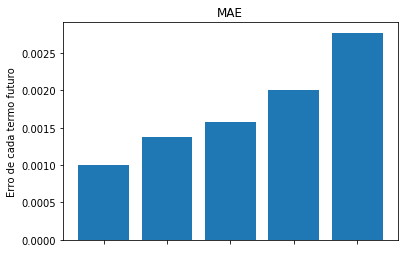

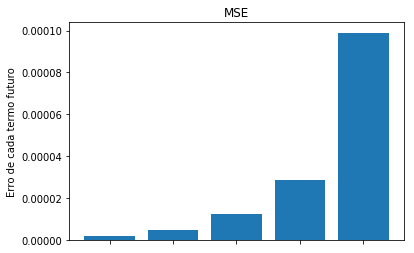

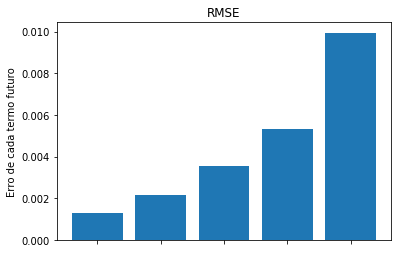

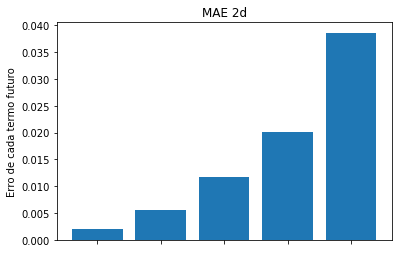

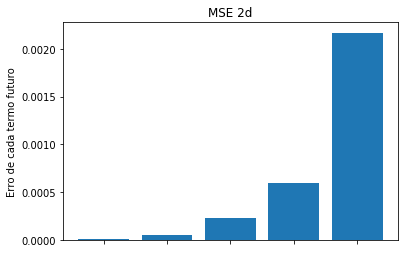

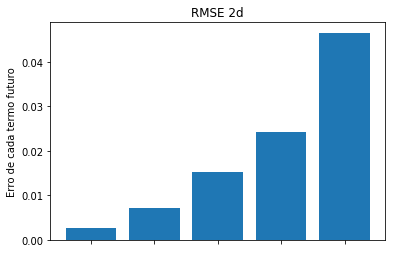

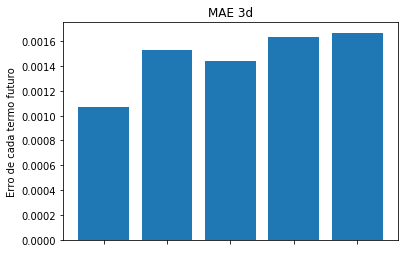

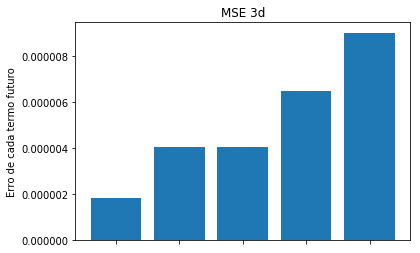

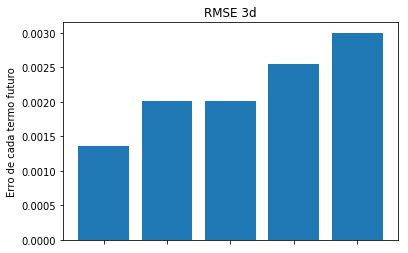

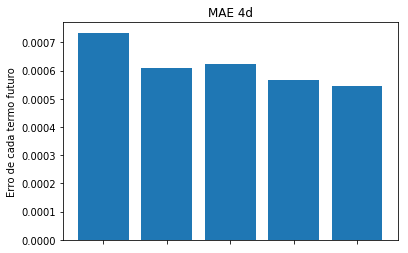

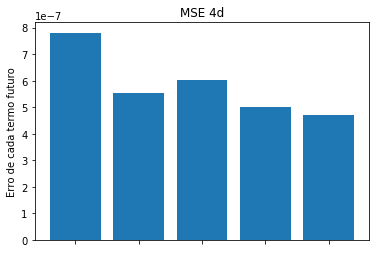

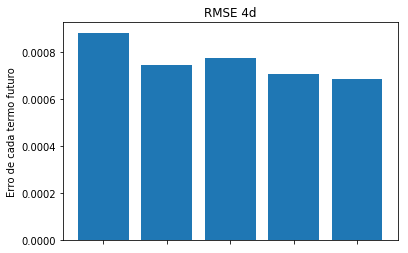

In [44]:

label = []

#plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [45]:
for i in range(FUTUREerror.shape[0]):
    #print(FUTUREerror[i],menor[i,3])
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/5)

[12. 31. 19. 30. 32. 20. 18. 22. 40. 93.] [ 153.  544.  302.  623.  538.  373.  308.  347.  653. 1147.] [ 85. 314. 190. 344. 272. 159. 221. 176. 340. 648.]
[0.03103662 0.11049038 0.06343886 0.12377405 0.10453135 0.06852886
 0.06790813 0.06765984 0.12824333 0.23438858] [0.03785489 0.0977918  0.05993691 0.09463722 0.10094637 0.06309148
 0.05678233 0.06940063 0.12618297 0.29337539] [0.03067362 0.10906175 0.06054531 0.12489976 0.10785886 0.07477947
 0.0617482  0.06956696 0.13091419 0.22995188] [0.03092033 0.11422335 0.06911604 0.12513641 0.09894507 0.05783921
 0.08039287 0.06402328 0.12368134 0.23572208]
oi [1.21968454 0.88507071 0.94479804 0.76459663 0.96570431 0.9206556
 0.83616399 1.02572859 0.98393396 1.2516625 ] [0.98830393 0.98707009 0.95438838 1.00909485 1.03183269 1.0912113
 0.90929016 1.02818691 1.02082656 0.9810712 ] [0.99625318 1.03378552 1.08949065 1.01100683 0.94655884 0.84401245
 1.18384748 0.94625235 0.96442709 1.00568928]


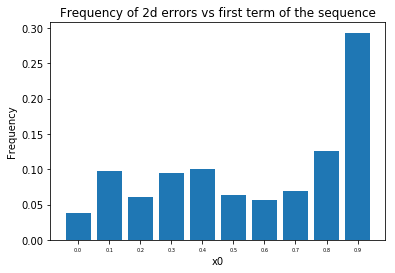

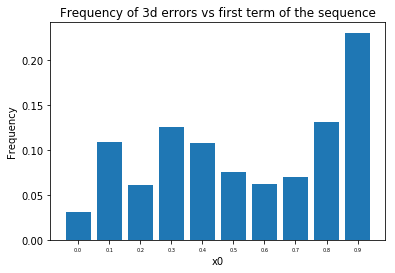

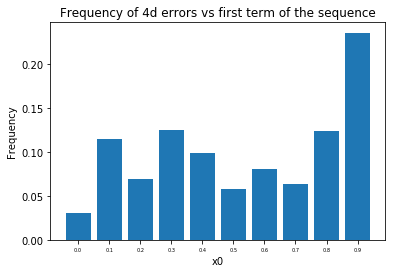

oi [1.21968454 0.88507071 0.94479804 0.76459663 0.96570431 0.9206556
 0.83616399 1.02572859 0.98393396 1.2516625 ] [0.98830393 0.98707009 0.95438838 1.00909485 1.03183269 1.0912113
 0.90929016 1.02818691 1.02082656 0.9810712 ] [0.99625318 1.03378552 1.08949065 1.01100683 0.94655884 0.84401245
 1.18384748 0.94625235 0.96442709 1.00568928]


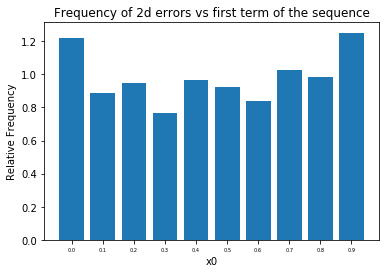

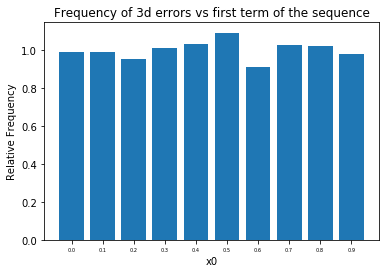

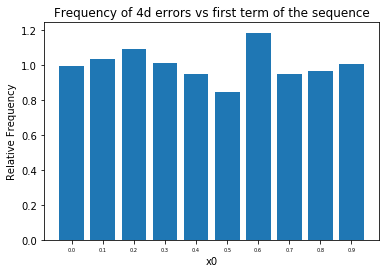

In [46]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  6.  2.  5.  4.  2.  3.  1.  5.
  3.  0.  2.  2.  2.  1.  2.  2.  1.  0.  3.  4.  0.  1.  1.  3.  6.  4.
  6.  0.  4.  5.  2.  3.  4.  3.  4.  4.  1.  5.  3.  3.  3.  1.  3.  2.
  2.  2.  1.  1.  2.  3.  2.  0.  0.  6.  3.  1.  2.  2.  1.  1.  0.  4.
  2.  1.  3.  1.  4.  4.  1.  2.  1.  1.  3.  5.  2.  1.  6.  6.  8.  7.
  3. 11. 10.  6.  6. 13. 19. 25.  0.  0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0. 153. 102.  69.  52.  41.
  69.  57.  44.  35.  32.  43.  40.  37.  28.  25.  39.  28.  29.  28.
  22.  26.  24.  22.  42. 114.  96.  80.  71.  65.  55.  54.  74.  44.
  58.  79.  63.  35.  36.  63.  44.  42.  47.  37.  35.  42.  39.  39.
  32.  34.  27.  41.  34.  32.  36.  32.  30.  28.  27.  31.  27.  31.
  30.  25.  35.  30.  37.  42.  37.  33.  39.  39.  42.  35.  39.  36.
  49.  48.  76. 137.  96.  95. 106. 102.  89. 103. 154. 156. 167. 270.
   0.   0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.  85.  59.  36.  21.  32.
  41.  34.  3

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


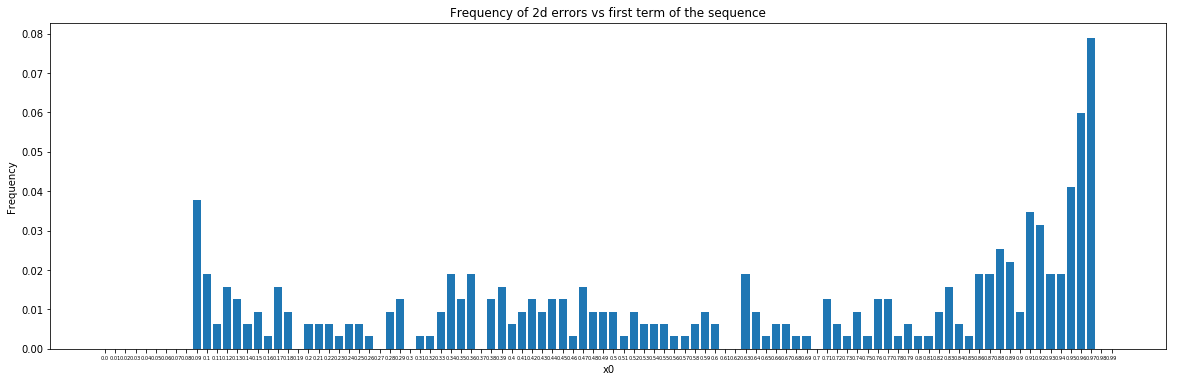

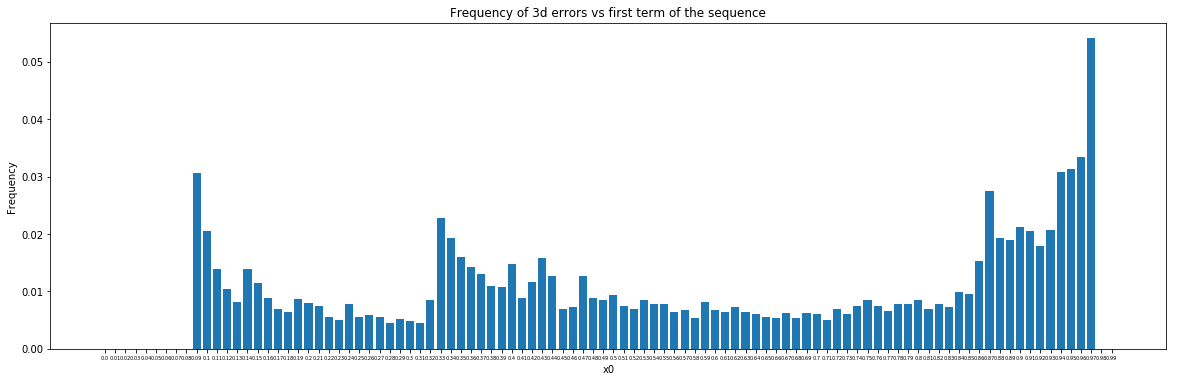

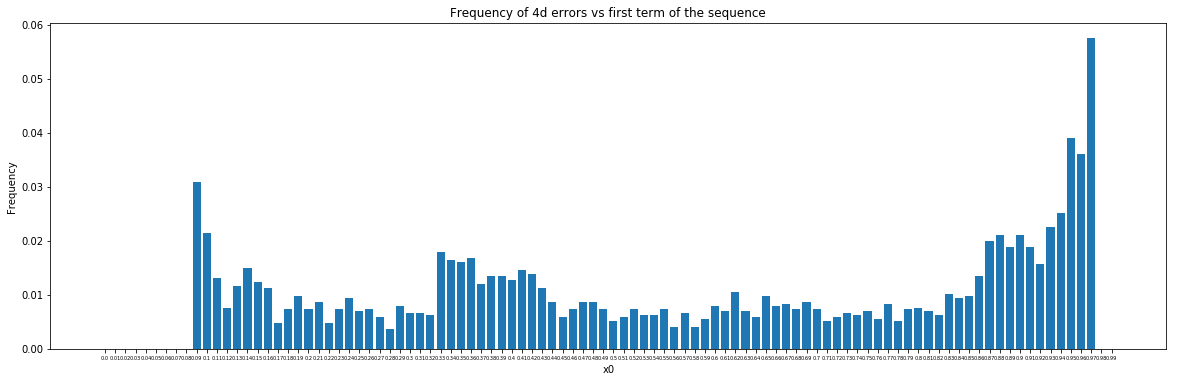

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


oi [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 1.21968454 0.91293753 0.47495504
 1.62885222 1.30308178 0.45375169 0.81096047 0.33434335 2.39717874
 1.38600516 0.         0.81968047 0.80666967 1.18186487 0.55239336
 0.75851029 1.03714672 0.50820189 0.         2.17800811 1.95462266
 0.         0.61975841 0.42350158 0.45921858 1.03714672 0.79406546
 1.23951681 0.         1.05875394 1.32344243 0.45783954 0.87621016
 1.01640379 0.67460428 1.11692724 1.84800688 0.44579113 1.3809834
 1.07366597 1.1727736  1.19109819 0.47055731 1.31431524 0.83311786
 0.87621016 0.83311786 0.57750215 0.47943575 1.27050473 1.29203871
 0.87621016 0.         0.         2.6747468  1.55572008 0.45375169
 0.9964743  0.90750338 0.52937697 0.45375169 0.         2.36372973
 0.9588715  0.51857336 1.3373734  0.40984024 1.81500676 1.69400631
 0.47055731 0.83311786 0.39703273 0.46200172 1.29203871 1.84131121
 0.66000246 0.33434335 1.28118124 0.77000287 1.25481949 1.15

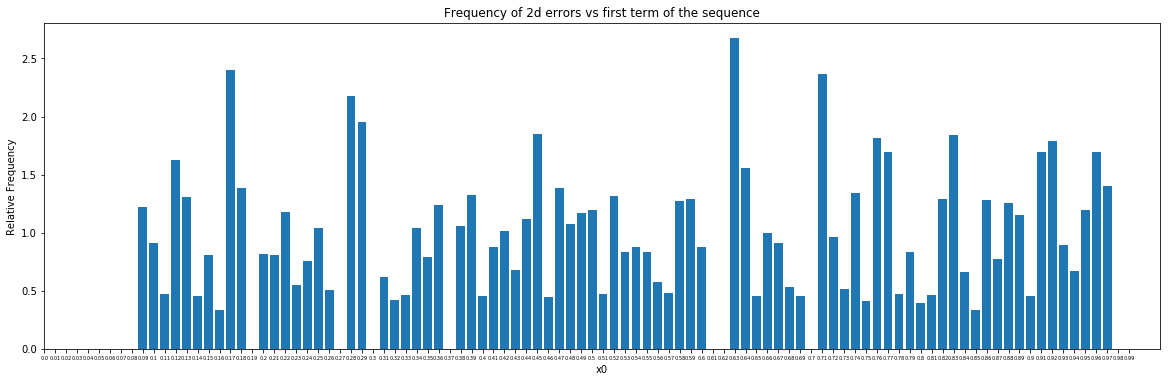

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


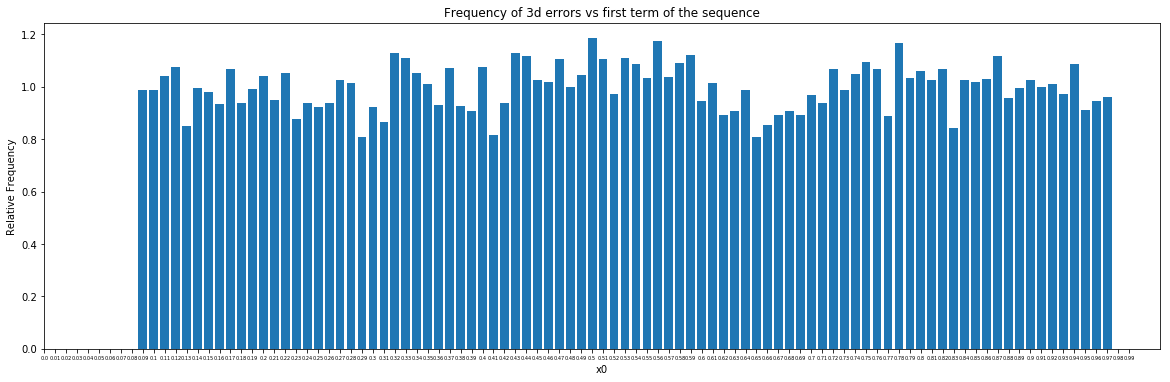

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


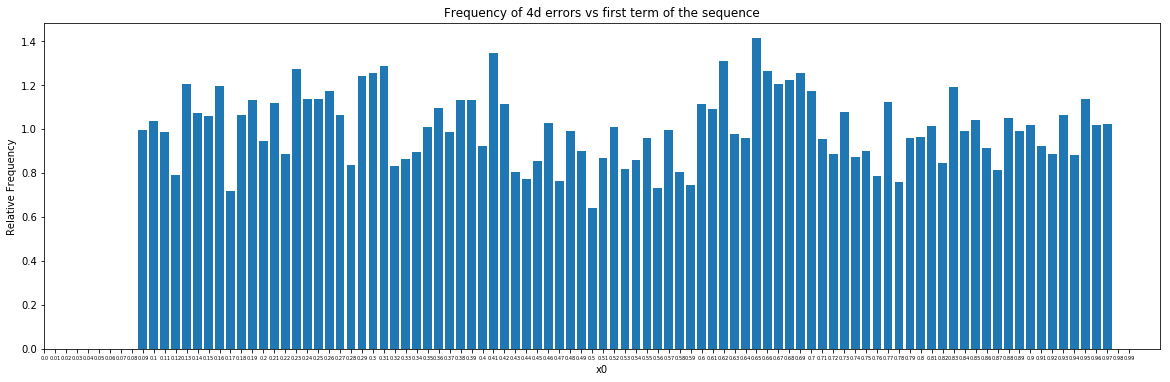

In [47]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  3.  1.  3.  4.  1.  0.  2.  0.  2.  0.  1.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  2.  0.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.
  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


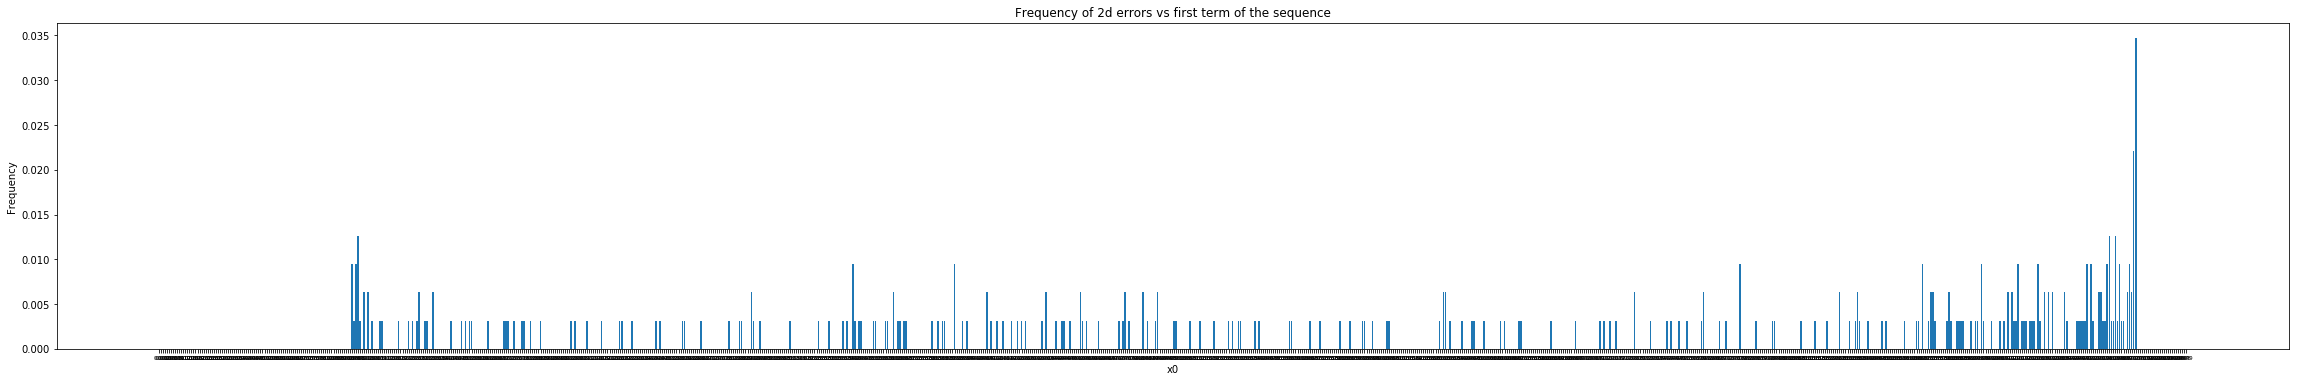

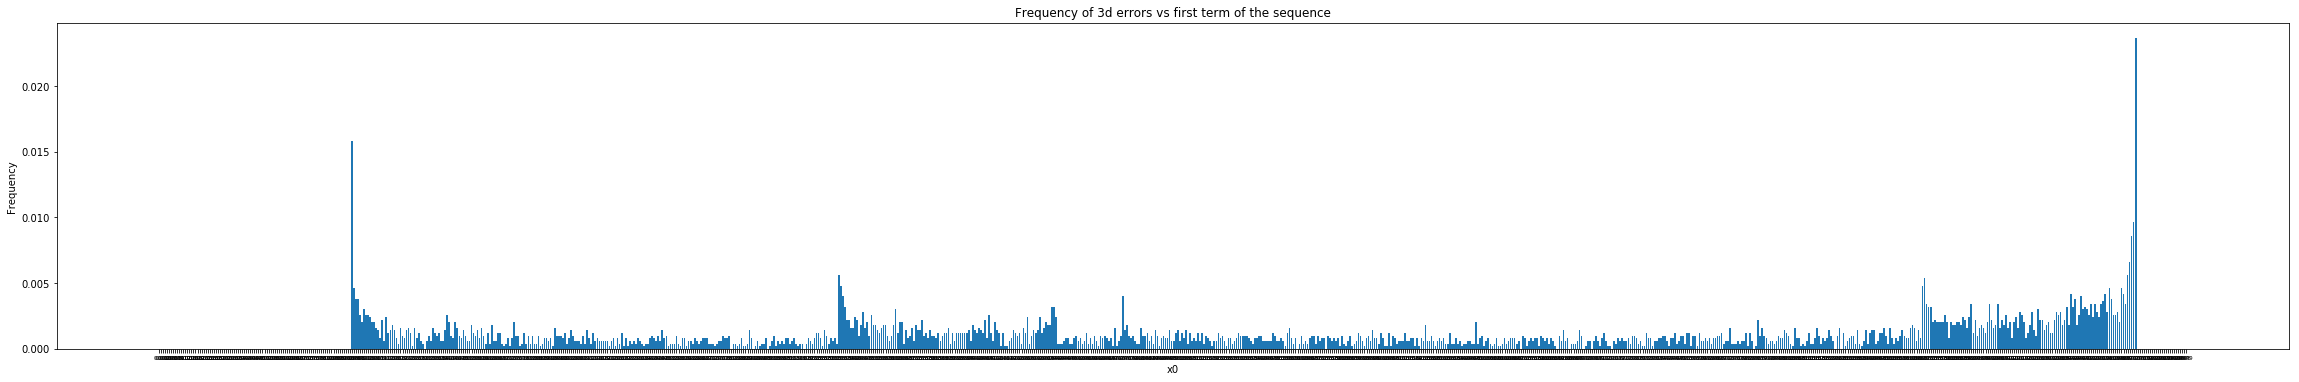

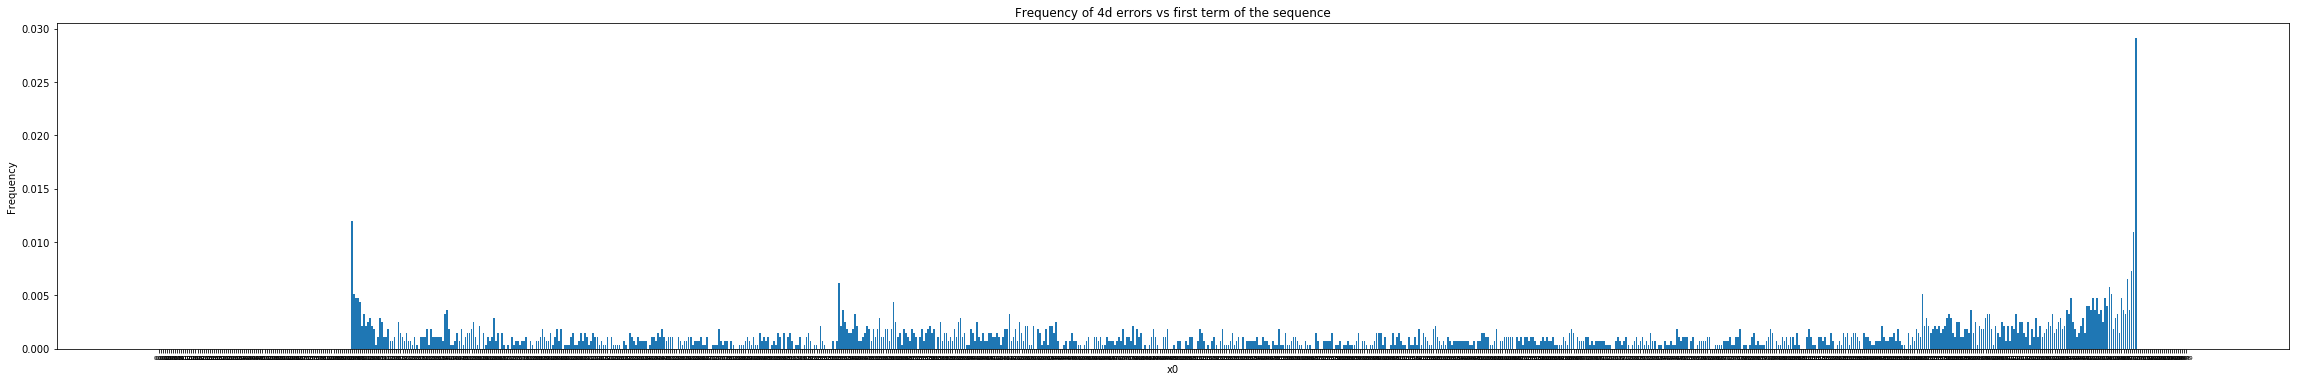

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


oi [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan

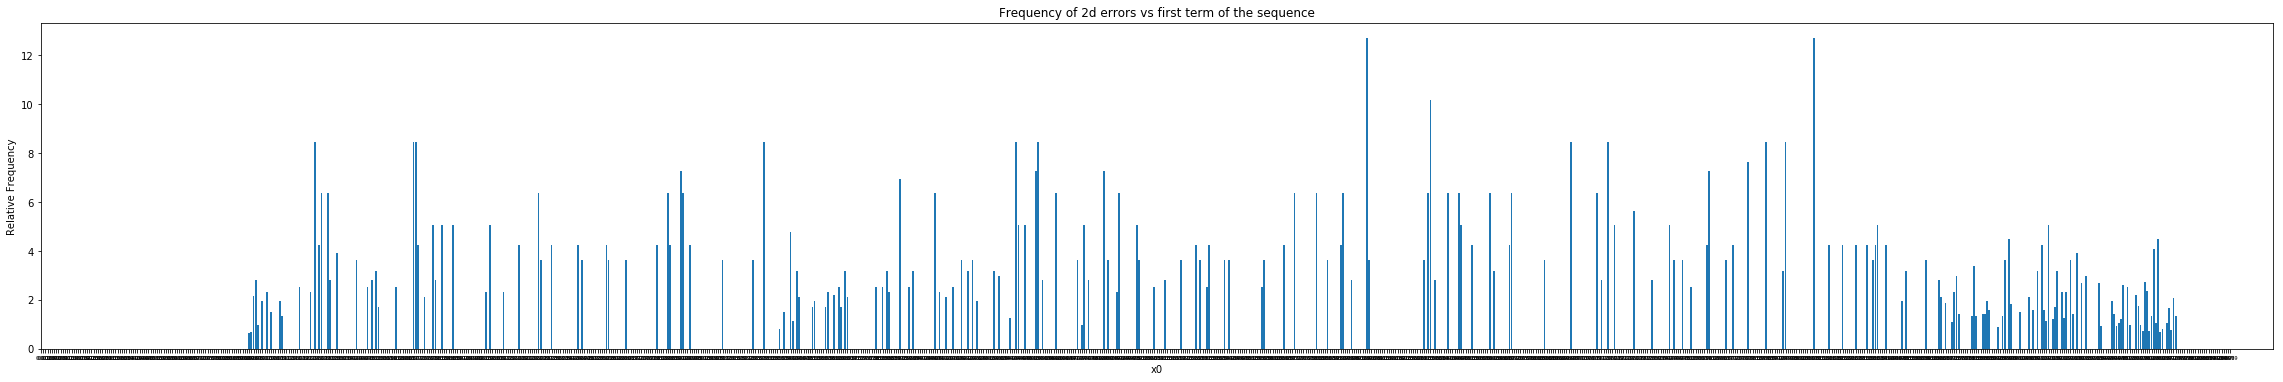

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


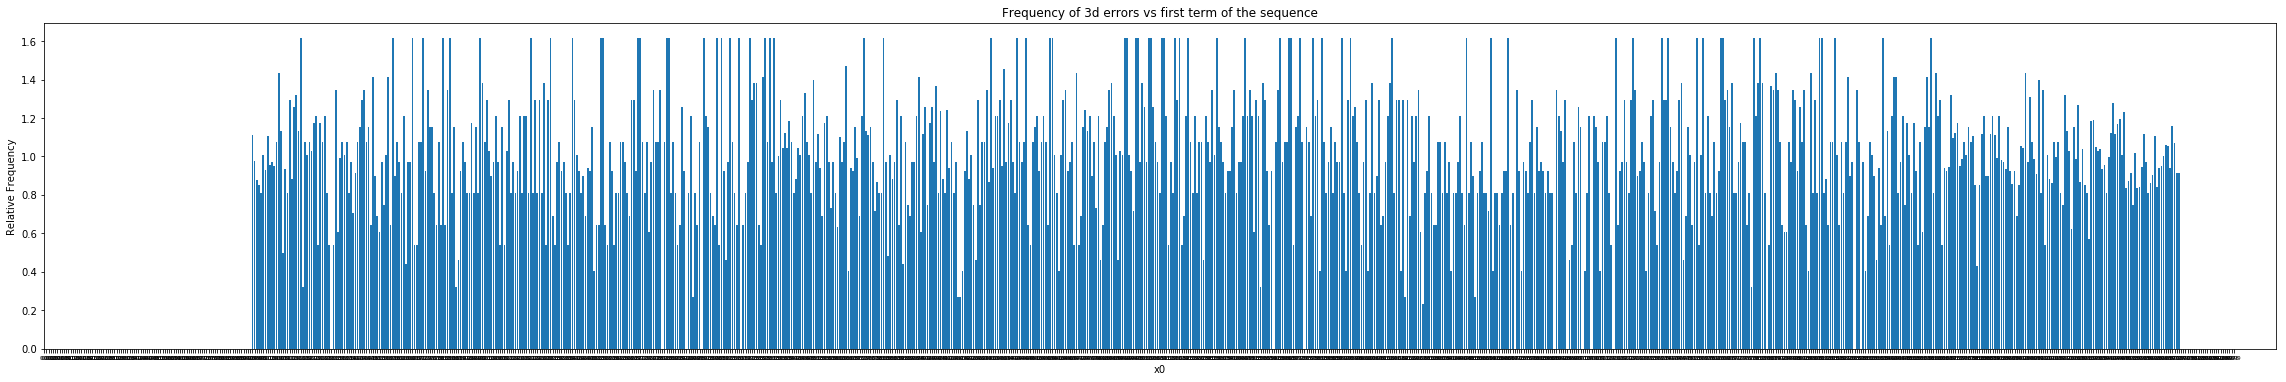

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


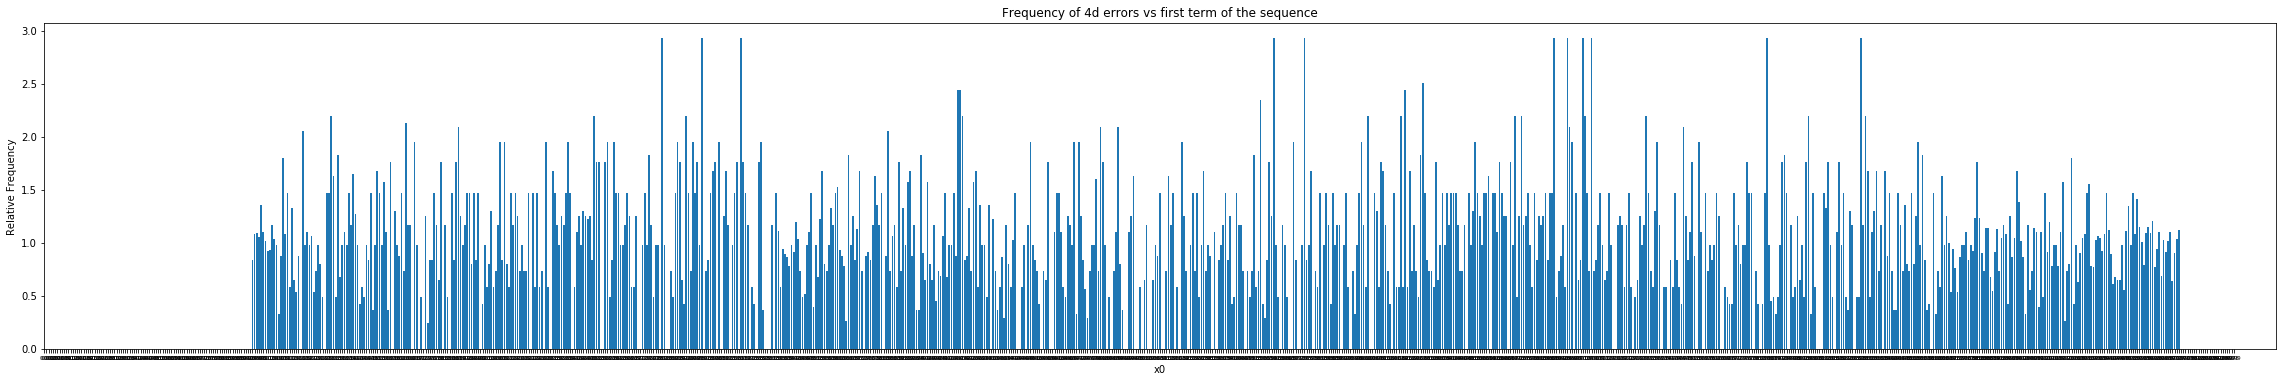

In [48]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

mae [0.0009978864323451544, 0.0013766308908973058, 0.0015746647692436958, 0.0020064325910239757] 
 mse [1.6753383148541228e-06, 4.705576728094704e-06, 1.2421210116340048e-05, 2.851709582055362e-05] 
 rmse [0.0012943486063862867, 0.002169234133996306, 0.003524373719732351, 0.005340140056267591] 

mae [0.0020841980503415298, 0.0055819879023552834, 0.011762266466540926, 0.020015815383130433] 
 mse [6.729352106383283e-06, 4.99693868126773e-05, 0.00023305940265886193, 0.0005903539206285702] 
 rmse [0.0025940994788911397, 0.007068902801190387, 0.015266283197257344, 0.02429719985159957] 

mae [0.0010731589634658599, 0.0015287494760320172, 0.0014386551901926622, 0.0016368148011009073] 
 mse [1.840726341787995e-06, 4.0324245175134074e-06, 4.0546444816824985e-06, 6.479787591837385e-06] 
 rmse [0.0013567337033434362, 0.002008089768290603, 0.0020136147798629454, 0.0025455426910262935] 

mae [0.0010731589634658599, 0.0015287494760320172, 0.0014386551901926622, 0.0016368148011009073] 
 mse [1.840726

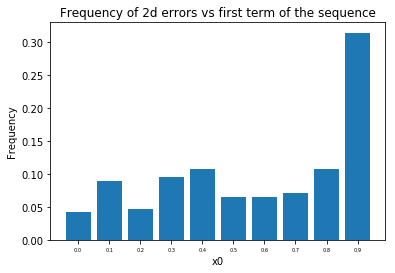

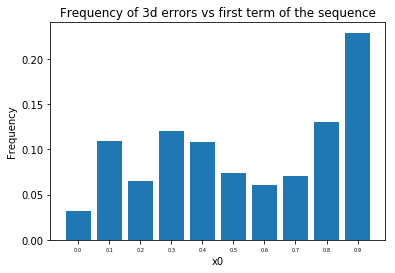

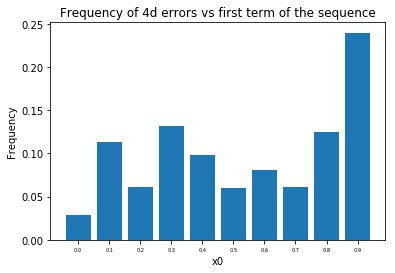

oi [1.33455621 0.8033043  0.74618743 0.76489825 1.01891805 0.94980062
 0.95848252 1.04945443 0.83052178 1.33798954] [1.02224866 0.992457   1.02524939 0.9740584  1.03196124 1.07352314
 0.89937325 1.04921164 1.01897064 0.97629349] [0.9406472  1.02507242 0.97029956 1.05999144 0.94218161 0.87256649
 1.18096277 0.90976711 0.97642381 1.02195979]


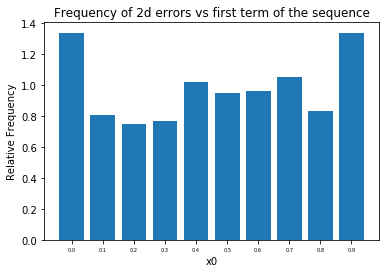

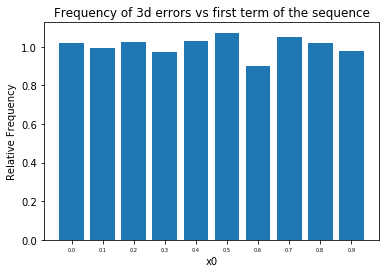

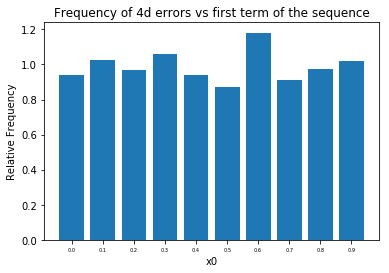

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  2.  1.  1.  2.  1.  3.  0.  3.
  2.  0.  1.  1.  0.  1.  1.  1.  0.  0.  2.  1.  0.  1.  1.  1.  1.  2.
  6.  0.  2.  2.  1.  2.  3.  3.  1.  1.  1.  2.  2.  2.  2.  0.  1.  1.
  1.  1.  0.  1.  2.  2.  1.  0.  0.  3.  2.  2.  0.  2.  1.  0.  0.  3.
  0.  1.  1.  1.  1.  2.  1.  2.  0.  1.  2.  2.  0.  1.  3.  4.  3.  2.
  3.  7.  6.  3.  3.  9.  8. 14.  0.  0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0. 160. 108.  65.  57.  47.
  68.  53.  46.  36.  29.  44.  43.  41.  28.  24.  43.  30.  32.  29.
  24.  34.  24.  24.  41. 104.  97.  73.  64.  65.  54.  62.  77.  50.
  58.  76.  63.  39.  31.  62.  43.  45.  49.  37.  35.  41.  37.  41.
  34.  32.  25.  40.  36.  31.  36.  32.  27.  26.  26.  32.  28.  34.
  29.  28.  39.  26.  38.  45.  38.  36.  37.  42.  44.  34.  40.  41.
  52.  50.  71. 129. 101.  97. 101. 104.  94. 101. 147. 157. 176. 274.
   0.   0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.  83.  57.  41.  20.  29.
  43.  38.  3

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in true_divide


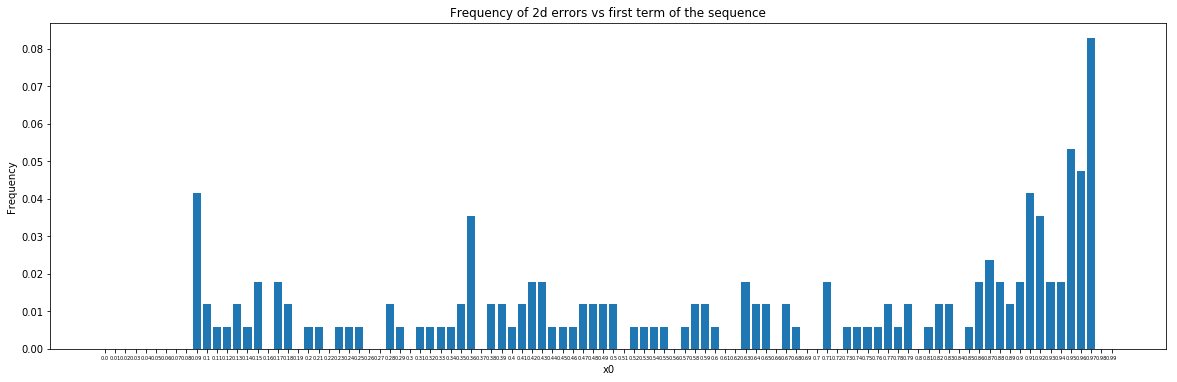

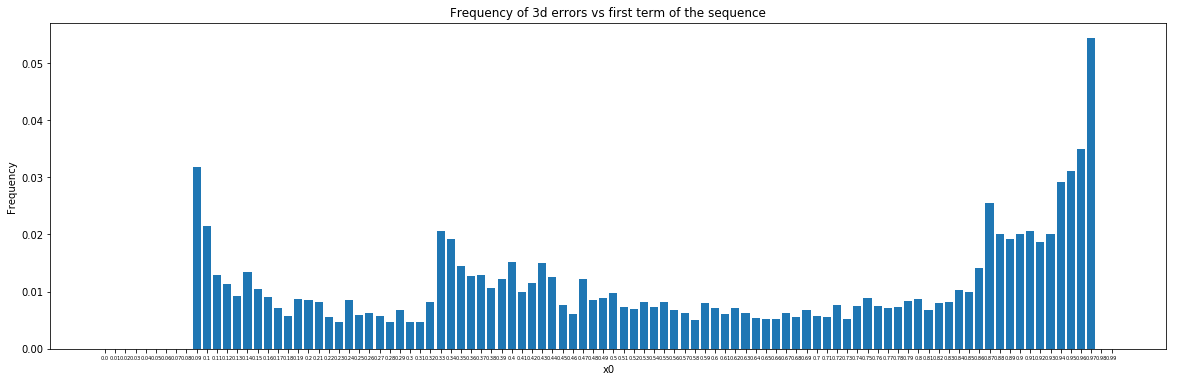

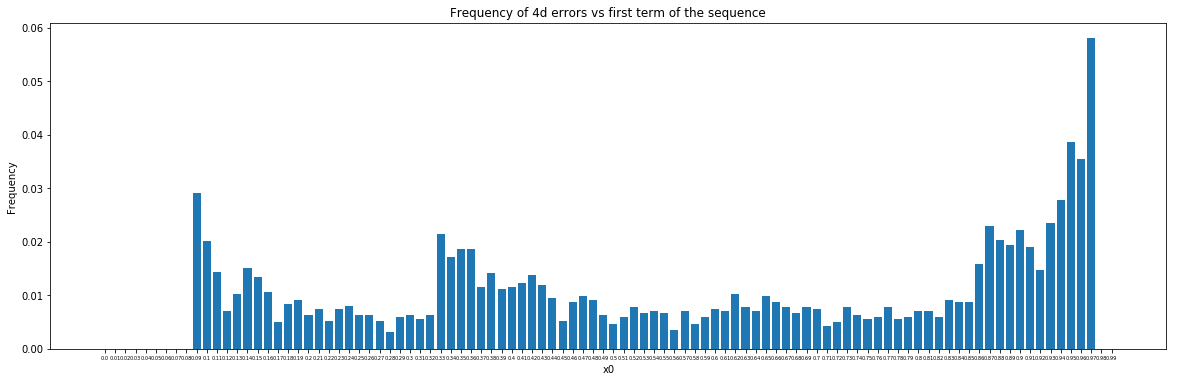

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:170: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


oi [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 1.33455621 0.57081104 0.445446
 0.61106054 1.22212107 0.42556002 1.5211507  0.         2.69788992
 1.73318989 0.         0.76875358 0.75655114 0.         1.03614613
 0.71138391 0.97270861 0.         0.         2.72358411 0.91659081
 0.         1.16250541 0.7943787  0.28712483 0.3242362  0.74473003
 2.32501082 0.         0.99297337 0.99297337 0.42939389 1.09569476
 1.42988166 1.265382   0.52376617 0.86659494 0.8361881  1.03614613
 1.34261188 1.46654529 1.48946006 0.         0.82177107 0.7813561
 0.82177107 0.7813561  0.         0.89929664 2.38313609 1.61568549
 0.82177107 0.         0.         2.50856431 1.94541722 1.70224007
 0.         1.70224007 0.99297337 0.         0.         3.32530618
 0.         0.97270861 0.8361881  0.76875358 0.85112003 1.5887574
 0.882643   1.56271219 0.         0.86659494 1.61568549 1.38152817
 0.         0.62714108 1.20158122 0.96288327 0.882643   0.61899

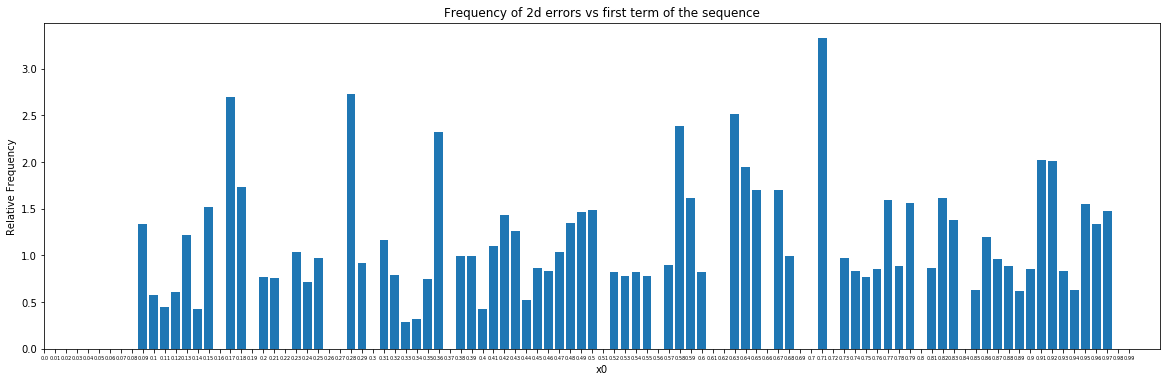

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide


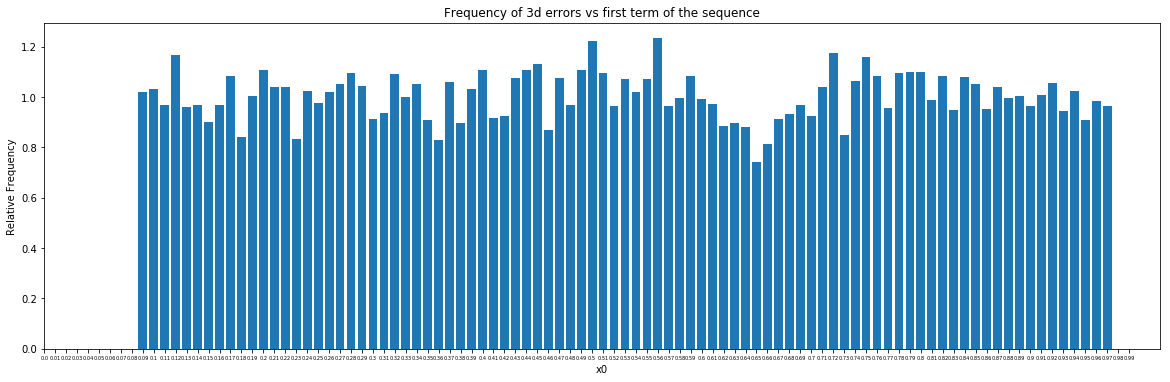

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:188: RuntimeWarning: invalid value encountered in true_divide


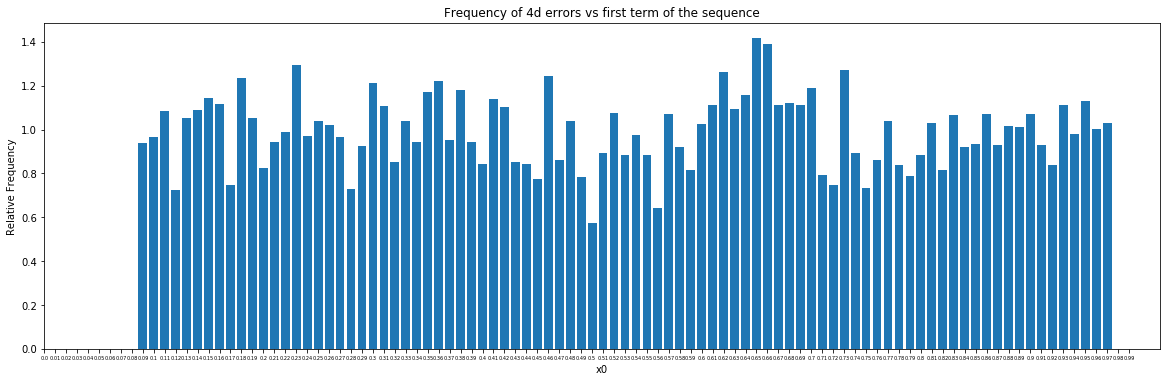

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 2. 2. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in true_divide


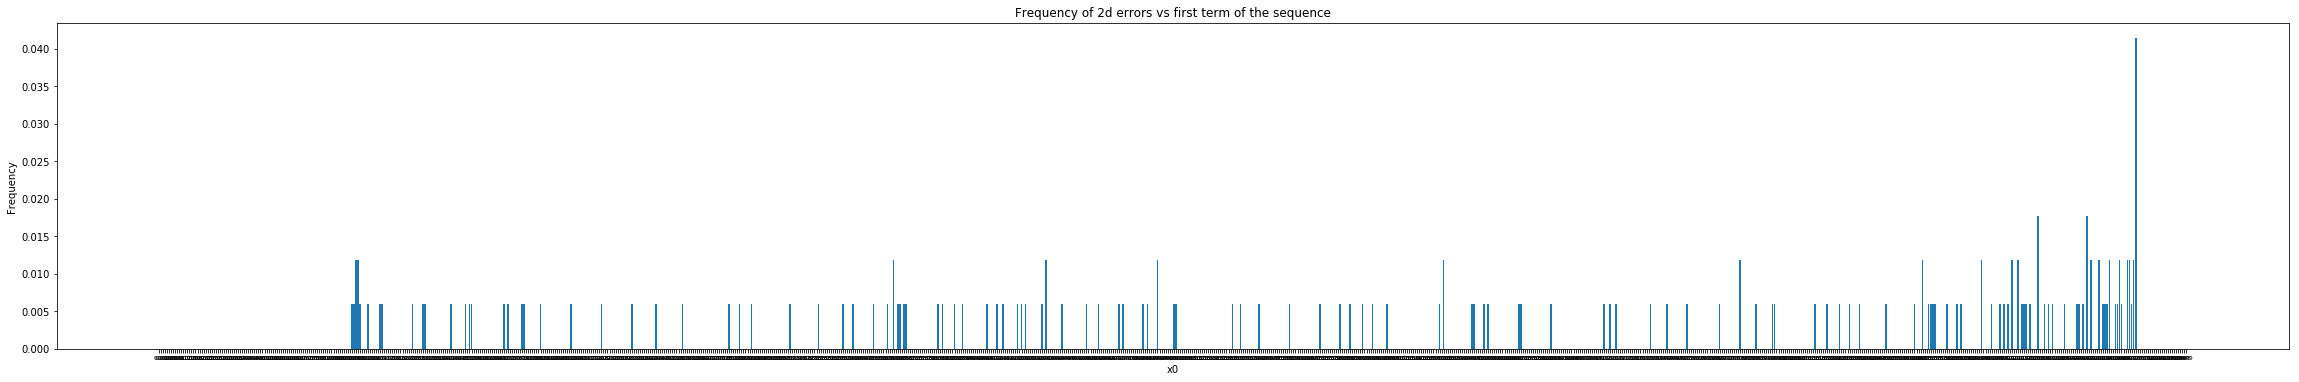

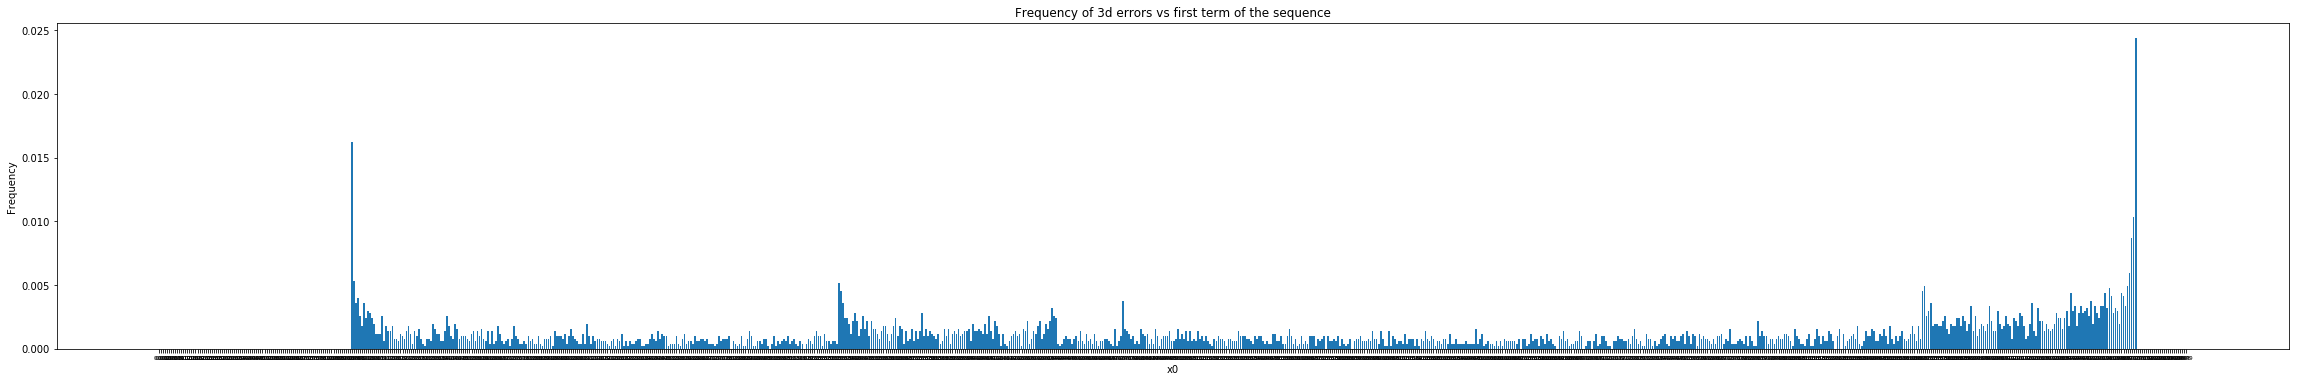

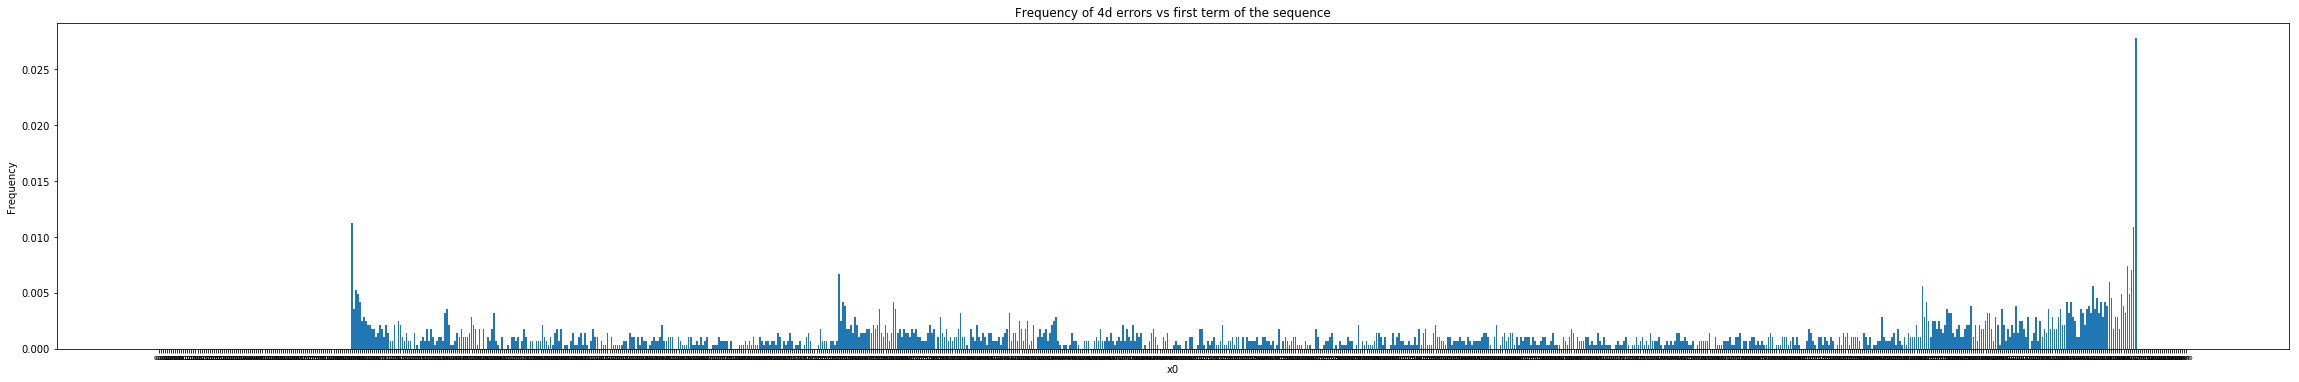

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:258: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:260: RuntimeWarning: invalid value encountered in true_divide


oi [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan

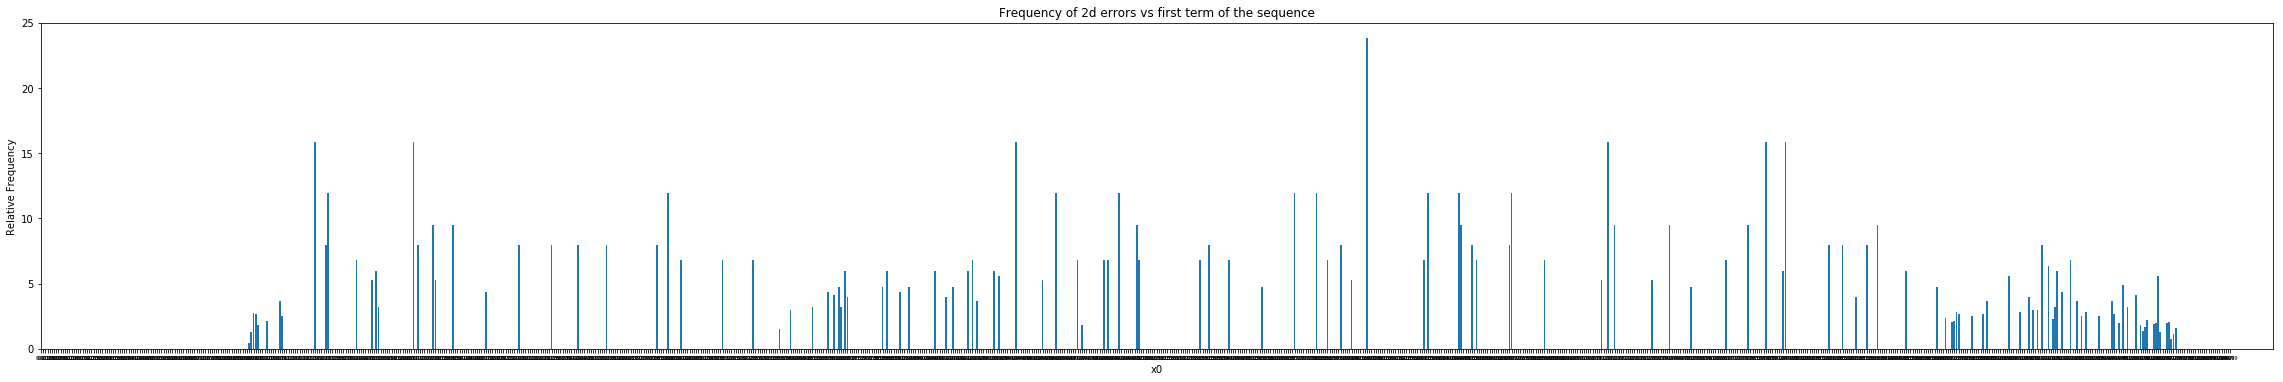

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:268: RuntimeWarning: invalid value encountered in true_divide


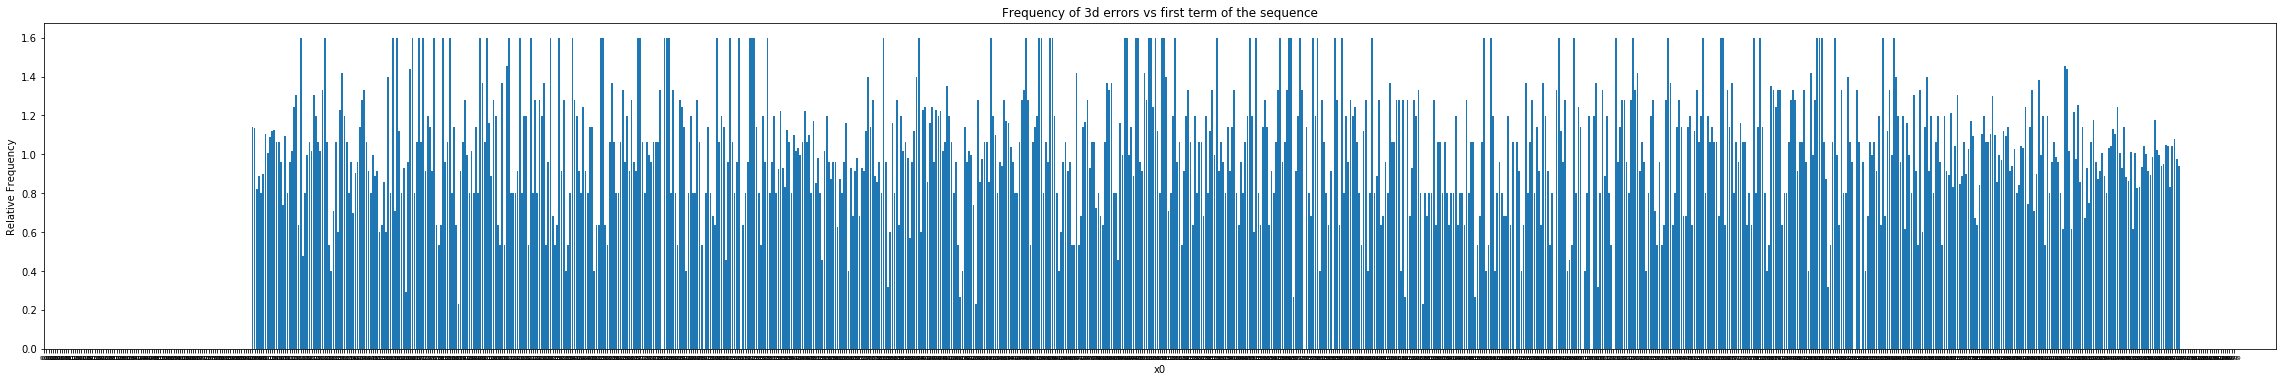

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:276: RuntimeWarning: invalid value encountered in true_divide


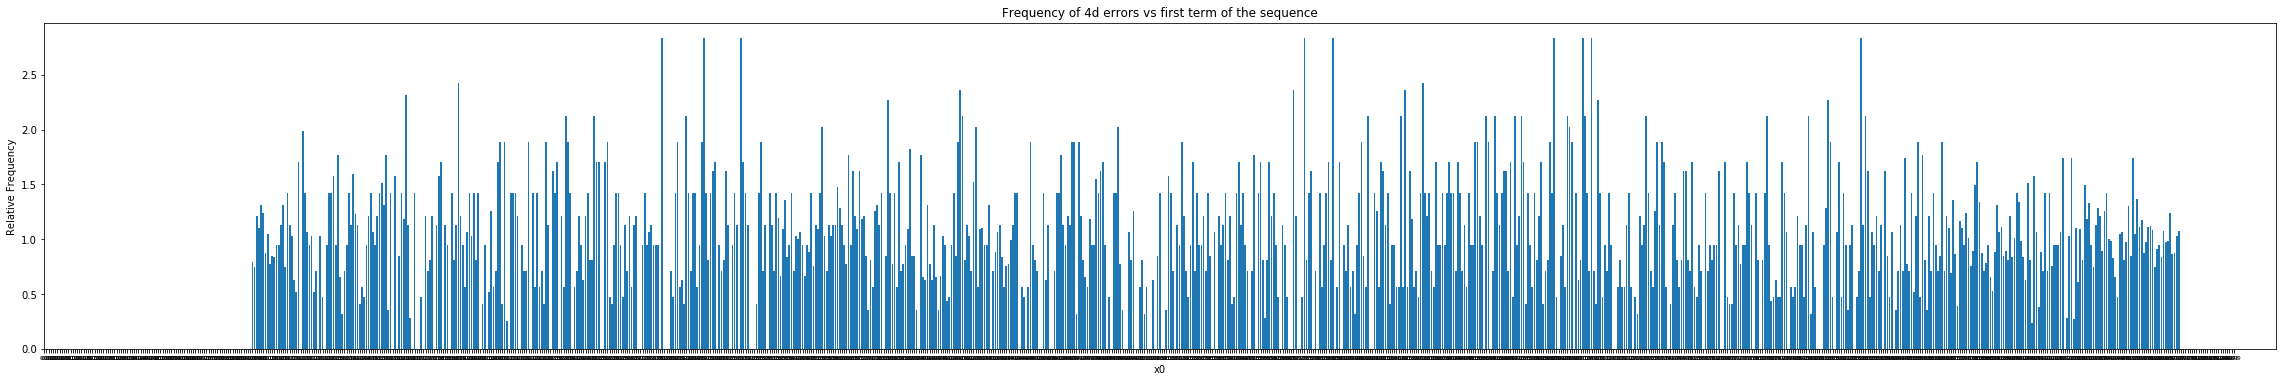

In [49]:
FUTUREerror = FUTUREerror[:,0:4]
FUTUREerror2d = FUTUREerror2d[:,0:4]
FUTUREerror3d = FUTUREerror3d[:,0:4]
FUTUREerror4d = FUTUREerror4d[:,0:4]
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/4)
    
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()